<h2 style="color:#0B5394;">Machine Learning Project - Group 8 </h2>

### Project done by:
    
- Giancarlo Pugliese, nº 20250533
- Leonor Laborinho, nº 20250469
- Rita Rodrigues, nº 20250528
- Vasco Líbano Monteiro, nº 20250478

### Group Member Countribution:

All group members contributed equally to the project, with an estimated **25% contribution** from each member. The work was carried out collaboratively, with shared decision-making and cross-review across all stages (data preparation, modelling, evaluation, and reporting).

That said, each member assumed primary responsibility for specific components:

* **Vasco Líbano Monteiro** led the **exploratory data analysis and data cleaning**, and took a leading role in the **open-ended section**.
* **Giancarlo Pugliese** led **feature selection and hyperparameter tuning**, supporting the systematic optimisation and comparison of candidate models.
* **Rita Rodrigues** led the **pre-processing and feature engineering** pipeline, ensuring consistent transformations across train/validation/test and preventing leakage.
* **Leonor Laborinho** led the **modelling and evaluation** stage, including training, benchmarking, and supporting the assessment of ensemble approaches.

Overall, the project was developed in a collaborative manner, with frequent overlap (joint debugging, validation of results, and shared interpretation of outputs), and all members contributed to the final conclusions and the writing of the notebook/report. Throughout the project, no section was developed by a single member alone all group members contributed, reviewed, and provided input across every stage of the workflow.


### Abstract:

This project develops a data-driven model for predicting the market price of used cars based on their technical and usage characteristics. Used-car pricing is a challenging task due to strong heterogeneity across brands and models, non-linear depreciation patterns, and a highly right-skewed price distribution (a small number of very expensive vehicles). In order to handle these challenges, we trained most models for a log-transformed target, ( $\log(1+\text{price})$ ), which reduces the impact of extremes and stabilises error variance. The predictions were then converted to the original scale using ( $\exp(\hat{y})-1 $).

We followed a structured pipeline covering data cleaning, exploratory analysis, feature engineering, and feature selection; we made sure all preprocessing decisions were fitted on the training data only, then applied unchanged to validation and test data to avoid leakage. Model evaluation used a fixed hold-out strategy: the same training and validation split was kept constant throughout the project, allowing for fair comparisons across algorithms. We benchmarked multiple regression families-linear regularised models, instance-based methods, tree-based ensembles-then performed hyperparameter optimisation via RandomizedSearchCV using a predefined split, optimising MAE.

Overall, the strongest nonlinear models substantially gained at the tuning stage. The final solution combined the best performing learners while paying respect to the hold-out validation protocol. The model arising thereof obtained strong generalization on unseen data. That is, careful preprocessing, appropriate target transformation, and tuned ensemble methods can return accurate and robust used-car price predictions.

### Identifying Business Needs

This is a project with the aim of developing a prediction model that is capable of predicting the current or market value of used vehicles given certain vehicle attributes such as information related to the vehicle brand, age, mileage, engine type, fuel type, among other factors. It should be noted that, in real-world applications, it is mostly unpredictable to determine the value of used vehicles since it is dependent on various factors that influence its depreciation rates. A predictive modelling approach can help make used-car pricing more consistent and predictable.


In machine learning terms, it is important that we not only seek low error rates for prediction tasks, but also that the models generalize well to novel vehicles, as well as that the methodology is sound.

### Overall Process and Model Assessment Approach

It was a full end-to-end modelling task. We initially engaged in data cleaning and data analysis for understanding distributions, identifying inconsistencies, and then formed a preprocessing plan for the data. We then proceeded with the application of feature engineering techniques for improving understanding of the market structure (features related to depreciation, age, and models) in the data, followed by feature selection.

To benchmark the prediction power of the models, a fixed hold-out validation approach was used. A split between the training data and the validation data was done only once, and this same data split was retained for the entire modelling process. All preprocessing steps were done on the training data alone, allowing the models to be fair in their performance benchmarking.

Parameters were tuned using RandomizedSearchCV with a fixed split, such that each possible set of parameters was fit to the same training data. Mean Absolute Error (MAE) was optimized with respect to training, as it is easier to understand directly in euros and is more robust to the occasional outlier prediction error relative to RMSE. This methodology allows for fair comparison between models to choose one with good levels of both fit and robustness.

<div class="alert alert-block alert-info">

## Table of Contents

### [1 - Data Cleaning & Exploratory Analysis](#1-data-cleaning--exploratory-analysis)
* [1.1 Import the Needed Libraries](#11-import-the-needed-libraries)  
* [1.2 Import the Datasets](#12-import-the-datasets)  
* [1.3 Exploratory Data Analysis](#13-exploratory-data-analysis)  
  * [1.3.1 Exploring the Data](#131-exploring-the-data)  
  * [1.3.2 Setting 'carID' as the Index](#132-setting-carid-as-the-index)  
  * [1.3.3 Checking for Missing Values](#133-checking-for-missing-values)  
  * [1.3.4 Checking and Treating Duplicated Values](#134-checking-and-treating-duplicated-values)  
  * [1.3.5 Visual Exploration](#135-visual-exploration)  
    * [1.3.5.1 Numerical Variables](#1351-numerical-variables)  
    * [1.3.5.2 Categorical Variables](#1352-categorical-variables)  

* [1.4 Initial Data Preparation](#14-initial-data-preparation)  
  * [1.4.1 Removing Irrelevant Variables](#141-removing-irrelevant-variables)  
  * [1.4.2 Correcting Categorical Variables](#142-correcting-categorical-variables)  
  * [1.4.3 Correcting Numerical Variables](#143-correcting-numerical-variables)  
    * [1.4.3.1 Correcting Value Limits](#1431-correcting-value-limits)  
    * [1.4.3.2 Correcting Negative Values](#1432-correcting-negative-values)  
    * [1.4.3.3 Converting Floats into Integers](#1433-converting-floats-into-integers)  
  * [1.4.5 Applying to the Test Dataset](#145-applying-test-dataset)  

* [1.5 Visual Exploration After Data Clean-up](#15-visual-exploration-after-data-clean-up)  
  * [1.5.1 Numerical Variables](#151-numerical-variables)  
  * [1.5.2 Categorical Variables](#152-categorical-variables)  
  * [1.5.3 Multivariate Analysis](#153-multivariate-analysis)  
  * [1.5.4 Additional Multivariate Price Analysis](#154-additional-multivariate-price-analysis)  

---

### [2 - Train / Validation Split](#2-train--validation-split)

---

### [3 - Pre-processing and Feature Engineering](#3-pre-processing-and-feature-engineering)
* [3.1 Treating Missing Values](#31-treating-missing-values)  
  * [3.1.1 Applying to the Test Dataset](#311-applying-test-dataset)  

* [3.2 Treating Outliers](#32-treating-outliers)  
  * [3.2.1 Applying to the Test Dataset](#321-applying-test-dataset)  

* [3.3 Feature Engineering](#33-feature-engineering)  
  * [3.3.1 Creating Variable "car_age"](#331-creating-variable-car_age)  
  * [3.3.2 Creating Variable "brand_model_avg_price"](#332-creating-variable-brand_model_avg_price)  
  * [3.3.3 Creating Variable "brand_model_depreciation"](#333-creating-variable-brand_model_depreciation)  
  * [3.3.4 Treating Outliers in the New Variables](#335-treating-missing-values-and-outliers-in-the-new-variables)  
    * [3.3.4.1 Applying to the Test Dataset](#3351-applying-test-dataset)  

* [3.4 Visual Exploration After Feature Engineering](#34-visual-exploration-after-feature-engineering)  

* [3.5 Scaling the Variables](#35-scaling-the-variables)  
  * [3.5.1 Applying to the Test Dataset](#351-applying-test-dataset)  

* [3.6 Encoding Categorical Variables](#36-encoding-categorical-variables)  
  * [3.6.1 Applying to the Test Dataset](#361-applying-test-dataset)  

---

### [4 - Feature Selection](#4-feature-selection)
* [4.1 Filter Methods](#41-filter-methods)  
  * [4.1.1 Removing Constant Variables](#411-removing-constant-variables)  
  * [4.1.2 Correlation Analysis](#412-correlation-analysis)  
  * [4.1.3 Chi-Square Test for Categorical Variables](#413-chi-square-test-for-categorical-variables)  
  * [4.1.4 Visual Inspection of Categorical Variables vs Target](#414-visual-inspection-of-categorical-variables-vs-target)  

* [4.2 Wrapper Methods](#42-wrapper-methods)  
  * [4.2.1 Recursive Feature Elimination (RFE)](#421-recursive-feature-elimination-rfe)  

* [4.3 Embedded Methods](#43-embedded-methods)  
  * [4.3.1 Lasso Regression](#431-lasso-regression)  

* [4.4 Feature Selection Conclusion](#44-feature-selection-conclusion)  
* [4.5 Applying to the Test Dataset](#45-repeating-for-the-test-dataset)  

---

### [5 - Modelling and Evaluation](#5-modelling-and-evaluation)
* [5.1 Initial Modelling and Evaluation Without Tuning](#51-Initial-Modelling-and-Evaluation-Without-Tuning)  
  * [5.1.1 Linear Models and Regularization)](#511-linear-regression-ols-baseline)  

  * [5.1.2 Non-linear Models – Instance-based](#52-non-linear-models-instance-based)  
  * [5.1.3 Tree-based models](#53-tree-based-models)       
  * [5.1.4 Ensemble Tree-based Models](#54-ensemble-tree-based-models) 
  * [5.1.5 Conclusions of the first models](#515-Conclusions-of-the-first-models) 
    

* [5.2 Hyperparameter tuning](#55-hyperparameter-tuning)  
  * [5.2.1 Tuning of Linear Models](#551-Tuning-of-Linear-Models)  
  * [5.2.2 Tuning of  Non-linear Models – Instance-based](#552-Tuning-of-Non-linear-Models-Instance-based)  
  * [5.2.3 Tuning of Tree-Based Models](#553-bagged-decision-tree--tuned)  
  * [5.2.4 Conclusions of the tuned models](#524-Conclusions-of-the-tuned-model)  
    
* [5.3 Final Ensemble Model](#557-interpretation)  

---    
    
### [6 - Open-Ended Section](#6-open-ended-section)
* [6.1. Driver Identification: Feature Importance Analysis](#61-Driver-Identification-Feature-Importance-Analysis)  
* [6.2. Deployment: Analytics Interface](#62-Deployment-Analytics-Interface)  
* [6.3. What-If Analysis: Depreciation Curve](#63-What-If-Analysis-Depreciation-Curve)  
    
---    
    
### [7 - Kaggle Submission](#7-Kaggle-Submission)    
    

   

# Helper functions / Utilities

In [196]:
# Functions

def clean_up(df, column, ref_list, limiar=0.6):
    
    """  
    This function cleans and standardizes categorical columns. 
    
    The non-missing values are converted to uppercase and stripped
    of extra spaces, while true missing values are preserved as NaN. 
    The function then applies fuzzy string matching against a predefined
    reference list to correct spelling mistakes or small variations, using a
    similarity threshold defined by the parameter 'limiar'.

    """
    df = df.copy()

    # Normalize reference list once
    ref_list_norm = [str(x).upper().strip() for x in ref_list if pd.notna(x)]

    # Ensure column is object so we can safely put strings + NaN together
    s = df[column].astype("object")

    # Standardize only non-missing values 
    mask = s.notna()
    s.loc[mask] = s.loc[mask].astype(str).str.upper().str.strip()

    # Turn common "stringified missing" placeholders back into real NaN
    s = s.replace(["", "NAN", "NaN", "nan", "NONE", "None", "NULL", "Null"], np.nan)

    # Fuzzy match only non-missing values
    def nameCorrector(name):
        match = difflib.get_close_matches(name, ref_list_norm, n=1, cutoff=limiar)
        return match[0] if match else name

    mask = s.notna()
    s.loc[mask] = s.loc[mask].apply(nameCorrector)

    df[column] = s
    return df


def fill_missing_brands(cars_train, brand_models):
    """
    This function attempts to fill missing values in the 'Brand' column using
    information from the corresponding 'model' column.
    
    In this function, a reverse mapping is created from model names to their
    associated brands, based on a predefined dictionary of valid Brand–Model
    relationships. For rows where the Brand is missing, the function infers the
    brand by matching the model value to this mapping.
    
    Only cases where the model uniquely identifies a brand are filled. If the
    model is missing or ambiguous, the Brand value remains missing to avoid
    incorrect assumptions.
    """

    # Reverse of the dictionary that we had earlier (each model points to a brand)
    model_to_brand = {}
    for brand, models in brand_models.items():
        for m in models:
            model_to_brand[m.upper()] = brand

    # Replace missing Brand values using model-to-brand mapping
    mask_nan = (
        cars_train["Brand"].isin(["NAN", None, "NaN", "nan"])
        | cars_train["Brand"].isna()
    )

    cars_train.loc[mask_nan, "Brand"] = (
        cars_train.loc[mask_nan, "model"]
        .str.upper()
        .map(model_to_brand)
    )

    return cars_train


def impute_numeric(df, s):
    
    """
    This function imputes missing values in numerical variables using
    statistics learned exclusively from the training data.
    
    In this function, different imputation strategies are applied depending on
    the variable:
    - 'year', 'mpg', and 'engineSize' are imputed using Brand–Model-specific
      medians, with a fallback to global medians when needed;
    - 'mileage' is imputed based on the median mileage for the same production
      year;
    - 'tax' and 'previousOwners' are imputed using global medians.

    This design ensures that imputations are context-aware while preventing
    data leakage, as all statistics are provided externally via the dictionary
    's' and computed only from the training set.
    """
    
    df = df.copy()

    mask = df["year"].isna()
    df.loc[mask, "year"] = df.loc[mask].apply(
        lambda r: s["year_by_bm"].get((r["Brand"], r["model"]), s["year_global_median"]),
        axis=1
    ).astype(int)

    mask = df["mileage"].isna()
    df.loc[mask, "mileage"] = df.loc[mask].apply(
        lambda r: s["miles_perYear"].get(r["year"], s["mileage_global_median"]),
        axis=1
    )

    mask = df["tax"].isna()
    df.loc[mask, "tax"] = s["tax_median"]

    mask = df["mpg"].isna()
    df.loc[mask, "mpg"] = df.loc[mask].apply(
        lambda r: s["mpg_by_bm"].get((r["Brand"], r["model"]), s["mpg_global_median"]),
        axis=1
    )

    mask = df["previousOwners"].isna()
    df.loc[mask, "previousOwners"] = s["prevOwn_median"]

    mask = df["engineSize"].isna()
    df.loc[mask, "engineSize"] = df.loc[mask].apply(
        lambda r: s["engineSize_by_bm"].get((r["Brand"], r["model"]), s["engine_global_median"]),
        axis=1
    )

    return df



def semi_elasticity_by_brand_model(df, group_cols=("Brand", "model"), min_n=100, use_age=True, debug=True):
    
    """
    This function estimates price depreciation with respect to mileage using a
    log-linear regression approach.

    In this function, a semi-elasticity coefficient is computed for each
    Brand–Model group with a sufficient number of observations. The coefficient
    represents the percentage change in price for every 10,000 km driven.
    A global coefficient is also estimated and used as a fallback for groups
    with insufficient data.

    Optionally, vehicle age can be included as a control variable. This approach
    produces stable and interpretable depreciation estimates while accounting
    for heterogeneity across brands and models.
    """
    
    # Computes semi-elasticity (beta per 10k km) by model and brand
    betas_group = {}
    beta_global = 0.0
    df = df.copy()

    cols_to_check = ["mileage_10k", "log_price"]
    if use_age and ("age" in df.columns):
        cols_to_check.append("age")
    df = df.dropna(subset=cols_to_check)

    # Global beta
    if len(df) >= 5:
        Xg = df[["mileage_10k"]].copy()
        if use_age and ("age" in df.columns):
            Xg["age"] = df["age"]
        yg = df["log_price"].values
        beta_global = float(LinearRegression().fit(Xg, yg).coef_[0])

    # Group betas (Brand, model)
    for key, g in df.groupby(list(group_cols)):
        if len(g) >= min_n:
            X = g[["mileage_10k"]].copy()
            if use_age and ("age" in g.columns):
                X["age"] = g["age"]
            y = g["log_price"].values
            betas_group[key] = float(LinearRegression().fit(X, y).coef_[0])

    if debug:
        print(f"[semi_elasticity_by_brand_model] {len(betas_group)} groups, beta_global={beta_global:.6f}")

    return betas_group, beta_global



def map_beta_brand_model(row):
    
    """
    This function maps a single observation to its corresponding depreciation
    coefficient.

    The Brand–Model pair of a row is used to retrieve a precomputed
    semi-elasticity coefficient. If no group-specific coefficient
    exists, the global depreciation coefficient is returned instead.
    """
    
    # Map row to beta for its (Brand, model)
    key = (row["Brand"], row["model"])
    if key in betas_group:
        return betas_group[key]
    return beta_global


def cor_heatmap(cor):
    
    """
    This function visualizes a correlation matrix using a heatmap.

    Correlations between numerical variables are displayed
    with annotated values and a color gradient, allowing for quick inspection
    of the strength and direction of relationships between features.
    """
    
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.title("Spearman Correlation Heatmap for Numerical Features", fontsize=14)
    plt.show()

    

def chi2_test_feature(df, feature, y_binned, alpha=0.05):
    
    """
    This function performs a Chi-squared test of independence between a
    categorical feature and a binned target variable.

    In this function, a contingency table is built and used to test whether the
    distribution of the target variable differs significantly across categories.
    The result helps assess whether the categorical feature is statistically
    associated with the target and should be retained for modeling.
    """
    
    # Build contingency table: rows=categories, cols=price bins
    ct = pd.crosstab(df[feature], y_binned)

    chi2, p, dof, expected = chi2_contingency(ct.values)

    if p < alpha:
        print(f"{feature} is significantly associated with the target (p=p={p:.2e}) -> keep it")
    else:
        print(f"{feature} is NOT significantly associated with the target (p=p={p:.2e}) -> consider removing it")

    return p



def plot_price_bin_by_category(df, feature, target="price_bin", top_n=12):
    
    """
    This function visualizes the relationship between a categorical feature and
    binned target values.

    Stacked bar charts are created to show both absolute counts
    and relative proportions of price bins across categories. When a
    feature has many categories, only the most frequent ones are shown and 
    the remainder are grouped into an 'OTHER' category for clarity.
    """
    
    # Build contingency table
    ct = pd.crosstab(df[feature], df[target])

    # If too many categories (for example, Brand), keep top_n and group the rest as "OTHER"
    if ct.shape[0] > top_n:
        top_idx = ct.sum(axis=1).sort_values(ascending=False).head(top_n).index
        ct_top = ct.loc[top_idx]
        ct_other = ct.drop(index=top_idx).sum(axis=0).to_frame().T
        ct_other.index = ["OTHER"]
        ct = pd.concat([ct_top, ct_other], axis=0)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Absolute counts
    ct.plot(kind="bar", stacked=True, ax=axes[0])
    axes[0].set_title(f"Counts of price bins across {feature}")
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel("Count")
    axes[0].legend(title=target)

    # Normalized proportions
    ct_prop = ct.div(ct.sum(axis=1), axis=0)
    ct_prop.plot(kind="bar", stacked=True, ax=axes[1])
    axes[1].set_title(f"Proportions of price bins across {feature}")
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel("Proportion")
    axes[1].legend(title=target)

    plt.tight_layout()
    plt.show()

    

def all_regression_metrics(y_true, y_pred, p_features: int):
    
    """
    This function computes a comprehensive set of regression performance metrics.

    In this function, standard error-based and goodness-of-fit metrics are
    calculated, including R², adjusted R², MAE, MSE, RMSE, MedAE, and MAPE.
    The adjusted R² explicitly accounts for the number of predictors used in
    the model.
    
    It returns a dictionary with 7 regression metrics.
    p_features = number of predictors used (for Adjusted R^2).
    """

    n = len(y_true)  
    r2 = r2_score(y_true, y_pred)  
    adj_r2 = np.nan if n <= (p_features + 1) else 1 - (1 - r2) * (n - 1) / (n - p_features - 1)
    mae  = mean_absolute_error(y_true, y_pred)     
    mse  = mean_squared_error(y_true, y_pred)       
    rmse = np.sqrt(mse)                          
    medae = median_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return {
        "R2": r2, "Adj_R2": adj_r2, "MAE": mae,
        "MSE": mse, "RMSE": rmse, "MedAE": medae, "MAPE": mape
    }


def pretty_print_metrics(title, m_train, m_val):
    
    """
    This function prints regression metrics for training and validation sets
    in a compact and readable format.

    Metrics dictionaries are formatted side by side to allow
    easy comparison between training and validation performance.
    """
    
    print(f"\n{title}")
    print("-" * len(title))
    print("Train -> " + ", ".join([f"{k}: {v:.4f}" for k, v in m_train.items()]))
    print("Valid -> " + ", ".join([f"{k}: {v:.4f}" for k, v in m_val.items()]))
    

def adj_r2 (r2,n,p):
    
    """
    In this function, the adjusted R² is calculated to penalize models with a
    large number of predictors, providing a more fair measure of model fit.
    """
    
    return 1-(1-r2)*(n-1)/(n-p-1)


def add_row(model_name, split_name, m):
    
    """
    This function appends a new row of model performance metrics to a results list.

    In this function, the model name, dataset split, and corresponding metrics
    are stored in a structured format for later comparison and reporting.
    """
    
    rows.append({"Model": model_name, "Split": split_name, **m})
    
    
def make_predefined_split(X_train, X_val, y_train, y_val):
    """
    This function builds a single dataset + a PredefinedSplit object so that RandomizedSearchCV
    always respects our original train/validation split.

    What this does:
    - Stacks X_train with X_val into one DataFrame (X_combined).
    - Stacks y_train with y_val into one Series (y_combined).
    - Creates a test_fold vector with:
        * -1 for rows that belong to the training set
        *  0 for rows that belong to the validation set
      This test_fold is exactly what PredefinedSplit needs.

    Why it is important:
    - We are using a fixed hold-out split (train vs validation) and we don't want
      cross-validation to re-shuffle or re-split the data.
    - Passing this PredefinedSplit to the 'cv' argument of RandomizedSearchCV
      makes every hyperparameter configuration train on the original X_train
      and be evaluated on the original X_val.
    - This avoids data leakage, keeps the comparison between models consistent,
      and still lets us do proper hyperparameter tuning.
    """

    # Stack train and validation
    X_combined = pd.concat([X_train, X_val])
    y_combined = pd.concat([y_train, y_val])

    # -1 for train rows, 0 for validation rows
    test_fold = np.concatenate([
        -1 * np.ones(len(X_train), dtype=int),
        0  * np.ones(len(X_val), dtype=int)
    ])

    ps = PredefinedSplit(test_fold=test_fold)
    return X_combined, y_combined, ps


def tune_model_random_search(
    base_estimator,
    param_distributions,
    X_train, X_val, y_train, y_val,
    *,
    model_name="Model",
    log_target=False,
    n_iter=40,
    scoring="neg_mean_absolute_error",
    random_state=42,
    verbose=2
):
    """
    Generic helper to:
      - build X_combined / y_combined with PredefinedSplit,
      - optionally work on log-target,
      - run RandomizedSearchCV,
      - compute metrics on the original train/validation splits.
    """

    # Build combined dataset + PredefinedSplit
    X_combined, y_combined, ps = make_predefined_split(
        X_train, X_val, y_train, y_val
    )

    # Optional log-transform of the target
    if log_target:
        y_combined_tuned = np.log1p(y_combined)
    else:
        y_combined_tuned = y_combined

    # Randomized search
    search = RandomizedSearchCV(
        estimator=base_estimator,
        param_distributions=param_distributions,
        n_iter=n_iter,
        scoring=scoring,
        cv=ps,
        n_jobs=-1,
        random_state=random_state,
        verbose=verbose
    )

    search.fit(X_combined, y_combined_tuned)

    print(f"Best {model_name} params:", search.best_params_)
    print(f"Best {model_name} CV score ({scoring}):", search.best_score_)

    best_model = search.best_estimator_

    # Predictions on original splits
    if log_target:
        y_pred_train_raw = best_model.predict(X_train)
        y_pred_val_raw   = best_model.predict(X_val)

        y_pred_train = np.expm1(y_pred_train_raw)
        y_pred_val   = np.expm1(y_pred_val_raw)
    else:
        y_pred_train = best_model.predict(X_train)
        y_pred_val   = best_model.predict(X_val)

    # Metrics with the common helper
    p = X_train.shape[1]

    train_metrics = all_regression_metrics(
        y_true=y_train,
        y_pred=y_pred_train,
        p_features=p
    )

    val_metrics = all_regression_metrics(
        y_true=y_val,
        y_pred=y_pred_val,
        p_features=p
    )

    pretty_print_metrics(f"{model_name} (tuned)", train_metrics, val_metrics)

    return best_model, search, train_metrics, val_metrics

def blend_predict_tiny(models, X_train, y_train, X_val, y_val, X_test, log_target=True):
    """
    Tiny blending:
    1) Fit each model on TRAIN, predict VAL (back to original scale if log_target=True)
    2) Learn non-negative weights with LinearRegression(positive=True, fit_intercept=False)
    3) Normalize weights to sum to 1
    4) Refit each model on TRAIN+VAL and predict TEST
    5) Final prediction = weighted average
    """
    def fit_predict(model, X_fit, y_fit, X_pred):
        m = clone(model)
        y_fit = np.asarray(y_fit).ravel()
        if log_target:
            m.fit(X_fit, np.log1p(y_fit))
            return m, np.expm1(m.predict(X_pred))
        m.fit(X_fit, y_fit)
        return m, m.predict(X_pred)

    # 1) VAL predictions matrix
    P_val = []
    for _, model in models:
        _, p = fit_predict(model, X_train, y_train, X_val)
        P_val.append(p)
    P_val = np.column_stack(P_val)  # (n_val, n_models)

    # 2) Learn weights on VAL (non-negative)
    y_val_1d = np.asarray(y_val).ravel()
    lr = LinearRegression(fit_intercept=False, positive=True)
    lr.fit(P_val, y_val_1d)
    w = lr.coef_.copy()

    # 3) Normalize weights to sum to 1 (so it is a true weighted average)
    s = w.sum()
    w = w / s if s > 0 else np.ones_like(w) / len(w)

    # 4) Refit on TRAIN+VAL and predict TEST
    X_full = np.vstack([np.asarray(X_train), np.asarray(X_val)])
    y_full = np.concatenate([np.asarray(y_train).ravel(), np.asarray(y_val).ravel()])

    P_test = []
    for _, model in models:
        _, p = fit_predict(model, X_full, y_full, X_test)
        P_test.append(p)
    P_test = np.column_stack(P_test)  # (n_test, n_models)

    # 5) Final blended prediction
    pred_test_blend = P_test @ w
    return pred_test_blend, w


def predict_euros(model, data):
    """
    Predict car prices in the ORIGINAL currency scale (EUR).

    What it does:
    1) Gets log-scale predictions: pred_log = model.predict(data)
    2) Converts back to euros using expm1: price = exp(pred_log) - 1

    Returns:
    - A numpy array of predicted prices in EUR (original scale).
    """
    pred_log = model.predict(data)
    return np.expm1(pred_log)


def neg_mae_euros(estimator, X, y_true):
    """
    Scoring function for model selection when training is done on log1p(price).

    What it does:
    1) Predicts log-scale values with estimator.predict(X)
    2) Converts to euros with expm1(...)
    3) Computes MAE in euros and returns its negative value

    Returns:
    - A float: negative MAE (EUR) to be maximised by scikit-learn.
    """
    y_pred_eur = np.expm1(estimator.predict(X))
    return -mean_absolute_error(y_true, y_pred_eur)


def predict_interactive(
    age_years,
    mileage_km,
    engine_size,
    *,
    model,
    template_car,
    predict_fn,         
    age_col,
    mileage_col,
    engine_col=None
):
    """
    Interactive inference helper:
    - Clones a template row (same columns as training/validation)
    - Updates selected fields (age, mileage, optional engine size)
    - Predicts and prints the estimated price in EUR
    """
    if model is None or template_car is None:
        print("Model or template not available. Run training cells first.")
        return

    live_car = template_car.copy()

    # Mandatory fields
    if age_col not in live_car.columns:
        print(f"Column '{age_col}' not found in template_car.")
        return
    if mileage_col not in live_car.columns:
        print(f"Column '{mileage_col}' not found in template_car.")
        return

    live_car[age_col] = age_years
    live_car[mileage_col] = mileage_km

    # Optional field
    if engine_col is not None and engine_size is not None:
        if engine_col in live_car.columns:
            live_car[engine_col] = engine_size

    price_euro = predict_fn(model, live_car)[0]

    print("\n--- PREDICTION RESULT ---")
    print(f"Configuration: {age_col}={age_years} | {mileage_col}={mileage_km}")
    if engine_col is not None and engine_size is not None and engine_col in live_car.columns:
        print(f"{engine_col}={engine_size}")
    print("-" * 30)
    print(f"ESTIMATED VALUE: {price_euro:,.2f} EUR")
    print("-" * 30)



<div class="alert alert-block alert-success">

<a class="anchor" id="1-data-cleaning--exploratory-analysis">    </a>
## 1. Data Cleaning & Exploratory Analysis
    

    
</div>



<a class="anchor" id="11-import-the-needed-libraries">

### 1.1. Import the needed libraries  
</a>

In [182]:
import os
import difflib
from math import ceil

# Data Handling & Math
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import chi2_contingency, probplot

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn: Preprocessing & Selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.inspection import permutation_importance

# Scikit-Learn: Models
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, ElasticNet, Ridge
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from scipy.stats import loguniform, randint, uniform 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.base import clone

# Scikit-Learn: Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

from itertools import combinations

import time

import statsmodels.api as sm

# For the open-ended section

import ipywidgets as widgets
from IPython.display import display

<a class="anchor" id="12-import-the-datasets">

### 1.2. Import the datasets
</a>


In [14]:
cars_train = pd.read_csv('train.csv')

In [15]:
cars_test = pd.read_csv('test.csv')

<a class="anchor" id="13-exploratory-data-analysis">

### 1.3. Exploratory Data Analysis
</a>



<a class="anchor" id="131-exploring-the-data">

### 1.3.1. Exploring the data
    
</a>

In [16]:
cars_train.head()

carID   Brand      model    year  price transmission  mileage fuelType  \
0  69512      VW       Golf  2016.0  22290    Semi-Auto  28421.0   Petrol   
1  53000  Toyota      Yaris  2019.0  13790       Manual   4589.0   Petrol   
2   6366    Audi         Q2  2019.0  24990    Semi-Auto   3624.0   Petrol   
3  29021    Ford     FIESTA  2018.0  12500        anual   9102.0   Petrol   
4  10062     BMW   2 Series  2019.0  22995       Manual   1000.0   Petrol   

     tax        mpg  engineSize  paintQuality%  previousOwners  hasDamage  
0    NaN  11.417268         2.0           63.0        4.000000        0.0  
1  145.0  47.900000         1.5           50.0        1.000000        0.0  
2  145.0  40.900000         1.5           56.0        4.000000        0.0  
3  145.0  65.700000         1.0           50.0       -2.340306        0.0  
4  145.0  42.800000         1.5           97.0        3.000000        0.0

In [17]:
cars_train.shape

(75973, 14)

The dataset consists of 75973 observations and 14 variables.

In [18]:
cars_train.columns

Index(['carID', 'Brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'hasDamage'],
      dtype='object')

In [19]:
cars_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


The table above summarizes the structure of the dataset, showing the number of observations, the data types of each variable, and the count of non-null values per column.

From this overview, we can already identify important aspects:

- Data types: although variables such as year and previousOwners represent discrete quantities, they are stored as floating-point numbers. This suggests the presence of decimal values and indicates that these variables will require type correction during the data cleaning phase. Also, categorical variables, such as Brand, model, transmission, and fuelType are stored as object types, which is appropriate, but they will later require standardization and encoding before being used in machine learning models.

- Missing values: several columns exhibit a substantial number of missing entries, particularly tax, mpg, and paintQuality%. This highlights the need for a careful missing-value treatment strategy rather than simply dropping observations. We can also observe that the target variable, 'price' has no missing values.

In [20]:
cars_train.describe(include="all").T

count unique     top   freq          mean           std  \
carID           75973.0    NaN     NaN    NaN       37986.0  21931.660338   
Brand             74452     72    Ford  14808           NaN           NaN   
model             74456    735   Focus   6353           NaN           NaN   
year            74482.0    NaN     NaN    NaN   2017.096611      2.208704   
price           75973.0    NaN     NaN    NaN  16881.889553   9736.926322   
transmission      74451     40  Manual  38050           NaN           NaN   
mileage         74510.0    NaN     NaN    NaN  23004.184088  22129.788366   
fuelType          74462     34  Petrol  37995           NaN           NaN   
tax             68069.0    NaN     NaN    NaN    120.329078     65.521176   
mpg             68047.0    NaN     NaN    NaN     55.152666     16.497837   
engineSize      74457.0    NaN     NaN    NaN      1.660136      0.573462   
paintQuality%   74449.0    NaN     NaN    NaN     64.590667     21.021065   
previousOwners  74423.0    NaN     NaN    NaN       1.99458      1.472981   
hasDamage       74425.0    NaN     NaN    NaN           0.0           0.0   

                         min      25%      50%      75%          max  
carID                    0.0  18993.0  37986.0  56979.0      75972.0  
Brand                    NaN      NaN      NaN      NaN          NaN  
model                    NaN      NaN      NaN      NaN          NaN  
year                  1970.0   2016.0   2017.0   2019.0  2024.121759  
price                  450.0  10200.0  14699.0  20950.0     159999.0  
transmission             NaN      NaN      NaN      NaN          NaN  
mileage        -58540.574478  7423.25  17300.0  32427.5     323000.0  
fuelType                 NaN      NaN      NaN      NaN          NaN  
tax                -91.12163    125.0    145.0    145.0        580.0  
mpg               -43.421768     46.3     54.3     62.8        470.8  
engineSize         -0.103493      1.2      1.6      2.0          6.6  
paintQuality%       1.638913     47.0     65.0     82.0   125.594308  
previousOwners      -2.34565      1.0      2.0      3.0     6.258371  
hasDamage                0.0      0.0      0.0      0.0          0.0

The table above provides a comprehensive statistical summary of both numerical and categorical variables in the dataset.

Several important data quality issues can be identified from this overview:

- Invalid and extreme values in numerical features:
Multiple numerical variables contain values that are not logically plausible:

    - mileage, tax, mpg, engineSize, and previousOwners include negative values, which shouldn't happen given their definitions.

    - mpg and price present extremely high maximum values, suggesting the presence of outliers.

    - year contains values greater than 2020, even though the dataset represents cars available up to that year, indicating data entry inconsistencies.

    - paintQuality is supposed to be a percentage but contains values above 100, which shouldn't happen. Either ways, this variable will most likely be dropped since it contains information from after the a mechanic inspection.



<a class="anchor" id="132-setting-carid-as-the-index">

### 1.3.2. Setting 'carID' as the index

The variable carID is a unique identifier for each observation in the dataset and does not carry any predictive information about the car’s price. For this reason, we set carID as the index of the DataFrame instead of treating it as a feature.

Using carID as the index helps preserve row identity and improves data organization, while ensuring that it is not mistakenly used by the model as an explanatory variable. 

In [21]:
cars_train['carID'].nunique()

75973

Checking if the number of unique values in "carID" is the same as the length of the dataset (we are expecting 75973):

In [22]:
len(cars_train)

75973

After verifying the values in this variable are all unique, we will define the variable 'carID' as the new index:

In [23]:
cars_train.set_index('carID', inplace = True)

<a class="anchor" id="133-checking-for-missing-values">

### 1.3.3. Checking for Missing Values
    
</a>

In [24]:
cars_train.isna().sum()

Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64

The training dataset contains 75,973 rows and 14 columns.
Several variables have missing values, though in most cases the number of missing entries is relatively small (around 1–2% of the data).
"Tax" and "mpg" show a notably higher amount of missing values, close to 10% each.

Overall, missing values appear to be spread across both categorical and numerical variables, suggesting that it may not be limited to a specific data type or category.
It is also worth noting that price, the target variable, has no missing values, which is essential for model training.

At this stage, we are only identifying the presence and distribution of missing values.
Their treatment will be addressed later, after initial data cleaning and train/validation split.

<a class="anchor" id="134-checking-and-treating-duplicated-values">

### 1.3.4. Checking and Treating Duplicated Values
    
</a>


In [25]:
cars_train.duplicated().sum()

np.int64(4)

We can see that there are 4 duplicated rows in the dataset, so we decided to remove them:

In [26]:
# Removing duplicated rows
cars_train = cars_train.drop_duplicates()

# Checking if there are no longer duplicated values
cars_train.duplicated().sum()

np.int64(0)

<a class="anchor" id="135-visual-exploration">

### 1.3.5. Visual Exploration
    
</a>

Before performing any data cleaning, we will visually explore all variables in the dataset in order to detect possible inconsistencies, invalid values, unusual distributions, and potential data quality issues.

<a class="anchor" id="1351-numerical-variables">

### 1.3.5.1 Numeric Variables
    
</a>

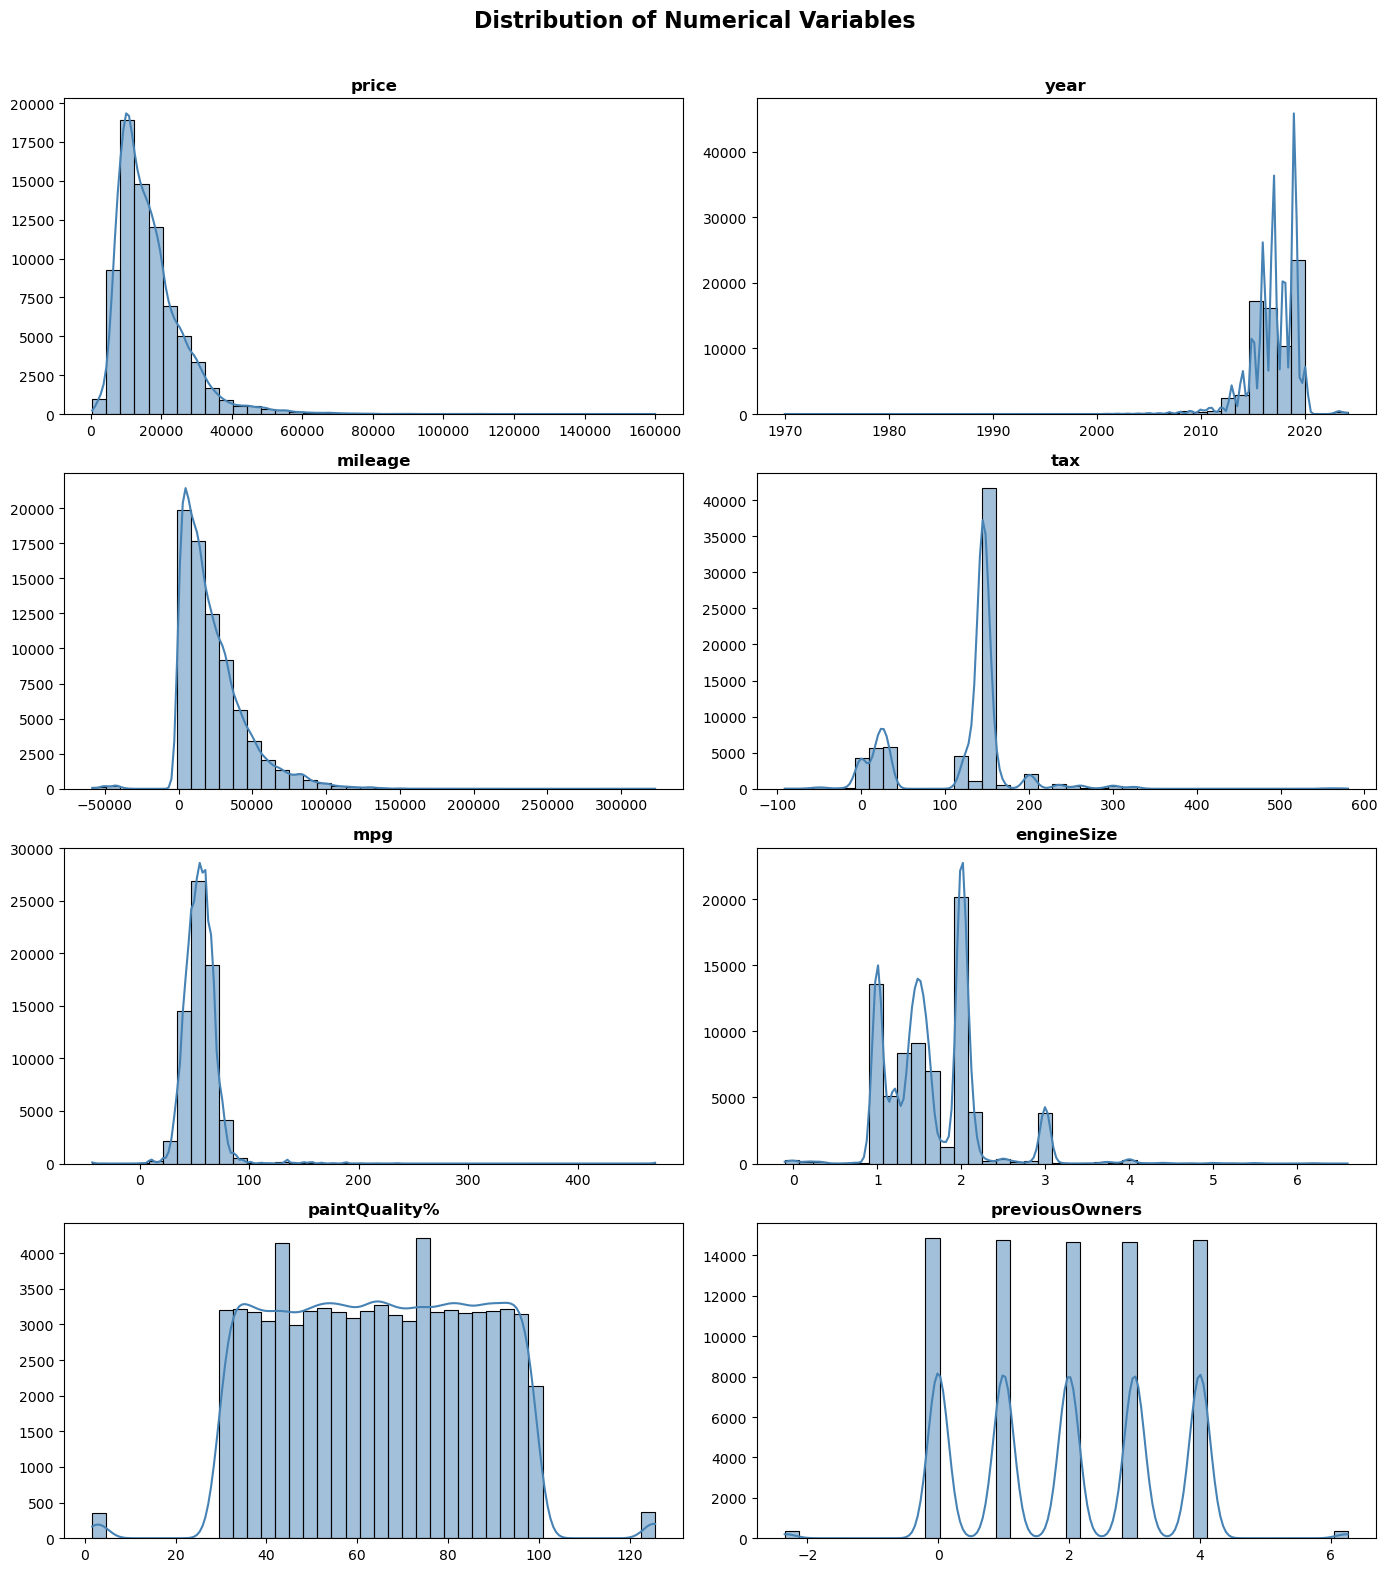

In [27]:
# Selecting numeric columns (excluding carID)
numeric_cols = ['price', 'year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners']

# Defining grid: 4 rows* 2 columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
axes = axes.flatten()

# Loop through variables and plot histograms
for i, col in enumerate(numeric_cols):
    sns.histplot(cars_train[col], bins=40, kde=True, ax=axes[i], color='steelblue')
    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjusting the layout
plt.suptitle('Distribution of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

The histograms reveal several data quality issues in the numerical variables, such as poorly defined variable limits, invalid negative values, and the presence of clear outliers. 


- Variables with poorly defined or unrealistic limits:

Some variables show values that fall outside realistic or logically valid ranges.
The variable 'year' shows values above 2020, which is not realistic given that the dataset represents used car listings collected up to 2020. To address this issue, we will most likely later apply capping, replacing any value above 2020 with 2020. 

Also, the variable 'paintQuality' is supposed to be a percentage and therefore should be between 0 and 100. The presence of values above 100 suggests either data entry errors or inconsistent measurement. However, this variable will most likely be dropped in later stages, since paint quality information is typically only available after the car is inspected by a mechanic, whereas the project goal is to predict car prices without any mechanical inspection. For this reason, although the limits are technically incorrect, this issue has limited impact on the final model.

- Variables with invalid negative values:

We also observed negative values in variables that, by definition, can't be negative: Mileage, Tax, mpg and PreviousOwners. Negative values in these variables are clearly invalid and most likely result from small data entry or formatting errors. Since these values represent quantities that are strictly non-negative, we will correct them by replacing each negative value with its absolute value. This approach preserves the magnitude of the original observation while enforcing logical consistency, and is preferable to removing rows at this early stage.

- Variables with clear outliers:

Finally, several variables show strong right-skewness and extreme values, indicating the presence of outliers. In particular, variables such as price, mileage, tax, and engineSize display unusually large values when compared to the rest of the data. To address this, we will later apply a winsorization (capping) strategy, where values outside predefined realistic thresholds are capped at those limits (for example, capping very high prices or engine sizes). This approach limits the influence of extreme observations on model training while keeping all rows in the dataset.

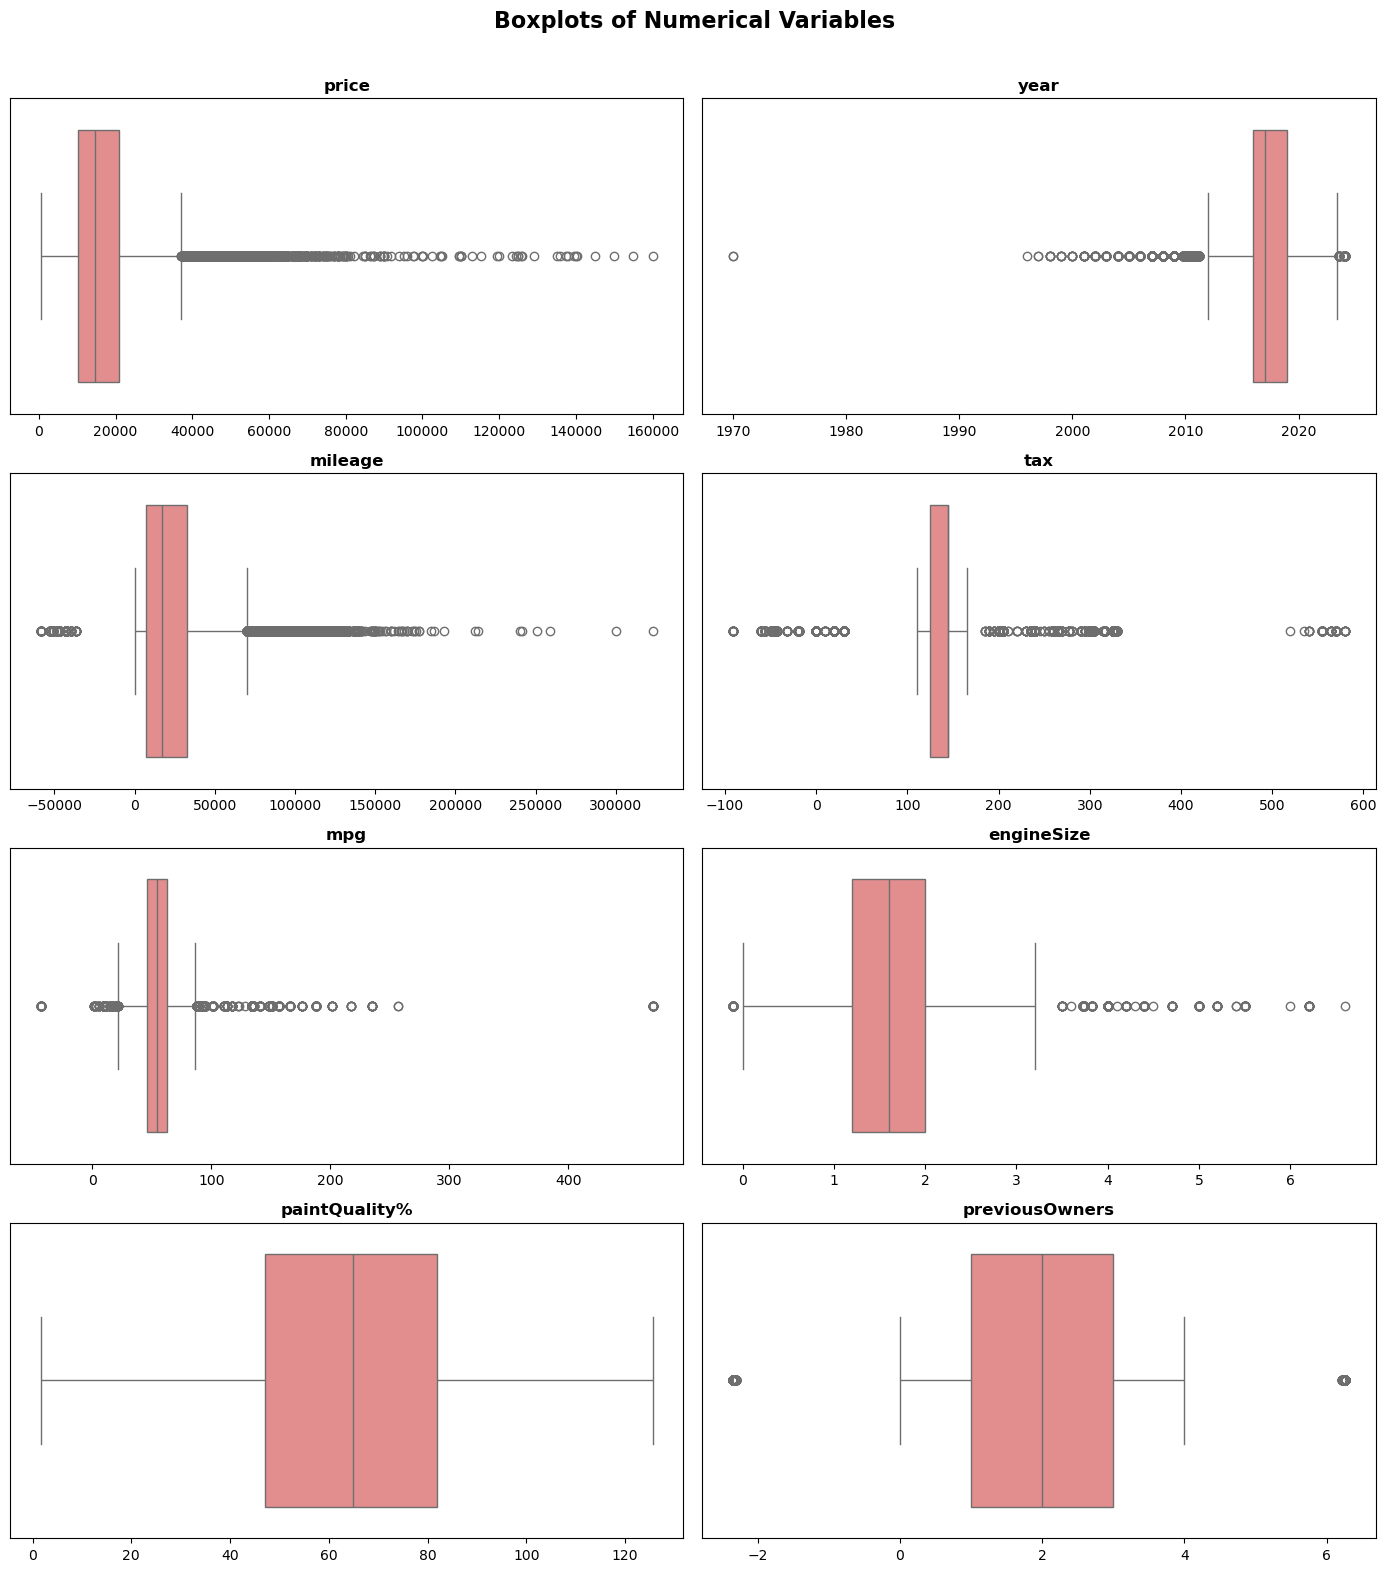

In [28]:
# Defining grid: 4 rows * 2 columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
axes = axes.flatten()

# Loop throgh variables and plot histograms
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=cars_train[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_yticks([])

# Adjusts layout
plt.suptitle('Boxplots of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


The visual representation of the IQR method confirms what we identified earlier in the histograms:

- Several variables have a lot of outliers, which explains the skewed shapes we noticed before. The visualization of the boxplots suggest that many of these extreme values correspond to rare but legitimate cases, such as luxury vehicles, large engines, or cars with exceptionally high mileage. Removing these observations entirely would lead to unnecessary information loss and reduce the dataset’s representativeness of the real market. So, as we explained before, we will handle these outlieres by applying winsoization (capping). 

- Also, as we also noticed in the histograms, some variables have negative values, which will be later converted into their absolute value, as explained before.

Overall, these plots make it clear that we’ll need to handle outliers and fix numeric issues before moving on to modeling.

<a class="anchor" id="1352-categorical-variables">

### 1.3.5.2 Categorical Variables
    
</a>

C:\Users\ritan\AppData\Local\Temp\ipykernel_33840\2884756366.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=cars_train, order=order, ax=axes[i], palette='Blues')
C:\Users\ritan\AppData\Local\Temp\ipykernel_33840\2884756366.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=cars_train, order=order, ax=axes[i], palette='Blues')
C:\Users\ritan\AppData\Local\Temp\ipykernel_33840\2884756366.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=cars_train, ax=axes[i], palette='Blues')
C:\Users\ritan

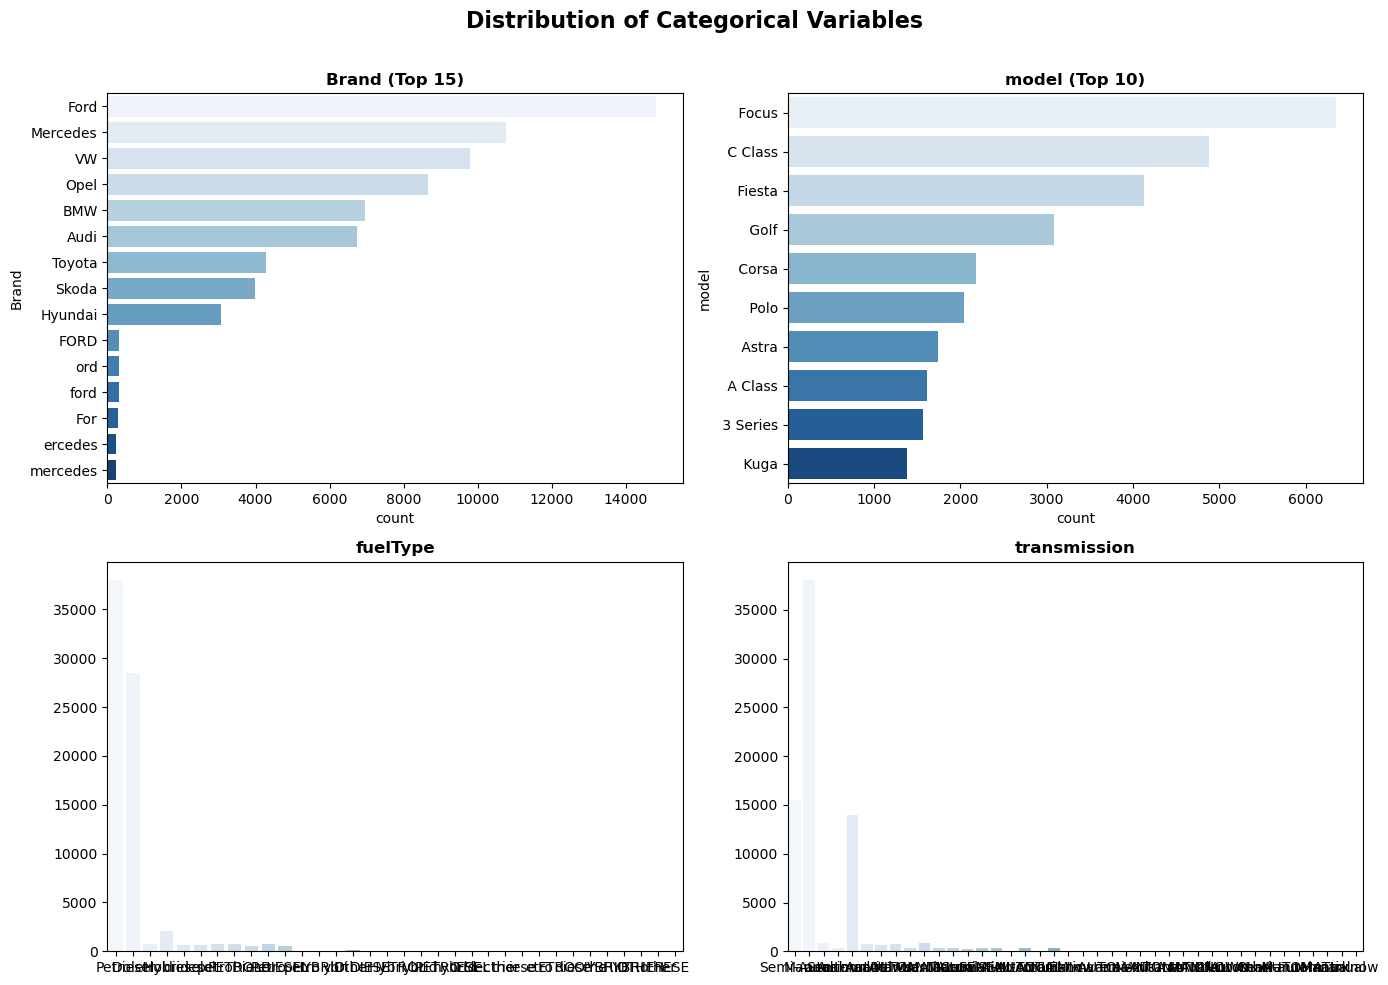

In [29]:
# Selects categorical variables
cat_cols = ['Brand', 'model', 'fuelType', 'transmission']

# Defining grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

# Loop through the categorical variables
for i, col in enumerate(cat_cols):
    if col == 'Brand':
        # Sorting based on frequency
        order = cars_train[col].value_counts().index[:15]  # top 15 brands
        sns.countplot(y=col, data=cars_train, order=order, ax=axes[i], palette='Blues')
        axes[i].set_title(f'{col} (Top 15)', fontsize=12, fontweight='bold')
    elif col == 'model':
        # Only top 10
        order = cars_train[col].value_counts().index[:10]
        sns.countplot(y=col, data=cars_train, order=order, ax=axes[i], palette='Blues')
        axes[i].set_title(f'{col} (Top 10)', fontsize=12, fontweight='bold')
    else:
        sns.countplot(x=col, data=cars_train, ax=axes[i], palette='Blues')
        axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

# Adjust layout
plt.suptitle('Distribution of Categorical Variables', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


The categorical distribution plots reveal several important patterns and data quality issues that need to be addressed before model training:

- Starting with Brand, the distribution is highly concentrated in a small number of manufacturers, with Ford, Mercedes, VW, Opel and BMW representing the majority of the dataset. However, we also observe multiple low-frequency categories that clearly correspond to the same brands but appear under different spellings or formats (for example, “Ford”, “ford”, “FORD”, “For”, “ord”). These inconsistencies would lead the model to treat identical brands as different entities, which is wrong.

- A similar issue happens in the model variable. Although the plot shows the most frequent models (such as Focus, Fiesta, Golf, and C Class), we will later notice that the rest of the data contains hundreds of distinct entries caused by inconsistent capitalization, extra spaces, abbreviations, and typographical errors. 

- The fuelType and transmission variables also show strong dominance of a few categories (for example, Petrol and Diesel for fuelType, Manual and Automatic for transmission), which is expected. Even though we can't see it clearly in these plots, as it happens to the other categorical variables, these two variables will also later reveal the presence of misspelled and inconsistent labels (like “manual”, “MANUAL”, “anual”, “semi-aut”), which would incorrectly be interpreted as separate categories.

Overall, these plots confirm that while the categorical variables contain meaningful information, they also suffer from severe formatting and spelling inconsistencies. To address these issues, we will later standardize all categorical strings (convert to uppercase and trim extra spaces) and correct misspellings using reference lists and fuzzy matching, so that the same category is always represented consistently. Any remaining ambiguous or missing cases will be kept as missing and handled in the dedicated missing-value preprocessing step.

<a class="anchor" id="14-initial-data-preparation">

### 1.4 Initial Data Preparation
    
</a>

<a class="anchor" id="141-removing-irrelevant-variables">

### 1.4.1. Removing Irrelevant Variables
    
</a>

To start the initial data preparation stage, we decided to first check which variables were not informative or relevant for predicting car prices. 

First, we observed that the variable 'hasDamage' contains only zero values across the entire dataset. Since a variable with no variability can't contribute to explaining differences in car prices, it was removed from the dataset.

In [30]:
cars_train['hasDamage'].unique()

array([ 0., nan])

In [31]:
# Removing variable "hasDamage"
cars_train = cars_train.drop(columns=['hasDamage'])

Second, based on the project guidelines, we identified 'paintQuality%' as an unusable feature. According to its description, this variable is filled in by a mechanic during the vehicle inspection process. Because the purpose of this project is to predict car prices without the car going to the mechanic, this variable would introduce information that is not available at prediction time. For this reason, and to avoid unrealistic modeling assumptions, paintQuality% was also removed from the dataset.

In [32]:
# Removing variable 'paintQuality%'
cars_train = cars_train.drop(columns=['paintQuality%'])

So, to conclude, after going through all the variables in the dataset to spot any that don’t really help predict 'price', we decided that:

-`carID`: This variable is just a unique identifier, so it doesn’t add any value for prediction. Since it’s already used as the dataset index, it’ll be left out of the modeling stage.

-`hasDamage`: We decided to remove this one because it only contains either 0 or NaN. With no variation, it doesn’t tell the model anything useful or help it distinguish between cars.

-`paintQuality%`: Did not make sense given the projects context.

All other variables will stay in the dataset for now, at least until we reach the Feature Selection step, since they might still carry some predictive information.

<a class="anchor" id="142-correcting-categorical-variables">

### 1.4.2. Correcting Categorical columns
    
</a>

In the visual exploration stage we noticed that several categorical variables contain spelling errors, inconsistent capitalization, extra spaces, formatting issues, etc. For example some car brands or fuel types appear in multiple slightly different forms (“BMW”, “bmw”, “Bmw”, “BM”), which would incorrectly be treated as distinct categories by the model.

To address this problem, we implemented a cleaning procedure that standardizes categorical values while carefully preserving genuine missing values. All non-missing text entries were converted to uppercase, trimmed of extra spaces, and matched against predefined reference lists using fuzzy string matching. 

First, we decided to print all the unique values for the categorical columns so we can check all the misspellings in the different variables:

In [33]:
print(cars_train['Brand'].unique()) 
print(cars_train['model'].unique())
print(cars_train['transmission'].unique())
print(cars_train['fuelType'].unique())

['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot']
[' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'
 ' 5 Series' ' Aygo' ' 4 Series' ' SLK' ' Viva' ' T-Roc' 'Focus'
 ' EcoSport' ' Tucson' ' EcoSpor' nan ' X-CLASS' ' CL Class' ' IX20'
 ' i20' ' Rapid' ' a1' ' Auris' ' sharan' ' I2

### Correcting the variables 'Brand', 'transmission' and 'fuelType':

To treat all the errors identified in the different categorical variables, we decided to create a function ('clean_up') that will rewrite the objects that are miss-spelled.

For that, we defined a series of lists with the correct objects for each category, to be used in the function:

In [34]:
# Reference lists for the categories

brand_list=['TOYOTA','AUDI','BMW','VW','FORD','OPEL','MERCEDES','HYUNDAI','SKODA']
fuel_type_list=['PETROL','DIESEL','HYBRID','OTHER','ELECTRIC'] 
transmission_list=['MANUAL','AUTOMATIC','SEMI-AUTO','UNKNOWN','OTHER']

Now we will create the 'clean up' function. This function standardizes categorical data by:

- Converting non-missing text values to uppercase and trimming unnecessary spaces;

- Explicitly preserving missing values (NaN) and reverting common string representations of missing data back to real NaN values;

- Comparing each non-missing entry against a predefined reference list of valid categories;

- Automatically correcting minor spelling variations using the difflib library, based on a similarity threshold;

Although the clean_up function is effective for standardizing categorical variables with a limited and well-defined set of possible values (such as 'Brand', 'fuelType', and 'transmission'), it will not be applied directly to the 'model' variable.

The 'model' column contains hundreds of distinct categories, and, more importantly, the validity of a model name depends on the corresponding car brand. Applying fuzzy string matching globally to the 'model' variable would therefore risk incorrectly matching similar-looking model names across different brands (for example, matching models that share common prefixes or short strings but belong to different manufacturers).

To avoid introducing incorrect associations and data leakage between brands, the 'model' variable will instead be cleaned in a brand-aware manner, where each model value is compared only against the list of valid models for its specific brand. This approach ensures higher accuracy and preserves the semantic relationship between brand and model, which is crucial for downstream feature engineering and encoding.

In [35]:
# Applies the cleanup function to selected categorical columns
cars_train= clean_up(cars_train, 'Brand', brand_list)
cars_train= clean_up(cars_train, 'fuelType', fuel_type_list)
cars_train= clean_up(cars_train, 'transmission', transmission_list)

# Verifying the final unique values after cleanup (to check if all typos were fixed)
print(cars_train['Brand'].unique()) 
print(cars_train['fuelType'].unique())
print(cars_train['transmission'].unique())

['VW' 'TOYOTA' 'AUDI' 'FORD' 'BMW' 'SKODA' 'OPEL' 'MERCEDES' 'HYUNDAI' nan]
['PETROL' 'DIESEL' 'HYBRID' nan 'OTHER' 'ELECTRIC']
['SEMI-AUTO' 'MANUAL' 'AUTOMATIC' nan 'UNKNOWN' 'OTHER']


The application of the clean_up function successfully standardized the categorical variables 'Brand', 'fuelType', and 'transmission'. After the cleaning process, all valid categories were reduced to a consistent and well-defined set of values, with spelling errors, inconsistent capitalization, and formatting issues effectively corrected.

Importantly, the function preserved genuine missing values by explicitly handling NaN entries and reverting common string representations of missing data back to real missing values. This prevents the model from incorrectly interpreting missing information as a valid category.

### Correcting the variable 'model':

After cleaning the 'Brand', 'transmission' and 'fuelType' variables, we proceeded to correct the 'model' variable. This step required a different approach, as the model column contains a large number of distinct categories and each model name is only valid within the context of its corresponding brand.

So, for this variable, it is important to be aware that the models need to be associated with the right brand. 

We started by checking all the unique models for each brand while also standardizing the formatting of all non-missing model values by converting them to uppercase and removing extra spaces: 

In [36]:
# Converts to uppercase every model
s = cars_train['model'].astype("object")
mask = s.notna()
s.loc[mask] = s.loc[mask].astype(str).str.strip().str.upper()
cars_train['model'] = s

for brand in brand_list:
    unique_models = cars_train[cars_train['Brand'] == brand]['model'].unique()
    print(f"{brand}: {unique_models}")

TOYOTA: ['YARIS' 'C-HR' 'AYGO' 'AURIS' 'RAV4' 'PRIUS' 'COROLLA' nan 'VERSO' 'AYG'
 'GT86' 'LAND CRUISER' 'PROACE VERSO' 'HILUX' 'AVENSIS' 'CAMRY' 'YARI'
 'SUPRA' 'C-H' 'VERSO-S' 'AURI' 'IQ' 'RAV' 'URBAN CRUISER' 'COROLL' 'HILU'
 'URBAN CRUISE' 'LAND CRUISE' 'VERS']
AUDI: ['Q2' 'A3' 'Q3' 'Q5' 'TT' 'A1' 'A8' 'A4' 'A5' 'A6' 'Q7' 'Q' nan 'RS6' 'A7'
 'A' 'RS5' 'R8' 'Q8' 'RS3' 'SQ5' 'RS4' 'SQ7' 'S3' 'S4' 'A2' 'S8' 'RS' 'T'
 'S5']
BMW: ['2 SERIES' '3 SERIES' '5 SERIES' '4 SERIES' 'X3' 'X2' 'X1' '1 SERIES' nan
 'M3' 'X4' '3 SERIE' 'M4' 'Z4' '2 SERIE' 'X5' '6 SERIES' '4 SERIE'
 '1 SERIE' 'X' '5 SERIE' 'X6' '8 SERIES' 'Z3' '7 SERIES' 'I3' 'I8' 'X7'
 '7 SERIE' 'M5' 'Z' 'M' '8 SERIE' 'M2' 'I' 'M6' '6 SERIE']
VW: ['GOLF' 'PASSAT' 'POLO' 'UP' 'SHARAN' 'TIGUAN' 'T-ROC' 'ARTEON' nan
 'TOURAN' 'CADDY MAXI LIFE' 'BEETLE' 'SHARA' 'TOUAREG' 'SHUTTLE'
 'TIGUAN ALLSPACE' 'CARAVELLE' 'POL' 'T-CROSS' 'GOLF SV' 'GOL'
 'CALIFORNIA' 'TOURA' 'CADDY LIFE' 'SCIROCCO' 'PASSA' 'AMAROK' 'CC' 'EOS'
 'TIGUA' 'T-RO' 'JET

At this stage, the results confirm that the formatting normalization was successful, as differences due to capitalization and leading/trailing spaces were removed. However, the output also reveals that, as expected, many model names present spelling inconsistencies, abbreviations, or truncated forms (for example, FOCU instead of FOCUS, YARI instead of YARIS, ASTR instead of ASTRA, or VERS instead of VERSO). Additionally, some brands contain ambiguous or incomplete model identifiers, such as single-letter entries (A, Q, X, M, K) or partially written model names. These cases can't be reliably corrected using simple string normalization alone.

So, after concluding that the model names also contain multiple spelling and formatting inconsistencies, we decided to apply the same cleaning strategy used for the 'Brand' variable to the 'model' variable, ensuring that all model names are standardized and consistently represented across the dataset.

We started by defining reference lists of valid models for each brand and constructed a dictionary mapping each brand to its corresponding model list. 

In [37]:
ford_models = ['FIESTA','FOCUS','KA+','KA','ECOSPORT','B-MAX','S-MAX','MONDEO','KUGA','TOURNEO CONNECT','GRAND TOURNEO CONNECT','TOURNEO CUSTOM','C-MAX','GRAND C-MAX','PUMA','EDGE','FUSION','MUSTANG','GALAXY','ESCORT','STREETKA','RANGER']
audi_models = ['A1','A2','A3','A4','A5','A6','A7','A8','Q2','Q3','Q5','Q7','Q8','TT','R8','RS3','RS4','RS5','RS6','S3','S4','S5','S8','SQ5','SQ7']
bmw_models = ['1 SERIES','2 SERIES','3 SERIES','4 SERIES','5 SERIES','6 SERIES','7 SERIES','8 SERIES','X1','X2','X3','X4','X5','X6','X7','Z3','Z4','I3','I8','M2','M3','M4','M5','M6']
vw_models = ['GOLF SV','GOLF','PASSAT','POLO','UP','SHARAN','TIGUAN','TIGUAN ALLSPACE','T-ROC','T-CROSS','ARTEON','TOURAN','CADDY','CADDY LIFE','CADDY MAXI','CADDY MAXI LIFE','BEETLE','TOUAREG','SHUTTLE','CARAVELLE','CALIFORNIA','SCIROCCO','CC','EOS','JETTA','FOX','AMAROK']
opel_models = ['INSIGNIA','MOKKA','MOKKA X','CORSA','ASTRA','VIVA','ADAM','CROSSLAND','CROSSLAND X','ZAFIRA','ZAFIRA TOURER','GRANDLAND','GRANDLAND X','COMBO LIFE','MERIVA','AGILA','ANTARA','TIGRA','VIVARO','CASCADA','VECTRA','AMPERA','GTC','KADJAR']
mercedes_models = ['200','220','230','A CLASS','B CLASS','C CLASS','CL CLASS','CLK','CLS CLASS','CLC CLASS','E CLASS','S CLASS','SL CLASS','SLK','GLA CLASS','GLB CLASS','GLC CLASS','GLE CLASS','GLS CLASS','GL CLASS','G CLASS','M CLASS','V CLASS','X-CLASS']
hyundai_models = ['I10','I20','I30','I40','IX20','IX35','KONA','TUCSON','SANTA FE','IONIQ','VELOSTER','GETZ','ACCENT','I800','TERRACAN']
skoda_models = ['FABIA','RAPID','SCALA','CITIGO','OCTAVIA','SUPERB','YETI','YETI OUTDOOR','ROOMSTER','KAMIQ','KAROQ','KODIAQ']
toyota_models = ['YARIS','C-HR','AYGO','AURIS','RAV4','PRIUS','COROLLA','VERSO','GT86','LAND CRUISER','PROACE VERSO','HILUX','AVENSIS','CAMRY','SUPRA','VERSO-S','IQ','URBAN CRUISER']

brand_models = {
    'TOYOTA': toyota_models,
    'FORD': ford_models,
    'VW': vw_models,
    'OPEL': opel_models,
    'BMW': bmw_models,
    'AUDI': audi_models,
    'MERCEDES': mercedes_models,
    'HYUNDAI': hyundai_models,
    'SKODA': skoda_models
}


With this structure, we applied a loop that performs the cleaning process separately for each brand. Using the dictionary that maps each brand to its corresponding list of valid models, we filtered the dataset by brand and applied the previously created 'clean_up' function only to the models associated with that brand. This prevents incorrect matches between models that may share similar names across different brands.

In [38]:
for brand, model_list in brand_models.items():
    brand_cars = cars_train[cars_train['Brand'] == brand]
    brand_cars = clean_up(brand_cars, 'model', model_list)
    cars_train.update(brand_cars)

To validate the cleaning process, we compared the number of unique model values present in the dataset for each brand with the number of models defined in the corresponding reference list.

Since missing values (NaN) are excluded from the count, an exact match between these two numbers indicates that all model names were successfully standardized.

In [39]:
# This loop compares the number of unique models in cars_train for each brand with the number of models in the reference list (brand_models)
for brand in brand_list:
    unique_models_in_cars_train = cars_train[cars_train['Brand'] == brand]['model'].nunique()
    ref_list_length = len(brand_models.get(brand, []))
    print(f"{brand}: {unique_models_in_cars_train} unique models in the dataset, {ref_list_length} in reference list")


TOYOTA: 18 unique models in the dataset, 18 in reference list
AUDI: 25 unique models in the dataset, 25 in reference list
BMW: 24 unique models in the dataset, 24 in reference list
VW: 27 unique models in the dataset, 27 in reference list
FORD: 22 unique models in the dataset, 22 in reference list
OPEL: 24 unique models in the dataset, 24 in reference list
MERCEDES: 24 unique models in the dataset, 24 in reference list
HYUNDAI: 15 unique models in the dataset, 15 in reference list
SKODA: 12 unique models in the dataset, 12 in reference list


As shown above, the number of unique model values in the dataset matches exactly the number of models defined in the reference list for every brand.

This result confirms that the brand-aware cleaning strategy was successful: all model names were correctly standardized, and no additional or incorrectly spelled model values remain in the dataset.

Still, to ensure that the model variable is fully consistent and correctly associated with each brand, we performed an additional validation step. In this step, we checked whether any model values remain that are not included in the predefined reference list of valid models for their corresponding brand. This allows us to confirm not only that the number of unique models is correct, but also that every individual model entry belongs to the appropriate brand.

In [40]:
# Verify if there are any invalid models in each brand

for brand, model_list in brand_models.items():
    invalid_models = cars_train.loc[
        (cars_train['Brand'] == brand) &
        (~cars_train['model'].isin(model_list)) &
        (cars_train['model'].notna()),
        'model'
    ].unique()
    
    print(f"{brand}: invalid models -> {invalid_models if len(invalid_models) > 0 else 'None'}")


TOYOTA: invalid models -> None
FORD: invalid models -> None
VW: invalid models -> None
OPEL: invalid models -> None
BMW: invalid models -> None
AUDI: invalid models -> None
MERCEDES: invalid models -> None
HYUNDAI: invalid models -> None
SKODA: invalid models -> None


The results show that no invalid model values were found for any brand.

This confirms that all non-missing model entries are correctly standardized and consistently aligned with their respective brands. At this point, the Brand–model relationship is fully coherent across the dataset, and the 'model' variable can be safely used in subsequent feature engineering and encoding steps.

### Inferring Missing Brand Values from Model Information:

Now that all the categorical variables seem to be cleaned, we attempted to recover missing values in the 'Brand' column using the information available in the corresponding 'model' entries.

We thought that if we checked, for all missing brand values, their corresponding model, we could replace those missing values by the correct brand.

In [41]:
cars_train = fill_missing_brands(cars_train, brand_models)

In [42]:
# Checks for Brands that are not in the Brand list
invalid_lines = cars_train[~cars_train['Brand'].isin(brand_list)]

print(invalid_lines)

      Brand        model    year  price transmission  mileage fuelType    tax  \
carID                                                                           
16342   NaN          NaN  2017.0   8600       MANUAL  28820.0   DIESEL    0.0   
12064   NaN          NaN  2018.0  21300    AUTOMATIC  11258.0      NaN  145.0   
44351   NaN          NaN  2013.0  12990    AUTOMATIC  43000.0   DIESEL  145.0   
38960   NaN          NaN  2019.0  25495    SEMI-AUTO   4255.0   PETROL  145.0   
55454   NaN          NaN  2017.0   8997       MANUAL  11200.0   PETROL   30.0   
74657   NaN          NaN  2018.0  19750    SEMI-AUTO   9500.0   PETROL  145.0   
669     NaN            A  2019.0  29250    AUTOMATIC  10055.0   DIESEL  145.0   
20208   NaN          NaN  2017.0  15499    SEMI-AUTO  64315.0   DIESEL  145.0   
21461   NaN         FOCU  2018.0  13000       MANUAL  39448.0   DIESEL  150.0   
44161   NaN          NaN  2015.0  14999       MANUAL  29053.0   DIESEL   20.0   
44380   NaN          NaN  20

After applying this procedure, we inspected the remaining missing values in the Brand column and identified two distinct situations:

- First, there are cases where both the Brand and the corresponding model values are missing. In these situations, there is no information available that allows us to infer the correct brand, and these observations are therefore left unchanged and handled later during the general missing value treatment stage.

- Second, there are cases where the Brand value is missing but the model entry exists and is not correctly standardized. This happens because the cleaning of the model variable was performed in a brand-aware manner: model names were only corrected by comparing them against the list of valid models for each known brand. When the Brand value itself is missing or incorrect, the corresponding model cannot be reliably matched to any brand-specific reference list, and therefore remains uncorrected at that stage.

Among these cases, some model values can be easily interpreted based on domain knowledge. For example, the value “FOCU” clearly corresponds to “FOCUS” and can be manually corrected, allowing the associated brand (FORD) to be inferred. However, other cases are inherently ambiguous. A single-letter model such as “A” may refer to multiple manufacturers or model families (for instance, Audi A-series models or Ford KA), making any automatic or manual brand assignment unreliable. This also happens in other single-letter entries, like "Q" or "X".

To avoid introducing incorrect assumptions into the dataset, only obvious and unambiguous model corrections will be applied. All remaining ambiguous cases are intentionally left with missing Brand values and will be addressed later as part of the missing value handling strategy.

In [43]:
# Correcting models with clear interpetation

cars_train.loc[cars_train['model'] == 'FOCU', 'model'] = 'FOCUS'
cars_train.loc[cars_train['model'] == 'YARI', 'model'] = 'YARIS'
cars_train.loc[cars_train['model'] == 'C CLAS', 'model'] = 'C CLASS'
cars_train.loc[cars_train['model'] == 'CL CLAS', 'model'] = 'CL CLASS'
cars_train.loc[cars_train['model'] == 'GLA CLAS', 'model'] = 'GLA CLASS'
cars_train.loc[cars_train['model'] == 'KARO', 'model'] = 'KAROQ'
cars_train.loc[cars_train['model'] == 'ASTR', 'model'] = 'ASTRA'
cars_train.loc[cars_train['model'] == 'GOL', 'model'] = 'GOLF'
cars_train.loc[cars_train['model'] == 'POL', 'model'] = 'POLO'
cars_train.loc[cars_train['model'] == 'FIEST', 'model'] = 'FIESTA'
cars_train.loc[cars_train['model'] == 'YETI OUTDOO', 'model'] = 'YETI OUTDOOR'
cars_train.loc[cars_train['model'] == 'TIGUA', 'model'] = 'TIGUAN'
cars_train.loc[cars_train['model'] == 'GRAND C-MA', 'model'] = 'GRAND C-MAX'
cars_train.loc[cars_train['model'] == 'SCAL', 'model'] = 'SCALA'

Now we can call the function that we wrote previously:

In [44]:
cars_train = fill_missing_brands(cars_train, brand_models)

After this, we checked if there were any rows that have model but no brand:

In [45]:
# Checks for Brands that are not in the Brand list
invalid_lines = cars_train[~cars_train['Brand'].isin(brand_list)]

print(invalid_lines)

      Brand model    year  price transmission  mileage fuelType    tax   mpg  \
carID                                                                          
16342   NaN   NaN  2017.0   8600       MANUAL  28820.0   DIESEL    0.0  74.4   
12064   NaN   NaN  2018.0  21300    AUTOMATIC  11258.0      NaN  145.0  64.2   
44351   NaN   NaN  2013.0  12990    AUTOMATIC  43000.0   DIESEL  145.0  54.3   
38960   NaN   NaN  2019.0  25495    SEMI-AUTO   4255.0   PETROL  145.0  44.8   
55454   NaN   NaN  2017.0   8997       MANUAL  11200.0   PETROL   30.0  58.0   
74657   NaN   NaN  2018.0  19750    SEMI-AUTO   9500.0   PETROL  145.0  55.4   
669     NaN     A  2019.0  29250    AUTOMATIC  10055.0   DIESEL  145.0  47.9   
20208   NaN   NaN  2017.0  15499    SEMI-AUTO  64315.0   DIESEL  145.0  54.3   
44161   NaN   NaN  2015.0  14999       MANUAL  29053.0   DIESEL   20.0  64.2   
44380   NaN   NaN  2019.0  25849    SEMI-AUTO  10977.0   PETROL  145.0  47.1   
6742    NaN   NaN  2019.0  35850    AUTO

The only rows left where there is a missing brand and not a missing model are the ones who have a single-letter model. Because we can't guess which models each letter stands for, we will leave it like this and deal with it later when we treat the missing values.

<a class="anchor" id="143-correcting-numerical-variables">

### 1.4.3. Correcting Numerical columns
    
</a>

After cleaning the categorical variables, we decided to correct some inconsistencies in the numerical features. Several of these variables contain values that are inconsistent with their real-world interpretation, such as values outside plausible ranges, negative entries where only non-negative values make sense, or decimal values in variables that should be discrete by definition.

In this section, we will apply a set of targeted corrections to ensure that all numerical variables are realistic, interpretable, and internally consistent. These corrections are rule-based and grounded in domain knowledge, aiming to fix clear data quality issues while preserving as much information as possible and avoiding unnecessary data loss.

<a class="anchor" id="1431-correcting-value-limits">

### 1.4.3.1 Correcting value limits
</a>

The variable 'year' represents the production year of each vehicle and therefore must lie within a realistic and well-defined time range. During the exploratory analysis, we identified a small number of observations with values exceeding the maximum year covered by the dataset. Since the data corresponds to cars listed on the Cars4You platform up to 2020, any value above this threshold is not plausible in the context of the problem.

Rather than removing these observations, we correct them by capping the values at the maximum valid year. 

- **`year`** : any value greater than 2020 was replaced by 2020

This approach preserves information while ensuring all values remain within realistic and interpretable ranges.


In [46]:
# If year > 2020 then year = 2020
cars_train.loc[cars_train['year'] > 2020, 'year'] = 2020

In [47]:
# Checking if now there isn't any year > 2020
cars_train['year'].unique()

array([2016.        , 2019.        , 2018.        , 2014.        ,
       2017.        , 2020.        , 2013.        ,           nan,
       2015.        , 2011.        , 2012.        , 2003.        ,
       2009.        , 2007.        , 2005.        , 2011.11118842,
       2011.21085349, 2004.        , 2010.        , 2010.56500919,
       2008.        , 2006.        , 2010.67696784, 2001.        ,
       2000.        , 2010.26863473, 2010.37154646, 2002.        ,
       2009.81675711, 2010.7464032 , 2012.69574039, 1996.        ,
       1998.        , 1970.        , 1999.        , 1997.        ])

<a class="anchor" id="1432-correcting-negative-values">

### 1.4.3.2 Correcting negative values
</a>

Several numerical variables in the dataset are constrained by definition to be non-negative. For instance, variables such as mileage, tax, mpg, engineSize, and previousOwners can't logically take negative values. However, during the data inspection, we identified a small number of negative entries in these columns.

In our opinio, these values are most likely the result of data-entry or sign errors rather than meaningful information. Therefore, instead of removing the affected observations or treating them as missing, we corrected these inconsistencies by replacing each negative value with its absolute value. This strategy preserves the magnitude of the original data while restoring logical consistency and ensuring that all numerical variables remain interpretable within the context of the problem.

In [48]:
# List of all the numeric variables
numeric_cols = ["price", "year", "mileage", "tax", "mpg", "engineSize", "previousOwners"]

# Checking how many negative values exist in the columns for each category
for col in numeric_cols:                                        
    if col in cars_train.columns:
        negative_count = (cars_train[col] < 0).sum()
        if negative_count > 0:
            print(f"{col}: {negative_count} negative values")

mileage: 369 negative values
tax: 378 negative values
mpg: 36 negative values
engineSize: 84 negative values
previousOwners: 371 negative values


In [49]:
# Replacing negative values with their absolute values 
cols_abs = ["mileage", "tax", "mpg", "engineSize", "previousOwners"]

for col in cols_abs:
    if col in cars_train.columns:
        cars_train[col] = cars_train[col].abs()

# Checking if there are still negative values
for col in cols_abs:
    if col in cars_train.columns:
        print(col, (cars_train[col] < 0).sum())

mileage 0
tax 0
mpg 0
engineSize 0
previousOwners 0


<a class="anchor" id="1433-converting-floats-into-integers">

### 1.4.3.3 Converting floats into integers
</a>

During the exploratory analysis, we observed that some variables that are conceptually discrete and should only take integer values — namely year and previousOwners — contained decimal values. These fractional values are not meaningful in the context of the problem, as a car cannot have a fractional year of production nor a fractional number of previous owners.

To address this issue, we will standardize these variables by rounding the values down to the nearest integer and explicitly converting them to an integer data type. Rounding down (using the floor operation) was chosen since it is an approach that avoids artificially inflating the values (for example, avoiding turning 2.3 previous owners into 3).

Before applying this correction, we first inspect the unique values of each variable to understand the extent and nature of the decimal entries:

In [50]:
cars_train['previousOwners'].unique()

array([4.        , 1.        , 2.34030622, 3.        , 0.        ,
       2.        ,        nan, 2.34565   , 6.25837066, 2.33512284,
       6.22789796, 6.25823052, 6.23017958, 2.33936045, 6.21772443,
       6.24583495, 2.29943868, 2.34010209, 2.31225953, 6.2482512 ,
       2.31733109, 6.23308217, 6.24177863, 2.33744529])

In [51]:
cars_train['year'].unique()

array([2016.        , 2019.        , 2018.        , 2014.        ,
       2017.        , 2020.        , 2013.        ,           nan,
       2015.        , 2011.        , 2012.        , 2003.        ,
       2009.        , 2007.        , 2005.        , 2011.11118842,
       2011.21085349, 2004.        , 2010.        , 2010.56500919,
       2008.        , 2006.        , 2010.67696784, 2001.        ,
       2000.        , 2010.26863473, 2010.37154646, 2002.        ,
       2009.81675711, 2010.7464032 , 2012.69574039, 1996.        ,
       1998.        , 1970.        , 1999.        , 1997.        ])

In [52]:
# Rounds down values (floor)
cars_train['previousOwners'] = np.floor(cars_train['previousOwners'])

# Converts the variable into integer type
cars_train['previousOwners'] = cars_train['previousOwners'].astype('Int64')

In [53]:
# Checking if now there are no longer decimal values in "previousOwners"
cars_train['previousOwners'].unique()

<IntegerArray>
[4, 1, 2, 3, 0, <NA>, 6]
Length: 7, dtype: Int64

Now we do the same for the variable 'year':

In [54]:
# Round down values (floor)
cars_train['year'] = np.floor(cars_train['year'])

# Converts the variable into integer type
cars_train['year'] = cars_train['year'].astype('Int64')

In [55]:
# Checking if now there are no longer decimal values in "year"
cars_train['year'].unique()

<IntegerArray>
[2016, 2019, 2018, 2014, 2017, 2020, 2013, <NA>, 2015, 2011, 2012, 2003, 2009,
 2007, 2005, 2004, 2010, 2008, 2006, 2001, 2000, 2002, 1996, 1998, 1970, 1999,
 1997]
Length: 27, dtype: Int64

<a class="anchor" id="145-applying-test-dataset">

### 1.4.5 Applying To The Test Dataset
    
</a>

In [56]:
X_test = cars_test.copy()

# Index + drop columns 
if "carID" in X_test.columns:
    X_test = X_test.set_index("carID")

X_test = X_test.drop(columns=["hasDamage", "paintQuality%"], errors="ignore")

# Categorical cleaning (keeps real NaN)
X_test = clean_up(X_test, "Brand", brand_list)
X_test = clean_up(X_test, "fuelType", fuel_type_list)
X_test = clean_up(X_test, "transmission", transmission_list)

# Standardize model casing 
s = X_test["model"].astype("object")
mask = s.notna()
s.loc[mask] = s.loc[mask].astype(str).str.upper().str.strip()
X_test["model"] = s

# Clean models within each brand using the same reference lists
for brand, model_list in brand_models.items():
    mask_brand = X_test["Brand"] == brand
    if mask_brand.any():
        tmp = clean_up(X_test.loc[mask_brand, :], "model", model_list)
        X_test.loc[mask_brand, "model"] = tmp["model"]

# Correcting models with clear interpretation 
X_test.loc[X_test['model'] == 'FOCU', 'model'] = 'FOCUS'
X_test.loc[X_test['model'] == 'YARI', 'model'] = 'YARIS'
X_test.loc[X_test['model'] == 'C CLAS', 'model'] = 'C CLASS'
X_test.loc[X_test['model'] == 'CL CLAS', 'model'] = 'CL CLASS'
X_test.loc[X_test['model'] == 'GLA CLAS', 'model'] = 'GLA CLASS'
X_test.loc[X_test['model'] == 'KARO', 'model'] = 'KAROQ'
X_test.loc[X_test['model'] == 'ASTR', 'model'] = 'ASTRA'
X_test.loc[X_test['model'] == 'GOL', 'model'] = 'GOLF'
X_test.loc[X_test['model'] == 'POL', 'model'] = 'POLO'
X_test.loc[X_test['model'] == 'FIEST', 'model'] = 'FIESTA'
X_test.loc[X_test['model'] == 'YETI OUTDOO', 'model'] = 'YETI OUTDOOR'
X_test.loc[X_test['model'] == 'TIGUA', 'model'] = 'TIGUAN'
X_test.loc[X_test['model'] == 'GRAND C-MA', 'model'] = 'GRAND C-MAX'
X_test.loc[X_test['model'] == 'SCAL', 'model'] = 'SCALA'

# Fill missing Brand using model->brand mapping 
X_test = fill_missing_brands(X_test, brand_models)


In [57]:
# Cap year to 2020 
if "year" in X_test.columns:
    X_test.loc[X_test["year"] > 2020, "year"] = 2020

# Fix sign errors by absolute value 
cols_abs = ["mileage", "tax", "mpg", "engineSize", "previousOwners"]
for col in cols_abs:
    if col in X_test.columns:
        X_test[col] = X_test[col].abs()

# Convert decimals to ints (floor) where it makes sense
for col in ["year", "previousOwners"]:
    if col in X_test.columns:
        X_test[col] = np.floor(X_test[col]).astype("Int64")

<a class="anchor" id="15-visual-exploration-after-data-clean-up">

### 1.5 Visual exploration after data clean-up
    
</a>

<a class="anchor" id="151-numerical-variables">

### 1.5.1 Numerical variables
    
</a>

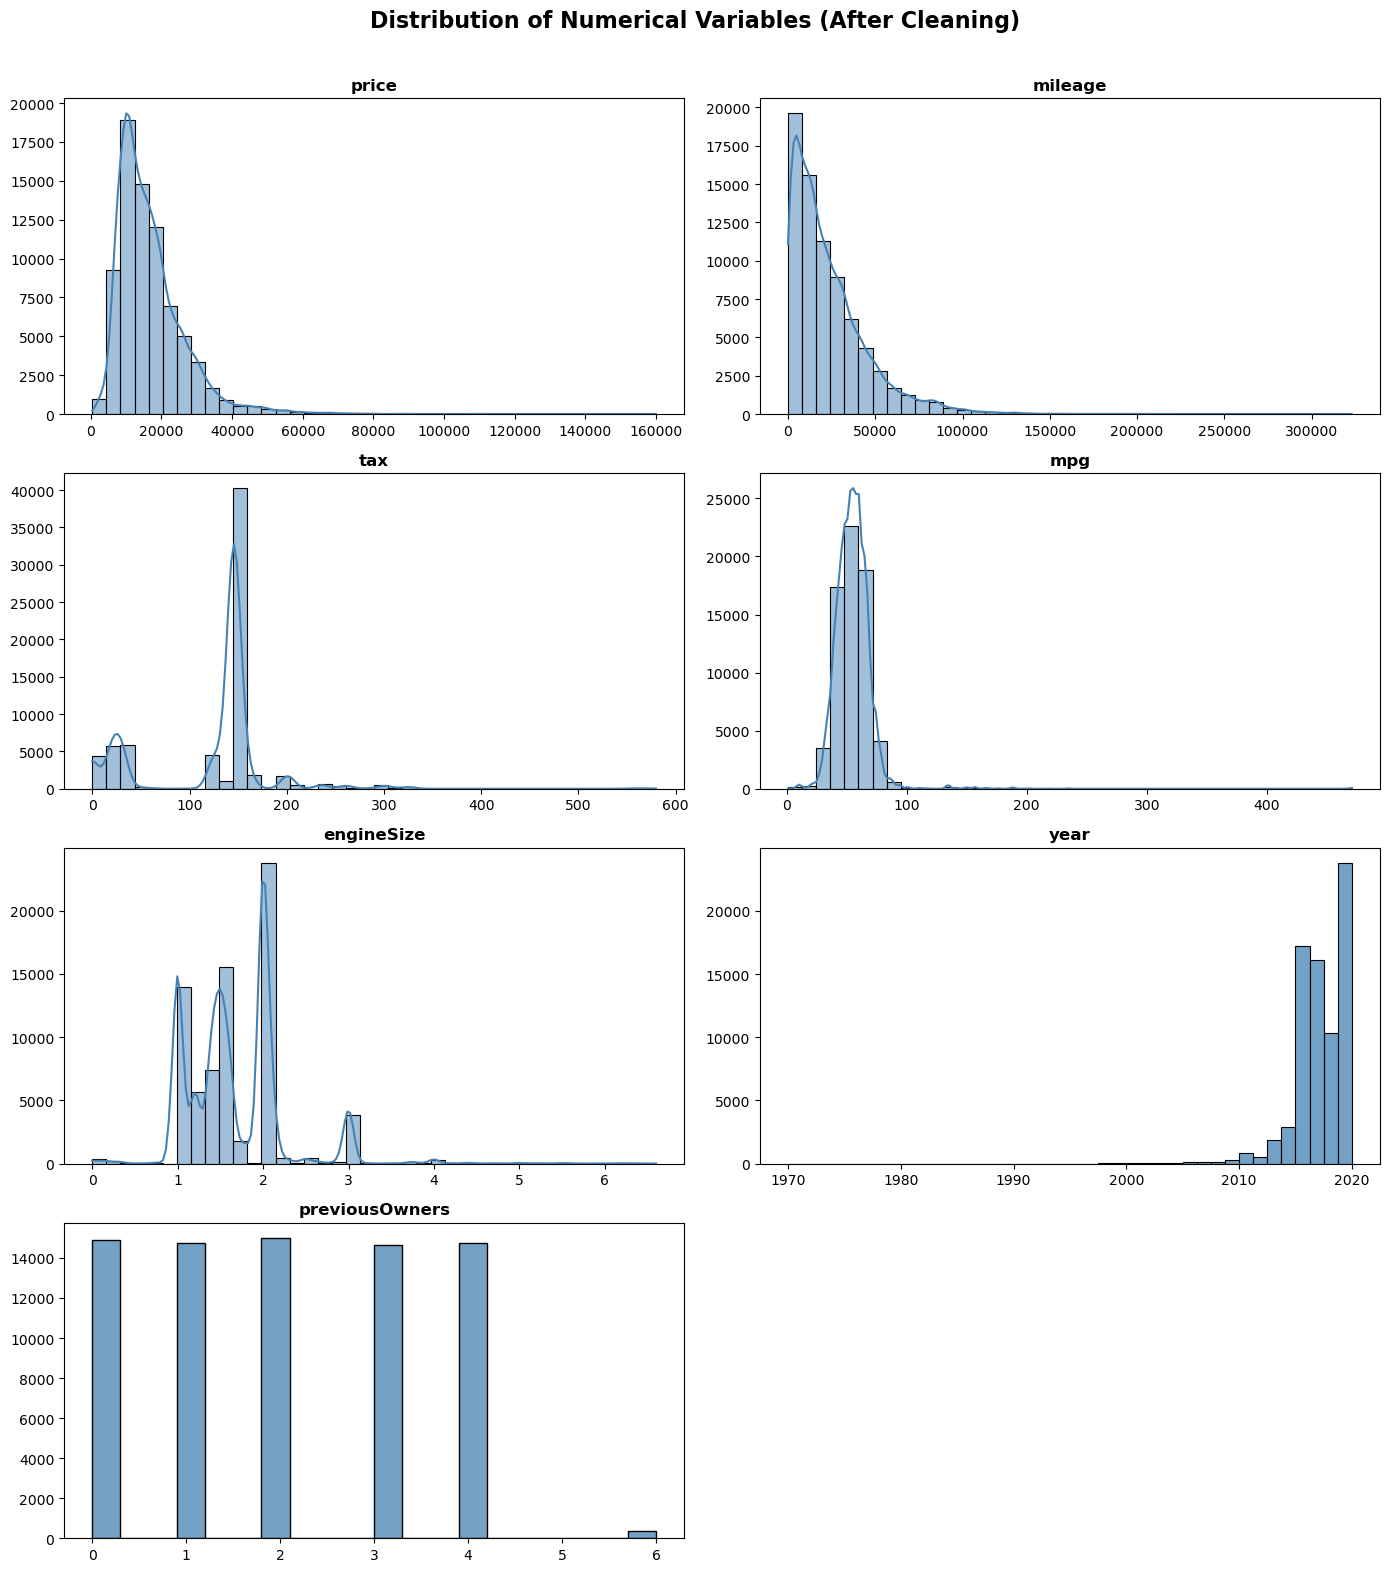

In [58]:
# Histograms of numerical variables

# Replace infinite values with NaN
cars_train = cars_train.replace([np.inf, -np.inf], np.nan)

# List of numeric columns
numeric_cols = ['price', 'mileage', 'tax', 'mpg', 'engineSize', 'year', 'previousOwners']

# Columns where KDE will be skipped (unstable distributions)
force_no_kde = {'year'}

# Create subplot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    
    # Clean and convert to float
    s = pd.to_numeric(cars_train[col], errors='coerce').dropna()

    # Skip if no valid data
    if s.empty:
        ax.text(0.5, 0.5, f"No valid data for {col}", ha='center', va='center')
        ax.set_axis_off()
        continue

    # Decide if KDE can be used
    use_kde = (col not in force_no_kde) and (s.std() > 0) and (s.nunique() > 10)

    try:
        # Try plotting with or without KDE
        sns.histplot(s, bins=40 if s.nunique() > 20 else 20, kde=use_kde, ax=ax, color='steelblue')
    except Exception:
        # If KDE fails, plot histogram only
        ax.clear()
        sns.histplot(s, bins=40 if s.nunique() > 20 else 20, kde=False, ax=ax, color='steelblue')

    # Format chart
    ax.set_title(col, fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Hide unused axes
for j in range(len(numeric_cols), len(axes)):
    axes[j].set_visible(False)

# Global title and layout
plt.suptitle('Distribution of Numerical Variables (After Cleaning)', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


After completing the cleaning of numerical variables, we explored the distributions of all numerical features to verify the impact of these preprocessing steps.

The histograms confirm that all numerical variables now fall within realistic and consistent ranges, with no remaining implausible values such as negative mileage, tax, mpg, or engine size.

Both price and mileage remain strongly right-skewed. This behaviour is expected in a car market dataset, where most vehicles are concentrated in lower price and mileage ranges, while a smaller number of high-end or heavily used cars create long right tails.

The variables tax, mpg, and engineSize display clear clustering patterns. These peaks are likely associated with specific regulatory tax brackets, engine configurations, and common efficiency standards across vehicle segments, rather than data quality issues.

The year variable (that now doesn't contain any value above 2020) shows a strong concentration in more recent years (particularly after 2010), which is consistent with the dataset representing a predominantly modern used-car market.

Finally, previousOwners now exhibits a clean, discrete distribution with integer values only and no negative or implausible entries, confirming that the correction of decimal and sign errors was successful.

Overall, these distributions confirm that the cleaning process effectively removed invalid data, leaving only natural skewness and clustering that are expected in real-world car dataset.

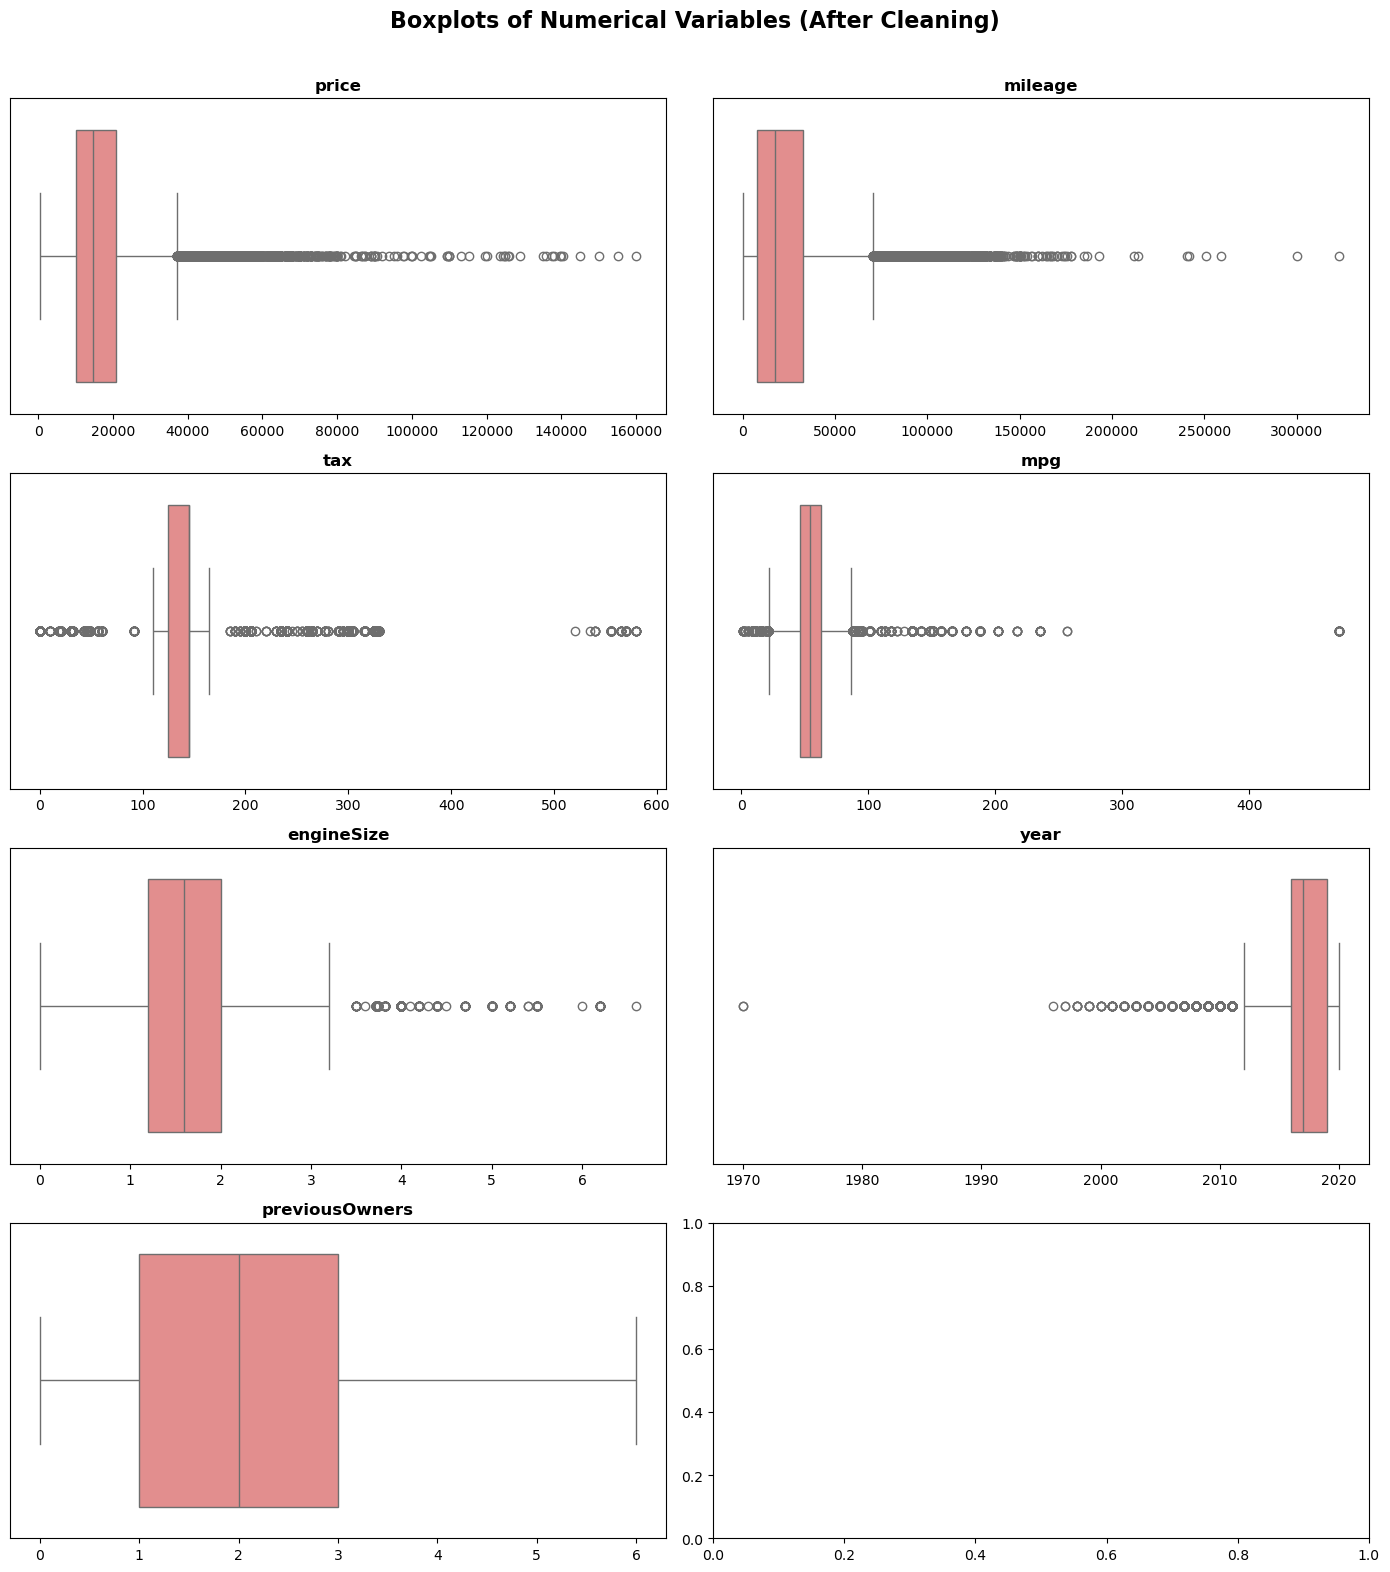

In [59]:
# Boxplots of Numerical Variables

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=cars_train[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_yticks([])

plt.suptitle('Boxplots of Numerical Variables (After Cleaning)', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

The boxplots confirm the persistence of skewness and outliers in several variables.

Variables such as price, mileage, and tax show strong right-skewness and several extreme observations. These values correspond to high-end vehicles or cars with unusually high usage and, since all observations now fall within realistic and logically valid ranges, they are treated as genuine data points rather than errors.

Variables like engineSize, year, and previousOwners present more compact interquartile ranges, indicating stable distributions after the correction of negative, decimal, and out-of-range values.

At this stage, no outliers are removed or modified. But later they will be addressed in the preprocessing phase through model-aware strategies, such as:

- applying transformations or scaling methods that reduce the influence of extreme values, and

- using robust models or outlier capping techniques when appropriate.

This ensures that potentially informative observations are not discarded prematurely, while still controlling their impact during model training.

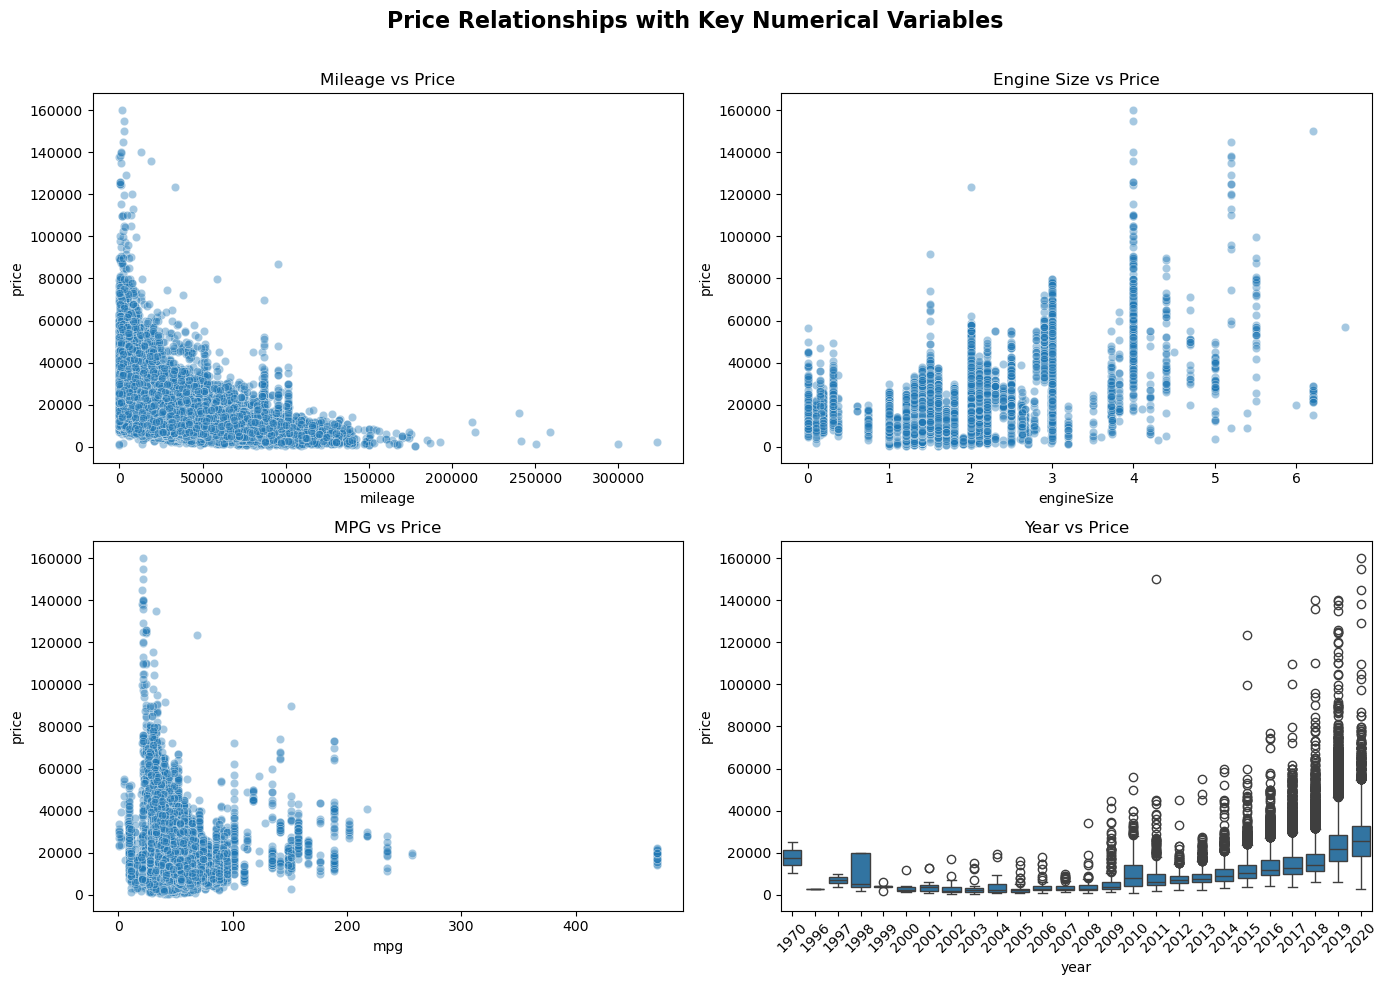

In [60]:
# Scatterplots of Numerical Variables

# Ensure numeric dtype (avoids object leftovers)
for c in ['price', 'mileage', 'engineSize', 'mpg', 'year']:
    cars_train[c] = pd.to_numeric(cars_train[c], errors='coerce')

# Drop rows with missing price (if they exist)
cars_train = cars_train.dropna(subset=['price'])

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Mileage vs Price
sns.scatterplot(data=cars_train, x='mileage', y='price', alpha=0.4, ax=axes[0, 0])
axes[0, 0].set_title('Mileage vs Price')

# Engine Size vs Price
sns.scatterplot(data=cars_train, x='engineSize', y='price', alpha=0.4, ax=axes[0, 1])
axes[0, 1].set_title('Engine Size vs Price')

# MPG vs Price
sns.scatterplot(data=cars_train, x='mpg', y='price', alpha=0.4, ax=axes[1, 0])
axes[1, 0].set_title('MPG vs Price')

# Year vs Price (boxplot reads better than scatter)
# Drop rows with missing or invalid 'year' before plotting
year_data = cars_train.dropna(subset=['year', 'price'])
year_data = year_data[year_data['year'] > 1900]  # filter out any bad entries
sns.boxplot(data=year_data, x='year', y='price', ax=axes[1, 1])
axes[1, 1].set_title('Year vs Price')
axes[1, 1].tick_params(axis='x', rotation=45)

# Add global title and adjust layout
plt.suptitle('Price Relationships with Key Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


The scatterplots show clear and expected relationships between price and the main numerical predictors:

- Mileage vs Price shows a strong negative relationship: vehicles with higher mileage tend to have lower prices, reflecting the natural depreciation associated with usage. This confirms mileage as a key explanatory variable for price and motivates the explicit modelling of depreciation effects in later feature engineering.

- Engine Size vs Price displays a clear positive relationship, with larger engines generally associated with higher prices. The noticeable dispersion suggests that this effect is moderated by other factors such as brand, model, and fuel type, which will be captured through interaction-based and brand–model features.

- MPG vs Price presents an overall negative relationship: cars with higher fuel efficiency (mpg) tend to be cheaper, which is consistent with their association with smaller engines and economy-oriented segments. Given the non-linear pattern, this variable may benefit from scaling and interaction with engine size during modelling.

- Year vs Price shows a strong positive relationship, with newer vehicles commanding higher prices and a marked increase for more recent production years. This reinforces the importance of temporal effects and supports the creation of age-based features (such as car age) instead of using the raw year variable alone.

Overall, these visual relationships confirm the predictive relevance of mileage, engineSize, and year for estimating car prices, and directly motivate the subsequent preprocessing and feature engineering steps, including:

- transforming time-related variables into age-based features,

- modelling mileage-related depreciation explicitly, and

- applying scaling techniques to handle skewed numerical distributions.

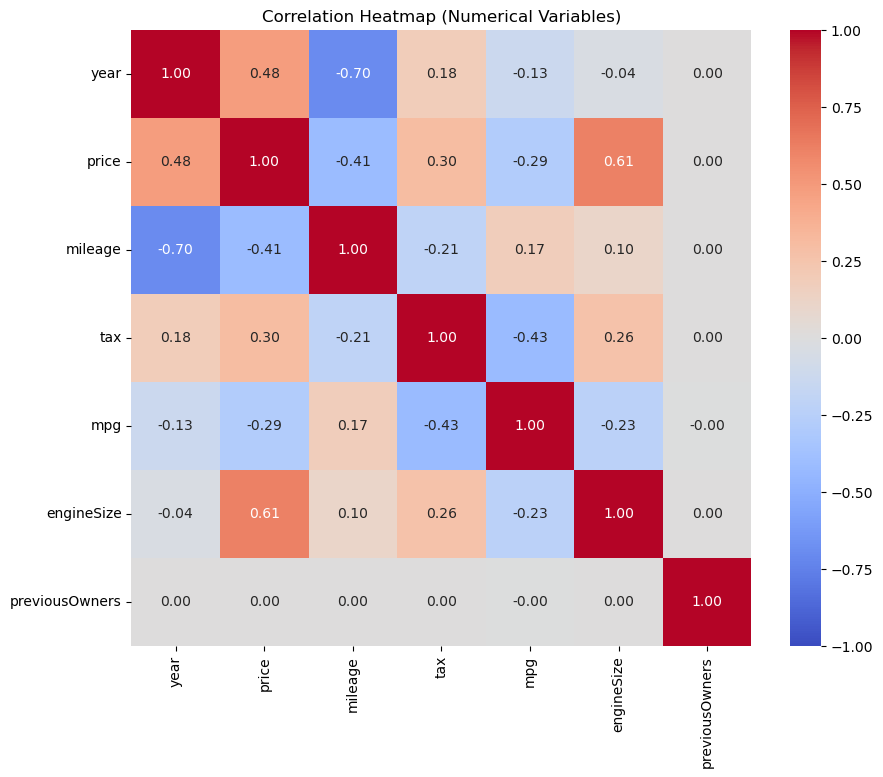

In [61]:
# Correlation heatmap of Numeric Variables

# Selects only numeric columns and drop rows fully NaN on those cols
num_df = cars_train.select_dtypes(include=[np.number]).copy()

plt.figure(figsize=(10, 8))
sns.heatmap(num_df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Variables)')
plt.show()

The correlation matrix reinforces the patterns previously observed in the visual exploration and provides a concise summary of the linear relationships between numerical variables.

As shown in the previousscatterplots, the target variable, price, shows a strong positive correlation with engineSize (0.61) and a moderate positive correlation with year (0.48), indicating that newer cars and vehicles with larger engines tend to be more expensive. On the other hand, price is negatively correlated with mileage (–0.41) and mpg (–0.29), reflecting depreciation due to usage and the typical association between fuel efficiency and lower-priced, smaller vehicles.

A strong negative correlation between mileage and year (–0.70) confirms that newer cars generally have fewer kilometers, highlighting the strong relationship between these two variables. This suggests potential multicollinearity if both are used directly in linear models, motivating the transformation of year into an age-based variable and the explicit modelling of mileage-related depreciation in later steps.

The tax variable shows moderate correlations with both engineSize and price, suggesting that taxation is partially driven by engine characteristics and indirectly linked to vehicle value.

Finally, previousOwners exhibits near-zero correlation with all variables, indicating that its relationship with price is likely non-linear or context-dependent and should not be discarded solely based on linear correlation.

Overall, this analysis confirms that age (or year), mileage, and engineSize are the primary numerical drivers of price, while also guiding the next preprocessing steps:

- transforming highly correlated variables to reduce multicollinearity,

- engineering depreciation-related features,

- and relying on feature selection methods rather than correlation alone to assess weaker predictors.


<a class="anchor" id="152-categorical-variables">

### 1.5.2 Categorical Variables
    
</a>

C:\Users\ritan\AppData\Local\Temp\ipykernel_33840\3033992020.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=cars_train, ax=axes[i], palette='Blues')
C:\Users\ritan\AppData\Local\Temp\ipykernel_33840\3033992020.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=cars_train, ax=axes[i], palette='Blues')
C:\Users\ritan\AppData\Local\Temp\ipykernel_33840\3033992020.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=cars_train, order=order, ax=axes[i], palette='Blues')
C:\Users\ritan\AppData\Loca

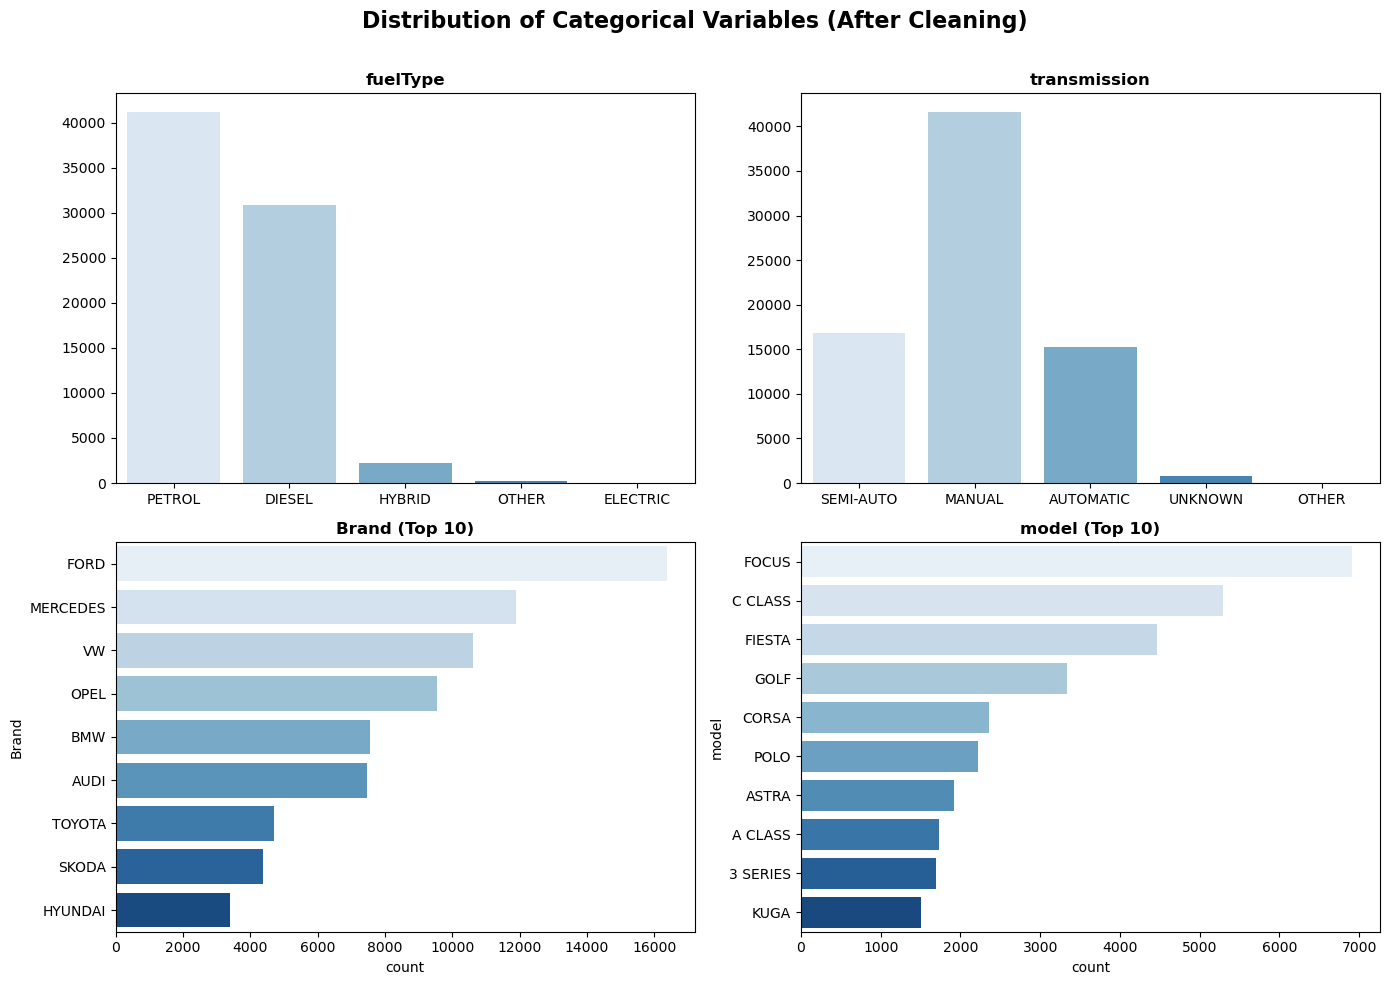

In [62]:
# Barplots of Categorical Variables

# Cleaned categorical variables
cat_cols2 = ['fuelType', 'transmission', 'Brand', 'model']

# Creates a  2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols2):
    if col == 'Brand':
        # Top 10 brands
        order = cars_train[col].value_counts().index[:10]
        sns.countplot(y=col, data=cars_train, order=order, ax=axes[i], palette='Blues')
        axes[i].set_title(f'{col} (Top 10)', fontsize=12, fontweight='bold')

    elif col == 'model':
        # Top 10 models
        order = cars_train[col].value_counts().index[:10]
        sns.countplot(y=col, data=cars_train, order=order, ax=axes[i], palette='Blues')
        axes[i].set_title(f'{col} (Top 10)', fontsize=12, fontweight='bold')

    else:
        sns.countplot(x=col, data=cars_train, ax=axes[i], palette='Blues')
        axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

plt.suptitle('Distribution of Categorical Variables (After Cleaning)', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

The distributions of the cleaned categorical variables confirm that the text normalization and correction procedures were effective, resulting in consistent and interpretable categories.

The fuelType variable is now cleanly grouped under standardized labels (Petrol, Diesel, Hybrid, Electric, and Other), with Petrol and Diesel clearly dominating the dataset. This reflects realistic market proportions and ensures that fuel-related effects can be captured without noise from misspellings or fragmented categories.

The transmission variable shows a clear structure, with Manual vehicles being the most common, followed by Automatic and Semi-Automatic. The presence of a small “UNKNOWN” category is expected and intentionally preserved, allowing the model to learn whether missing transmission information carries predictive value instead of discarding those observations.

The Brand distribution (Top 10) shows a realistic market composition, with Ford, Mercedes, Volkswagen, Opel, and BMW appearing most frequently. This balance across multiple brands supports the use of brand-based feature engineering without being dominated by a single manufacturer.

The model variable displays high cardinality, as expected, but the top 10 models (such as Focus, C Class, Fiesta, and Golf) represent a substantial share of the dataset. This confirms that model-level information is meaningful but also highlights the need for aggregation or smoothing techniques when using Brand–Model combinations.

Actionable next steps:

- High-cardinality categorical variables (especially model) will be handled using feature engineering and encoding strategies rather than naïve one-hot encoding alone.

- Brand and model information will be combined into derived features (e.g. Brand–Model averages and depreciation rates) to capture market structure while avoiding overfitting.

- All categorical variables will be encoded consistently using transformations learned on the training set only, ensuring no data leakage.

Overall, these plots confirm that categorical inconsistencies have been resolved and that the dataset is now well-prepared for feature engineering, encoding, and subsequent modelling stages.

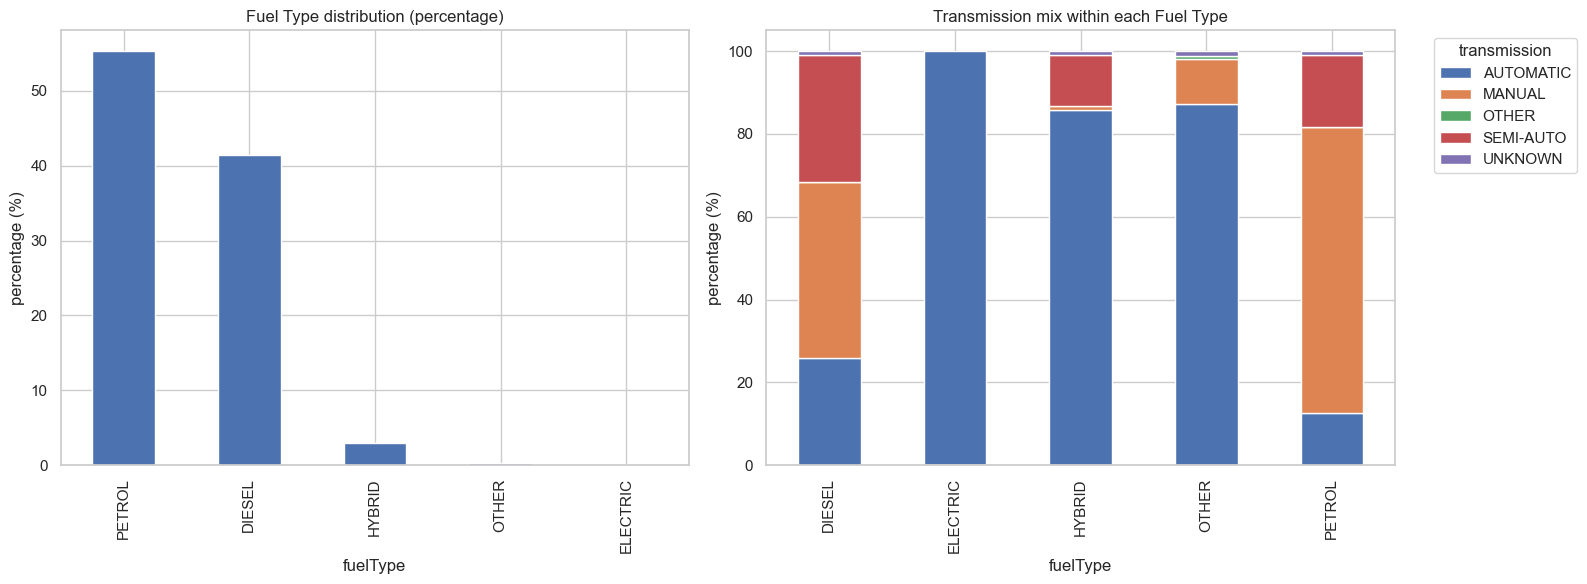

In [63]:
# Barplots of Fuel Type percentage and Transmission mix within each Fuel Type

sns.set(style="whitegrid")

# Percentage distribution of fuelType
fuel_counts = (
    cars_train["fuelType"]
    .value_counts(normalize=True)
    .sort_values(ascending=False)
    * 100
)

# Crosstab fuelType x transmission (row-wise percentages)
fuel_trans_counts = pd.crosstab(
    cars_train["fuelType"],
    cars_train["transmission"]
)

fuel_trans_pct = fuel_trans_counts.div(
    fuel_trans_counts.sum(axis=1),
    axis=0
) * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: fuelType percentage barplot 
fuel_counts.plot(kind="bar", ax=axes[0])
axes[0].set_title("Fuel Type distribution (percentage)")
axes[0].set_xlabel("fuelType")
axes[0].set_ylabel("percentage (%)")

# Right: stacked bar fuelType x transmission 
fuel_trans_pct.plot(
    kind="bar",
    stacked=True,
    ax=axes[1]
)
axes[1].set_title("Transmission mix within each Fuel Type")
axes[1].set_xlabel("fuelType")
axes[1].set_ylabel("percentage (%)")
axes[1].legend(title="transmission", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


The left-hand plot shows the percentage distribution of fuel types in the dataset. As expected, the sample is heavily dominated by Petrol and Diesel vehicles, which together account for the vast majority of observations. Petrol cars represent slightly more than half of the dataset, while Diesel vehicles account for roughly 40%. Hybrid, Electric and Other fuel types are present but remain marginal, reflecting their smaller market share in the period covered by the data.

The stacked bar chart on the right illustrates the transmission mix within each fuel type, revealing clear and interpretable patterns. Petrol and Diesel vehicles are predominantly Manual, although Automatic and Semi-Automatic transmissions still represent a relevant proportion. In contrast, Hybrid and Electric vehicles are almost exclusively associated with Automatic or Semi-Automatic transmissions, which is consistent with the underlying drivetrain technologies of these vehicles.

Overall, these plots confirm that fuel type and transmission are strongly related, and that both variables contain meaningful structural information rather than noise.

Actionable preprocessing decisions:

- Since both fuelType and transmission have a limited number of well-defined categories, no category merging is required.

- All observed categories (including labels such as UNKNOWN or OTHER) will be kept, as they may carry predictive information about missing or unspecified vehicle characteristics.

- In the preprocessing stage, fuelType, transmission, and Brand will be encoded using One-Hot Encoding, allowing the models to learn systematic price differences across categories without imposing any artificial ordering.

These steps ensure that categorical relationships observed in the exploratory analysis are preserved and appropriately represented in the modelling phase.


<a class="anchor" id="153-multivariate-analysis">

### 1.5.3 Multivariate Analysis
    
</a>

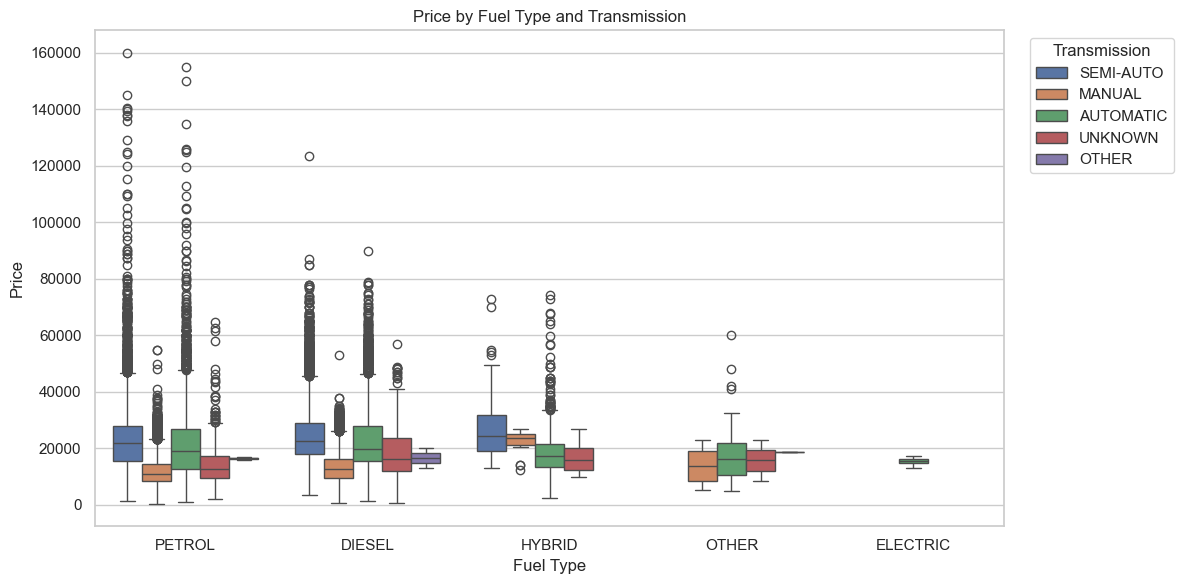

In [64]:
# Boxplots of Price By Fuel Type and Transmission

plt.figure(figsize=(12, 6))
sns.boxplot(data=cars_train, x='fuelType', y='price', hue='transmission')
plt.title('Price by Fuel Type and Transmission')
plt.xlabel('Fuel Type'); plt.ylabel('Price')
plt.legend(title='Transmission', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

The boxplots illustrate how car prices vary jointly by fuel type and transmission, highlighting clear and economically meaningful patterns.

Across almost all fuel types, vehicles with Automatic or Semi-Automatic transmissions tend to have higher median prices than Manual cars, which is consistent with the fact that automatic gearboxes are usually associated with higher-end trims or more recent models.

Petrol and Diesel vehicles dominate the dataset, showing wide price distributions and a large number of high-end outliers. This reflects the heterogeneity of these categories, which include everything from entry-level cars to premium models.

Hybrid vehicles, although fewer in number, tend to exhibit higher median prices and slightly more compact distributions, suggesting a more homogeneous market segment.
Electric vehicles appear in very small numbers, but with relatively high and concentrated prices, which is expected given their typically higher base cost and more recent production years.

While there is some overlap between transmission types within each fuel category, the general price ranking (Automatic / Semi-Auto > Manual) remains consistent, indicating a stable interaction effect between fuel type and transmission.

Actionable modelling decisions:

- Both fuelType and transmission will be retained as predictive features, as they show clear and consistent associations with price.

- No category merging will be applied, since even smaller groups (for example Hybrid or Electric) represent meaningful market segments rather than noise.

- These variables will be encoded using One-Hot Encoding, allowing the model to capture interaction effects without imposing artificial ordinal relationships.

This multivariate analysis confirms that fuel type and transmission jointly influence car prices and should be explicitly represented in the feature set.


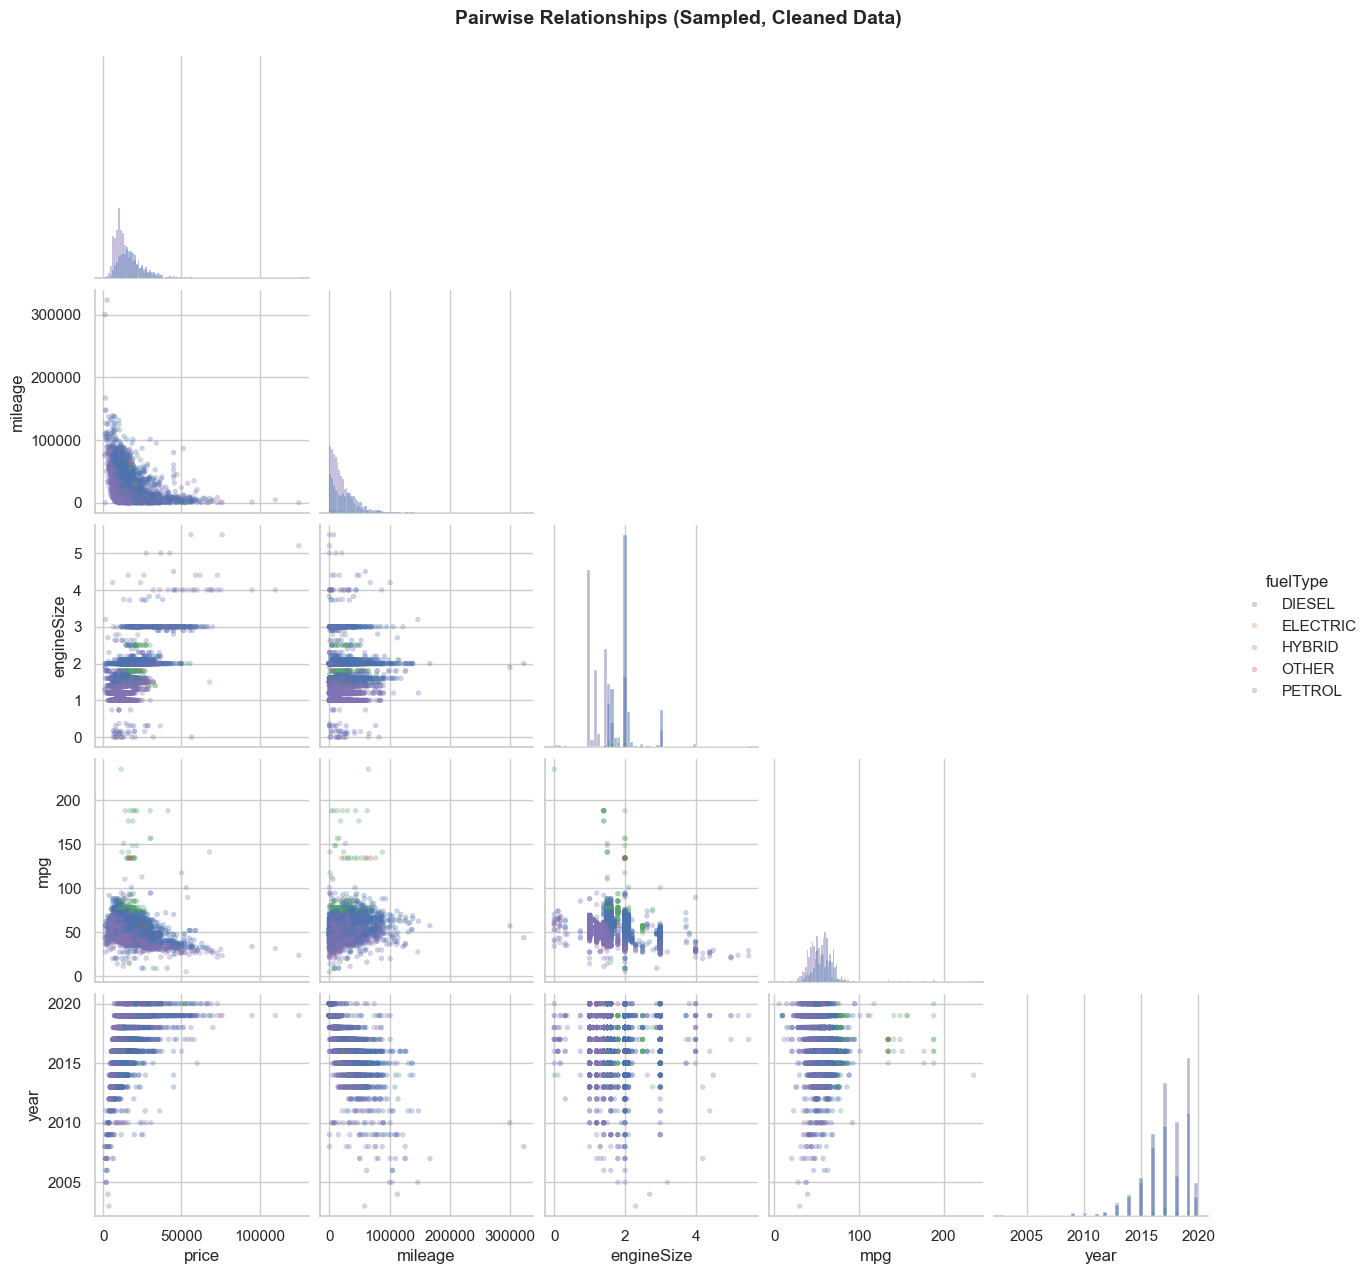

In [65]:
# Pairplots between the main numeric variables

# Ensure numeric types and clean infinite values
for c in ['price', 'mileage', 'engineSize', 'mpg', 'year']:
    cars_train[c] = pd.to_numeric(cars_train[c], errors='coerce')

cars_train = cars_train.replace([np.inf, -np.inf], np.nan)

# Ensure fuelType is categorical (for hue)
if cars_train['fuelType'].dtype != 'category':
    cars_train['fuelType'] = cars_train['fuelType'].astype('category')

# Drop rows with missing key values
clean_data = cars_train.dropna(subset=['price', 'mileage', 'engineSize', 'mpg', 'year', 'fuelType'])

# Sample up to 5000 rows for readability
sample_data = clean_data.sample(min(5000, len(clean_data)), random_state=29)

# Define variables for the pairplot
pp_vars = ['price', 'mileage', 'engineSize', 'mpg', 'year']

# Plot pairplot (histogram on diagonal instead of KDE to avoid sqrt bug)
sns.pairplot(
    data=sample_data,
    vars=pp_vars,
    hue='fuelType',
    corner=True,
    diag_kind='hist',  # safer than 'kde'
    plot_kws={'alpha': 0.3, 's': 12, 'edgecolor': None}
)

plt.suptitle('Pairwise Relationships (Sampled, Cleaned Data)', y=1.02, fontsize=14, fontweight='bold')
plt.show()


The pairplot provides an overview of the pairwise relationships between the main numerical variables, with observations color-coded by fuel type. For readability and to avoid overplotting, the visualization is based on a random sample of the cleaned dataset.

Several consistent patterns emerge across fuel categories:

- Mileage vs Price shows a clear and strong negative relationship for all fuel types, confirming mileage as one of the main drivers of depreciation regardless of the powertrain.

- Engine size vs Price presents a positive association, with visible clustering by fuel type. Diesel vehicles tend to concentrate at larger engine sizes, while petrol cars dominate the lower and mid-range segments.

- Year vs Price exhibits a strong positive relationship, while Year vs Mileage shows a clear negative trend, reinforcing the expected link between vehicle age, usage, and value.

- MPG is inversely related to engine size and price, reflecting the trade-off between performance and fuel efficiency.

The diagonal histograms confirm the market dominance of Petrol and Diesel vehicles, while Hybrid and Electric cars appear as smaller but distinct clusters, typically associated with newer production years and different engine-size patterns.

Actionable modelling decisions:

- These visual relationships justify keeping mileage, year, engineSize, and mpg as core numerical predictors.

- The clear segmentation by fuelType motivates its explicit inclusion as a categorical feature in the model.

- Non-linear effects and interactions (for example, mileage × fuel type or engine size × year) are likely present and will be captured later through feature engineering and non-linear models, rather than further manual transformations at this stage.

Overall, the pairplot confirms that the cleaning steps preserved meaningful structure in the data and that the main numerical variables exhibit stable, interpretable relationships with price across fuel types.


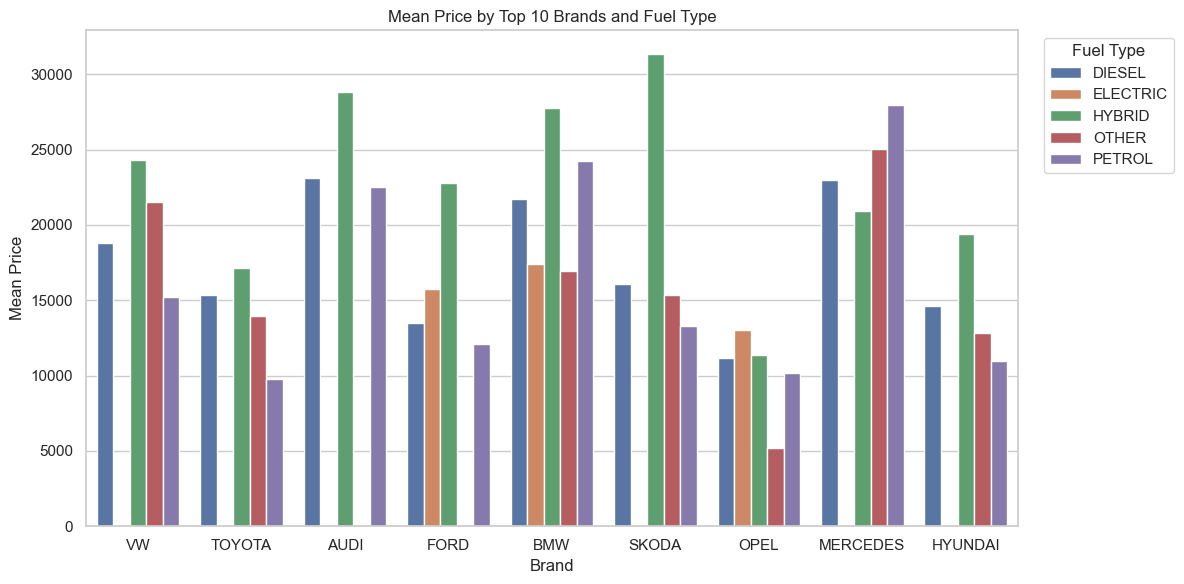

In [66]:
# Barplots of Mean Price By Brand (Top 10) and Fuel Type

top_n = 10
top_brands = cars_train['Brand'].value_counts().index[:top_n]
dfb = cars_train[cars_train['Brand'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.barplot(data=dfb, x='Brand', y='price', hue='fuelType', estimator='mean', errorbar=None)
plt.title('Mean Price by Top 10 Brands and Fuel Type')
plt.xlabel('Brand'); plt.ylabel('Mean Price')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

This grouped bar chart compares the mean car price across the top 10 most frequent brands, broken down by fuel type, allowing us to jointly assess brand positioning and technological differentiation.

Several clear patterns emerge:

- Premium brands such as Mercedes, BMW, and Audi consistently exhibit higher average prices across all fuel types, confirming the strong brand-level effect on pricing.

- Hybrid and electric vehicles tend to have higher mean prices within the same brand, reflecting newer technology, higher production costs, and more recent model years.

- Mass-market brands like Ford, Opel, Toyota, and Hyundai occupy the lower price range, even when offering alternative fuel types, which is consistent with their market positioning.

- Although fuel type introduces variability within each brand, the relative price ranking between brands remains stable, suggesting that brand identity dominates fuel effects.

It is important to note that these are raw mean prices, which are influenced by differences in mileage, age, and model mix within each brand–fuel combination.

Actionable modelling decisions:

- These patterns justify explicitly including Brand and fuelType as separate categorical predictors.

- The stability of price differences across fuels motivates the creation of interaction-aware features, such as brand–fuel or brand–model aggregates, later implemented through engineered variables (e.g. brand–model average price).

- Since mean prices may be inflated by newer or low-mileage vehicles, subsequent modelling steps will rely on controlled features (age, mileage, depreciation effects) rather than raw averages.

Overall, this visualization confirms that brand and fuel type jointly explain a substantial portion of price variability, providing strong motivation for their inclusion in both feature engineering and model specification.

<a class="anchor" id="154-additional-multivariate-price-analysis">

### 1.5.4 Additional multivariate price analysis
    
</a>

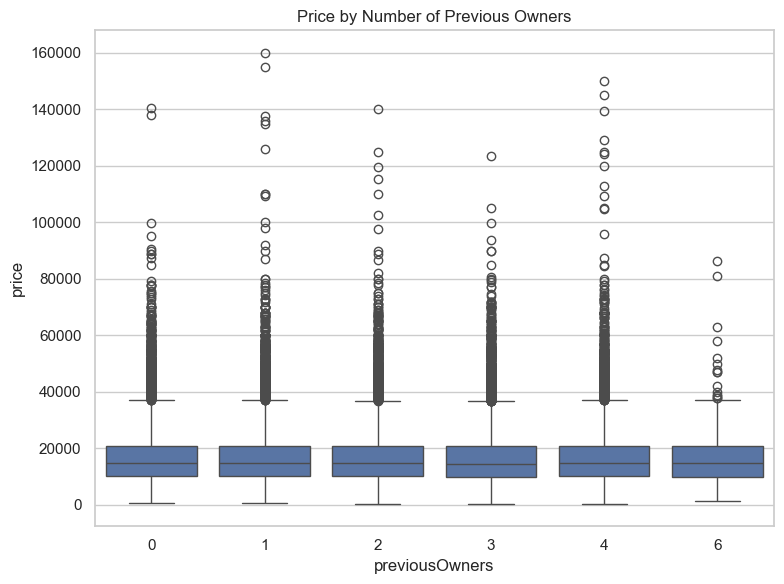

In [67]:
# Boxplots of Price By Number of Previous Owners

plt.figure(figsize=(8, 6))

# Treat previousOwners as categorical just for plotting
sns.boxplot(
    data=cars_train,
    x=cars_train["previousOwners"].astype("category"),
    y="price"
)

plt.title("Price by Number of Previous Owners")
plt.xlabel("previousOwners")
plt.ylabel("price")
plt.tight_layout()
plt.show()

he boxplot compares the distribution of car prices across different values of previousOwners (ranging from 0 to 6).

Overall, the median prices and interquartile ranges are very similar across all groups, and the dispersion of prices, including high-end outliers, does not change substantially with the number of previous owners. There is no clear monotonic relationship indicating that cars with more owners are systematically cheaper.

This suggests that previousOwners has a weak marginal effect on price when considered in isolation. Its impact is likely confounded with other variables, such as vehicle age, mileage, brand, and model, which are known to have a much stronger influence on pricing.

Actionable modelling decisions:

- We retain previousOwners as a numerical feature, since it contains valid information and does not introduce high dimensionality.

- The variable will be scaled together with other numerical features during preprocessing.

- Given its low standalone explanatory power, it might be treated as a secondary predictor, allowing the model to use it only when it adds incremental value in combination with other features.

- We will most likely not aggregate the values into broader categories (for example “3+ owners”), as the original range is already small (0–6) and binning would risk losing potentially useful information.

In summary, while previousOwners alone is not a strong price driver, keeping it in the model allows more flexible interactions with age, mileage, and brand-level effects to be captured.

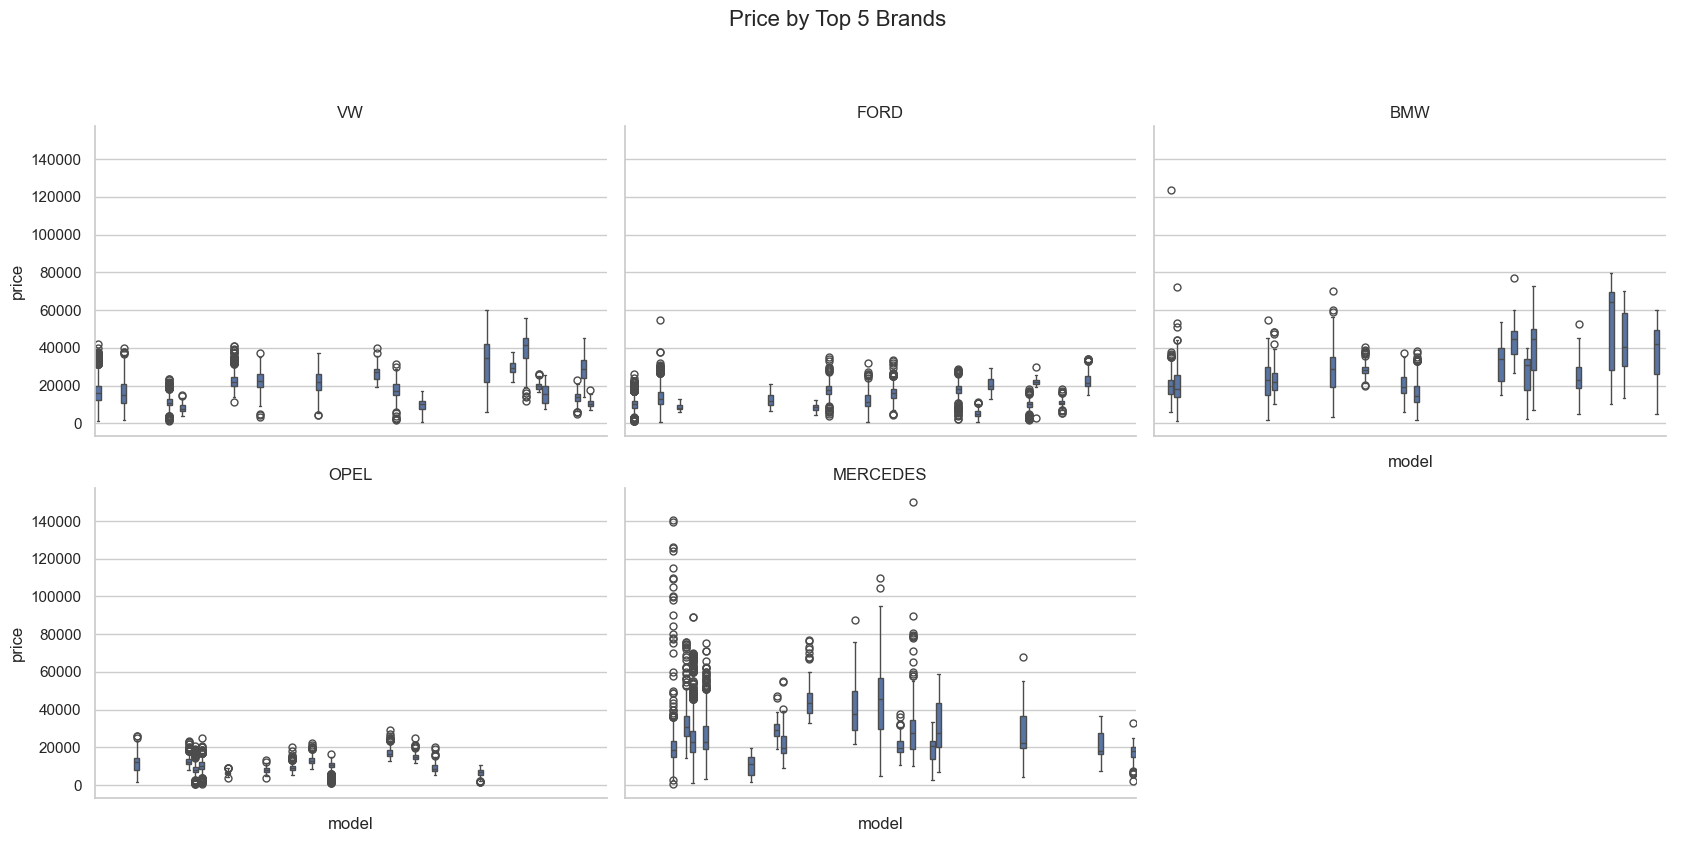

In [68]:
# Boxplots of Price by Brands (Top 5)

# Top 5 brands by count
top_brands = cars_train["Brand"].value_counts().nlargest(5).index

df_top = cars_train[cars_train["Brand"].isin(top_brands)].copy()

# Ccount how many rows each Brand–model combo has
df_top["brand_model_count"] = (
    df_top.groupby(["Brand", "model"])["model"].transform("size")
)

# Keep only models with at least 50 observations (adjust if needed)
df_top = df_top[df_top["brand_model_count"] >= 50]

g = sns.catplot(
    data=df_top,
    x="model",
    y="price",
    col="Brand",
    col_wrap=3,          # Number of plots per row
    kind="box",
    sharey=True,
    height=4,
    aspect=1.4
)

g.set_titles("{col_name}")
g.set_xticklabels(rotation=90)
g.set_axis_labels("model", "price")
g.fig.suptitle("Price by Top 5 Brands", fontsize=16, y=1.05)

plt.tight_layout()
plt.show()


For the top five brands (VW, Ford, BMW, Opel, and Mercedes), the boxplots reveal substantial price variation across models within the same brand. In particular, Mercedes and BMW exhibit a wide dispersion of prices, with a clear separation between entry-level and premium models, while Opel models are more tightly clustered within a lower price range.

This confirms that model provides additional information beyond brand, acting as a proxy for vehicle segment (for example city car, family car, premium), equipment level, and market positioning.

However, the variable model has very high cardinality (more than 200 unique categories), which makes One-Hot Encoding impractical. Applying OHE would substantially increase dimensionality and sparsity, increasing the risk of overfitting and reducing model interpretability.

Actionable modelling decision:

Instead of One-Hot Encoding, we will apply frequency encoding to the model variable (model_freq), replacing each model with its relative frequency in the training set. This approach:

- Controls dimensionality while preserving information about how common each model is in the market,

- Allows the model to distinguish between rare and popular models,

- Avoids excessive sparsity in the feature space.

It is important to note that frequency encoding does not directly encode price differences between models. Instead, it provides a compact representation that can interact with other features (brand, year, engine size, mileage) to capture model-level effects indirectly.

The strong within-brand price heterogeneity observed in these boxplots justifies keeping model information as a separate feature (via model_freq), rather than relying on brand alone, which would mask important segment-level differences.

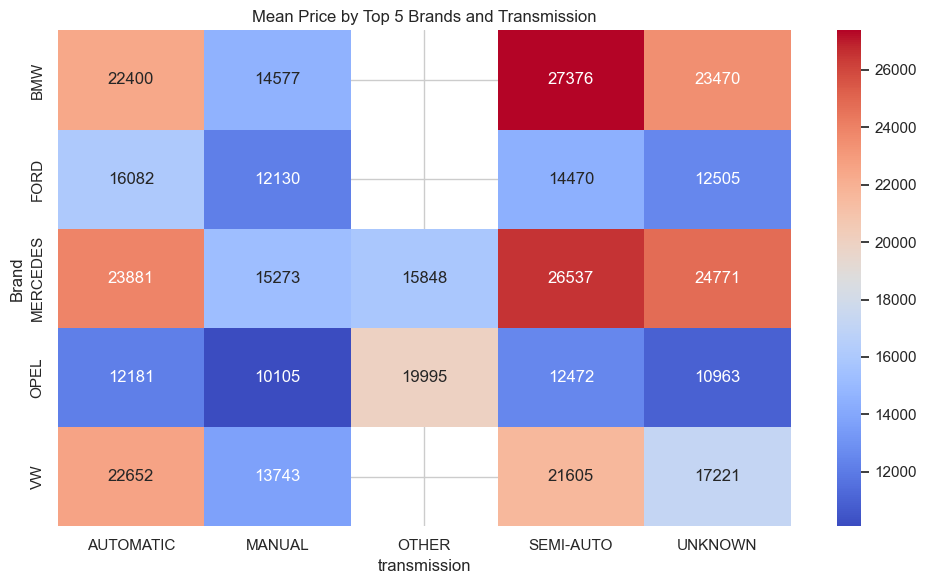

In [69]:
# Heatmap of Mean Price by Brand (Top 5) and Transmission
top_brands = cars_train["Brand"].value_counts().nlargest(5).index
df_top = cars_train[cars_train["Brand"].isin(top_brands)]

# Compute mean price per Brand x transmission
mean_price_bt = (
    df_top
    .groupby(["Brand", "transmission"])["price"]
    .mean()
    .unstack()   # Columns = transmission types
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    mean_price_bt,
    annot=True,
    fmt=".0f",
    cmap="coolwarm"
)


plt.title("Mean Price by Top 5 Brands and Transmission")
plt.xlabel("transmission")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()


The heatmap summarises the mean price for each Brand–Transmission combination among the top five brands. Several clear patterns emerge.

Across almost all brands, automatic and semi-automatic transmissions are associated with higher average prices than manual gearboxes. This is consistent with market expectations, as these transmissions are typically linked to higher trim levels, larger engines, or more recent vehicles.

Mercedes and BMW consistently occupy the highest price ranges, regardless of transmission type, reflecting their premium market positioning. In contrast, Opel and Ford remain in lower price bands, even when equipped with automatic or semi-automatic transmissions, highlighting that brand effects dominate over transmission effects in absolute price levels.

Transmission categories such as UNKNOWN or OTHER tend to fall between manual and automatic in terms of mean price. This suggests that these labels likely aggregate heterogeneous cases (e.g. incomplete information or less common gearbox types) rather than representing a distinct, well-defined segment.

Actionable modelling decision:

- Given these results, both Brand and transmission clearly carry independent price information and should be retained as separate predictors. Since both variables have a limited and manageable number of categories, they will be encoded using One-Hot Encoding, with one reference category dropped to avoid multicollinearity.

- This encoding strategy allows the model to learn systematic price premiums associated with specific brands and transmission types, while keeping the feature space interpretable and well-controlled.

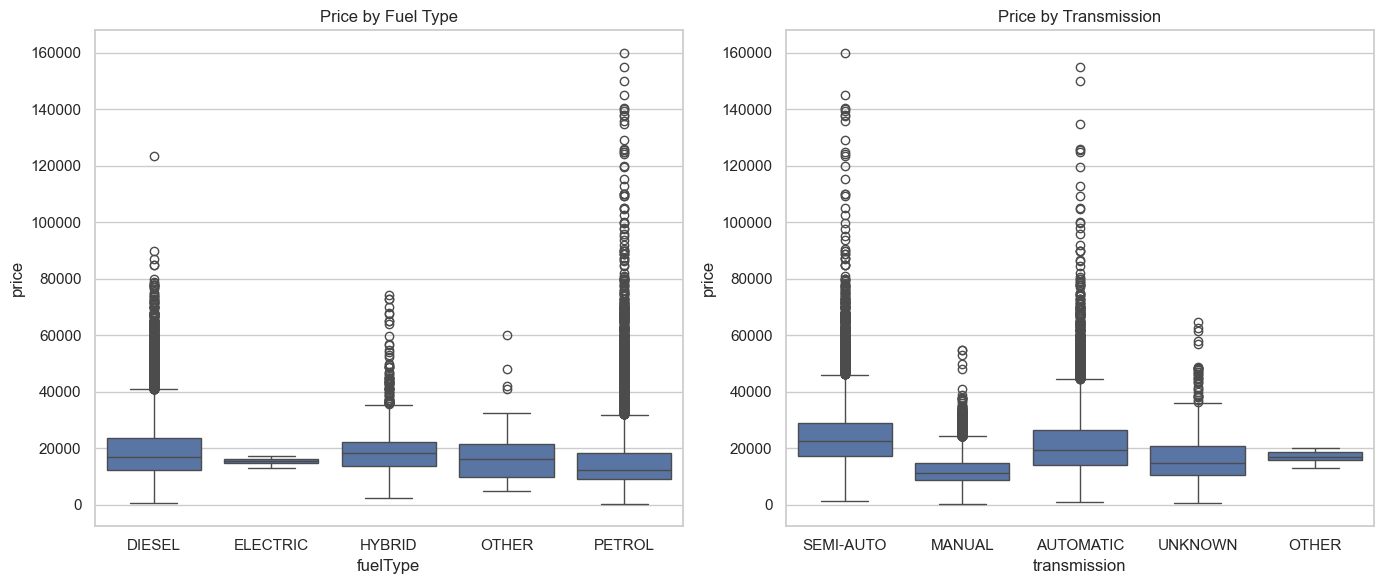

In [70]:
# Boxplots of Price by fuelType and Price by transmission 

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Price by fuelType 
sns.boxplot(
    data=cars_train,
    x="fuelType",
    y="price",
    ax=axes[0],
    showfliers=True  
)
axes[0].set_title("Price by Fuel Type")
axes[0].set_xlabel("fuelType")
axes[0].set_ylabel("price")

# Price by transmission 
sns.boxplot(
    data=cars_train,
    x="transmission",
    y="price",
    ax=axes[1],
    showfliers=True
)
axes[1].set_title("Price by Transmission")
axes[1].set_xlabel("transmission")
axes[1].set_ylabel("price")

plt.tight_layout()
plt.show()

The boxplots illustrate how price distributions differ across fuel types and transmission types, highlighting systematic market patterns.

Fuel type: Electric and hybrid vehicles tend to have higher median prices than petrol and diesel cars, reflecting newer technology and higher production costs, even though they are less frequent in the dataset. Petrol and diesel vehicles show wider spreads and more extreme high-end outliers, consistent with their dominance across multiple market segments. Categories such as OTHER and NAN sit in intermediate ranges, indicating that they group heterogeneous cases rather than pure noise.

Transmission: Automatic and semi-automatic vehicles clearly exhibit higher median prices and wider upper tails compared to manual cars, which are more concentrated in lower and mid-price ranges. This confirms that transmission type captures differences in comfort level, trim, and vehicle positioning.

Actionable modelling decisions.
Both fuelType and transmission will be kept as key categorical predictors, as they show clear and consistent price separation. They will be encoded using One-Hot Encoding, allowing the model to learn transmission- and fuel-specific price premiums without imposing any ordinal structure.

We deliberately preserve the categories OTHER, UNKNOWN and NAN as valid levels, rather than collapsing them, since the boxplots indicate that they carry distinct price information and may capture systematic differences related to incomplete or uncommon specifications.

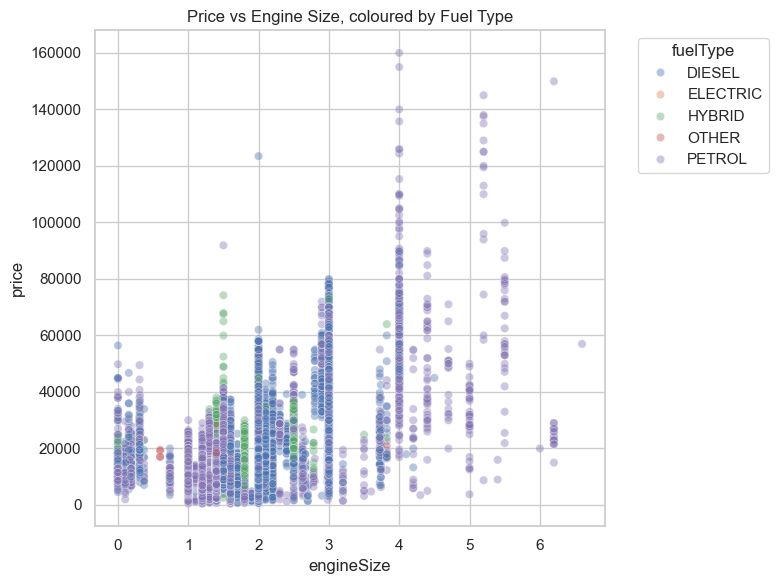

In [71]:
# Scatterplot of Price vs Engine Size

plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=cars_train,
    x="engineSize",
    y="price",
    hue="fuelType",
    alpha=0.4
)

plt.title("Price vs Engine Size, coloured by Fuel Type")
plt.xlabel("engineSize")
plt.ylabel("price")
plt.legend(title="fuelType", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

This scatterplot highlights a clear positive relationship between engine size and price: vehicles with larger engines generally command higher prices. This trend is further structured by fuel type.

Petrol vehicles span the widest range of engine sizes and prices, covering both entry-level cars and high-performance models. They dominate the upper-right region of the plot, where large engines and very high prices coexist.

Diesel vehicles are more concentrated around small to medium engine sizes and tend to occupy lower price ranges than petrol cars with similar engine capacities, reflecting their typical positioning as efficient, mass-market options.

Hybrid and electric vehicles cluster at smaller engine sizes (or equivalent capacity), yet maintain relatively high prices. This confirms the presence of a technology premium, where price is driven less by engine displacement and more by drivetrain innovation.

Actionable preprocessing decisions.

- engineSize is retained as a numerical feature and will be scaled using Min–Max scaling together with the other numeric variables.

- Fuel-specific differences are captured through One-Hot Encoding of fuelType, allowing the model to learn price premiums associated with different technologies without imposing manual interaction terms.

- Extremely large engine sizes are flagged for inspection during outlier treatment; however, values that correspond to realistic high-performance vehicles are retained to preserve genuine market variability.

In [72]:
# Revert fuelType back to object after EDA
cars_train['fuelType'] = cars_train['fuelType'].astype('object')


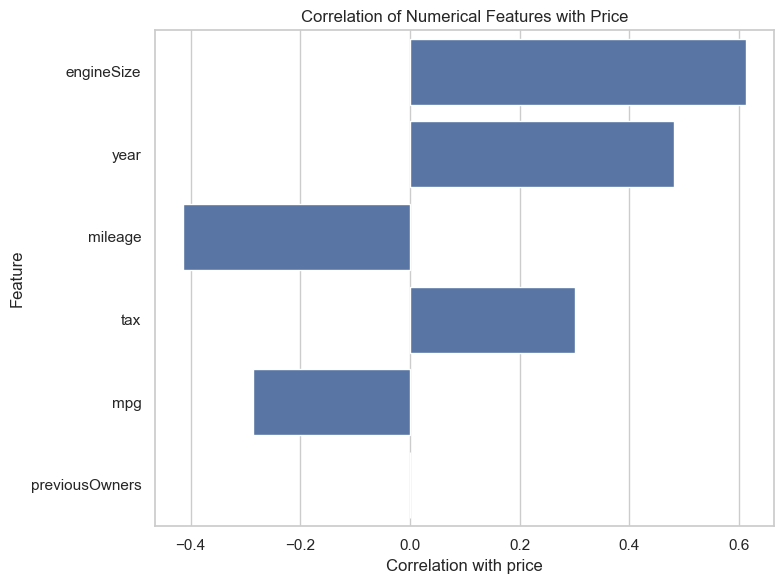

In [73]:
# Select numeric columns
numeric_cols = cars_train.select_dtypes(include=["number"]).columns

# Columns we don't want in the correlation
cols_to_exclude = ["carID"]
if "hasDamage" in numeric_cols:
    cols_to_exclude.append("hasDamage")

numeric_cols = [c for c in numeric_cols if c not in cols_to_exclude]

# Compute correlations with price
corr_with_price = (
    cars_train[numeric_cols]
    .corr()["price"]
    .drop("price")
)

# Sort by absolute correlation, descending
corr_sorted = corr_with_price.reindex(
    corr_with_price.abs().sort_values(ascending=False).index
)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=corr_sorted.values,
    y=corr_sorted.index,
    orient="h"
)
plt.title("Correlation of Numerical Features with Price")
plt.xlabel("Correlation with price")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


The barplot ranks the Pearson correlations between numerical features and price, providing a linear view of their individual relationships with the target.

- engineSize shows the strongest positive correlation with price (≈ 0.6), confirming it as a major price driver and reinforcing the patterns observed in the scatterplots.

- year also presents a clear positive correlation, indicating that newer vehicles tend to be more expensive, as expected.

- mileage and mpg are negatively correlated with price. Higher mileage reflects stronger depreciation, while higher mpg is typically associated with smaller, less powerful engines and lower-priced vehicles.

- tax exhibits a moderate positive correlation, suggesting partial alignment between taxation, engine capacity, and vehicle price segments.

- previousOwners shows a correlation close to zero, consistent with earlier visual analyses indicating a weak marginal relationship with price.

Actionable modelling decisions.

- These correlations are used as an initial linear importance ranking, serving as exploratory guidance rather than a strict selection rule.

- All numerical features, including those with weaker correlations (e.g. previousOwners), are retained for modelling, allowing algorithms to learn potential non-linear or interaction effects.

- Regularised linear models (Lasso, Elastic Net) are expected to naturally down-weight or discard low-informative features during training.

- All numerical variables will be scaled using Min–Max scaling prior to modelling to ensure comparability across features and avoid scale-induced bias in distance and regularisation-sensitive algorithms.


<div class="alert alert-block alert-success">

<a class="anchor" id="2-train--validation-split">    </a>
## 2. Train/validation split
    

    
</div>

Now that the dataset is clean and consistent we will proceed with model development. To evaluate our models in a reliable and unbiased way, we decided to use the hold-out validation method. This approach consists of splitting the available data into two disjoint subsets: one used for training the model and another reserved exclusively for validation.

The training set is used to learn the model parameters and capture patterns in the data, while the validation set acts as an unseen hold-out sample that allows us to assess how well the trained model generalizes to new data. We chose the hold-out method because it is simple, computationally efficient, and well-suited for large datasets, providing a clear separation between model fitting and evaluation.

In [74]:
# Define the independent variable as X and the dependent variable as Y
X = cars_train.drop('price', axis=1)
y = cars_train['price']


We split the data into 70% for training and 30% for validation, ensuring that the model has access to a large enough sample to learn meaningful relationships, while still keeping a substantial validation set for performance assessment. A fixed random seed (random_state = 29) is used to guarantee reproducibility of the results.

In [75]:
# Split data into training (70%) and validation (30%)
X_train, X_val, y_train, y_val = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=29,   
    shuffle=True
)

# Check resulting shapes
print(f"Training set: {X_train.shape[0]} rows")
print(f"Validation set: {X_val.shape[0]} rows")

Training set: 53178 rows
Validation set: 22791 rows


From this point forward, all preprocessing (missing value and outlier treatment, scaling, encoding, etc.) will be done only on the training set, and later applied consistently to the validation and test sets to avoid any data leakage.


<div class="alert alert-block alert-success">

<a class="anchor" id="3-pre-processing-and-feature-engineering">    </a>
## 3. Pre-processing and feature engineering
    

    
</div>

<a class="anchor" id="31-treating-missing-values">

### 3.1. Treating Missing Values
    
</a>

After the data cleaning stage, we re-evaluated the presence of missing values in the training set. As shown below, several variables still contain missing observations, affecting both categorical and numerical features.

In [76]:
# Checking again the missing values for each variable
X_train.isna().sum()

Brand               30
model             1054
year              1042
transmission      1042
mileage           1037
fuelType          1045
tax               5519
mpg               5530
engineSize        1056
previousOwners    1072
dtype: int64

To handle these missing entries, we applied different strategies depending on the type of variable, always ensuring that all imputations were based only on information from the training set, to prevent data leakage.

- ***Categorical variables*** ("Brand", "model", "transmission" and "fuelType") will be filled with the label “Unknown”, as we can't safely infer their values without introducing bias.
This approach avoids dropping rows and allows the model to recognize that certain information was missing, while treating "UNKNOWN" as a valid and informative category.
All categorical values were also converted to uppercase to ensure consistency in text formatting (ex: avoiding “ford” vs “FORD”).

- ***Numerical variables*** ("year", "mileage", "tax", "mpg", "previousOwners"):
Instead of filling the missing numerical values with a single global median, we adopted a more context-aware strategy.
For each variable, the imputation method was chosen based on logical relationships observed in the data:

    - year : Missing values were filled using the median year of cars with the same Brand–Model combination. If no median was available for that combination, the global median of year was used.

    - mileage : Missing values were replaced with the median mileage of cars sharing the same production year, since cars from the same year tend to have similar usage levels.

    - tax, and previousOwners : These were filled using their global median values, as no strong relationship with other variables was identified that could improve the imputation.

    - mpg (fuel efficiency) : The missing values were filled using the median mpg for cars with the same Brand–Model, since vehicles from the same brand and model generally have comparable fuel efficiency.

    - engineSize : This variable is highly dependent on the car’s Brand and Model. Therefore, missing values were replaced using the median engineSize for that Brand–Model combination. If that information was not available, the global median of engineSize from the training data was used instead.

Also, to ensure that exactly the same imputation logic and values were applied to the training, validation, and test sets, we encapsulated the numerical imputation process in a dedicated function (impute_numeric).

In addition, all the statistics required for imputation (such as medians by Brand–Model or global medians) were computed once on the training set only and stored in a structured dictionary (stats). This dictionary acts as a reference that is reused unchanged when imputing missing values in the validation and test sets.

This design guarantees that no information from validation or test data is used during training and that the same missing value in different datasets is imputed in a consistent and reproducible way.

In [77]:
# Separate numerical and categorical columns
num_vars = ["year", "mileage", "tax", "mpg", "engineSize", "previousOwners"]
cat_vars = ["Brand", "model", "transmission", "fuelType"]

# Standardize categorical columns (train + val)
for col in cat_vars:
    X_train[col] = X_train[col].fillna("Unknown").astype(str).str.strip().str.upper()
    X_val[col]   = X_val[col].fillna("Unknown").astype(str).str.strip().str.upper()

# Fit imputation statistics on train only (before numeric imputation)
X_train_ref = X_train.copy()

stats = {
    "year_by_bm": X_train_ref.groupby(["Brand", "model"])["year"].median(),
    "miles_perYear": X_train_ref.groupby(["year"])["mileage"].median(),
    "tax_median": X_train_ref["tax"].median(),
    "mpg_by_bm": X_train_ref.groupby(["Brand", "model"])["mpg"].median(),
    "prevOwn_median": X_train_ref["previousOwners"].median(),
    "engineSize_by_bm": X_train_ref.groupby(["Brand", "model"])["engineSize"].median(),
    "year_global_median": X_train_ref["year"].median(),
    "mileage_global_median": X_train_ref["mileage"].median(),
    "mpg_global_median": X_train_ref["mpg"].median(),
    "engine_global_median": X_train_ref["engineSize"].median(),
}

# Apply the same train stats to train/val
X_train = impute_numeric(X_train, stats)
X_val   = impute_numeric(X_val, stats)

print("Missing values in training set:")
print(X_train.isna().sum())
print("\nMissing values in validation set:")
print(X_val.isna().sum())


Missing values in training set:
Brand             0
model             0
year              0
transmission      0
mileage           0
fuelType          0
tax               0
mpg               0
engineSize        0
previousOwners    0
dtype: int64

Missing values in validation set:
Brand             0
model             0
year              0
transmission      0
mileage           0
fuelType          0
tax               0
mpg               0
engineSize        0
previousOwners    0
dtype: int64


<a class="anchor" id="311-applying-test-dataset">

### 3.1.1. Applying To The Test Dataset
    
</a>

Finally, the same preprocessing steps were applied to the test dataset. Categorical variables were standardized and missing values were filled with "UNKNOWN", and the numerical imputation function was applied using the exact same statistics learned from the training data.

In [78]:
# Standardize categorical columns (test)
for col in cat_vars:
    X_test[col] = X_test[col].fillna("Unknown").astype(str).str.strip().str.upper()

# Apply the same train stats to test
X_test = impute_numeric(X_test, stats)

<a class="anchor" id="32-treating-outliers">

### 3.2. Treating Outliers
    
</a>

To visually inspect potential outliers, we plotted boxplots for all numerical variables in the dataset.
The visual representation of the IQR method shows the distribution of each variable, with the box representing the interquartile range (IQR) and the whiskers extending up to 1.5×IQR from the lower and upper quartiles. Points outside this range are considered potential outliers.

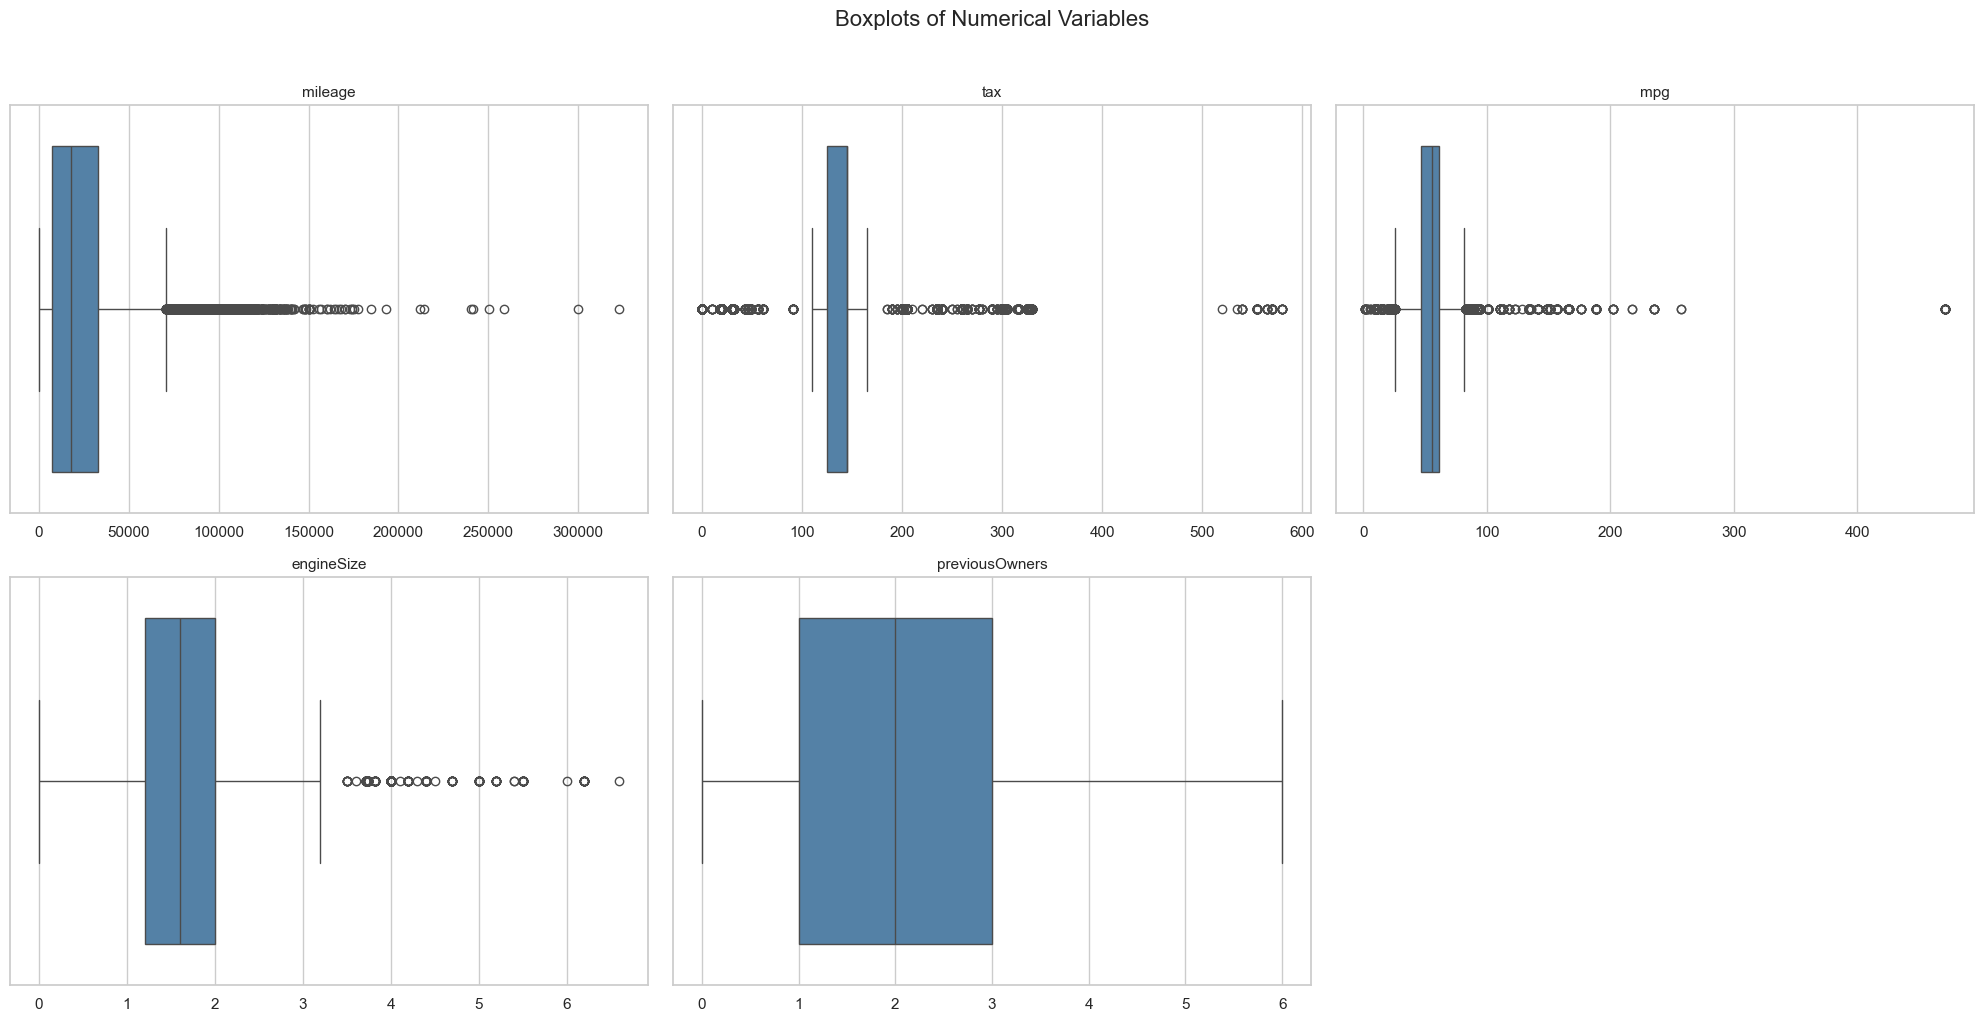

In [79]:
# Selects numeric variables
numeric_features = ['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners']

sns.set(style="whitegrid")

# Defines subplot grid
sp_cols = 3
sp_rows = ceil(len(numeric_features) / sp_cols)

# Prepares figure
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 10),
                         tight_layout=True)

# Plot each variable´s boxplot
for ax, feat in zip(axes.flatten(), numeric_features):
    sns.boxplot(x=X_train[feat], ax=ax, color='steelblue')
    ax.set_title(feat, fontsize=11)
    ax.set_xlabel("")

# Hide any empty subplots (if they exist)
for j in range(len(numeric_features), len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

# Add global title
plt.suptitle("Boxplots of Numerical Variables", fontsize=16, y=1.02)
plt.show()


After visually inspecting the boxplots, we observed several extreme values across multiple numerical features (example: price, mileage, tax, engineSize).
These values likely correspond to rare but legitimate cases, such as luxury or high-mileage cars, and therefore, removing them entirely could lead to unnecessary information loss.

To decrease their impact without discarding data, we decidedn to apply a winsorization (or capping) approach. This method replaces values outside predefined realistic limits with the corresponding lower or upper thresholds.
For instance, car prices above 100.000€ are capped at 100.000€, and engine sizes above 4.0L are capped at 4.0L.

This ensures that the dataset remains representative of the market, while preventing extreme observations from disproportionately influencing model training.

So, instead of using outlier treatment approaches that could remove important rows of the dataset, this capping approach retains all observations and is particularly suitable for real-world datasets where outliers are often genuine.

In [80]:
# Capping outliers (winsorization)
X_train_capped = X_train.copy()

# Defining realistic limits (based on the boxplots and context of the subject)
limits = {
    'mileage': (0, 250000),
    'tax': (0, 400),
    'mpg': (10, 120),
    'engineSize': (0.6, 4.0),
    'previousOwners': (0, 6)
}

# Applying limits
for col, (low, high) in limits.items():
    X_train_capped[col] = X_train_capped[col].clip(lower=low, upper=high)



In [81]:
# Comparing statistics before and after outlier treatment

# Before:
X_train[numeric_features].describe()

mileage           tax           mpg    engineSize  previousOwners
count   53178.000000  53178.000000  53178.000000  53178.000000         53178.0
mean    23434.954188    123.393432     55.520769      1.659618        2.008199
std     21592.749475     61.396200     15.736893      0.570343        1.418081
min         1.000000      0.000000      1.100000      0.000000             0.0
25%      7500.000000    125.000000     47.100000      1.200000             1.0
50%     17552.000000    145.000000     55.500000      1.600000             2.0
75%     32750.000000    145.000000     61.400000      2.000000             3.0
max    323000.000000    580.000000    470.800000      6.600000             6.0

In [82]:
# After:
X_train_capped[numeric_features].describe()

mileage           tax           mpg    engineSize  previousOwners
count   53178.000000  53178.000000  53178.000000  53178.000000         53178.0
mean    23432.459735    123.150662     55.218755      1.660383        2.008199
std     21563.110500     59.964594     12.352637      0.549953        1.418081
min         1.000000      0.000000     10.000000      0.600000             0.0
25%      7500.000000    125.000000     47.100000      1.200000             1.0
50%     17552.000000    145.000000     55.500000      1.600000             2.0
75%     32750.000000    145.000000     61.400000      2.000000             3.0
max    250000.000000    400.000000    120.000000      4.000000             6.0

We decided to compare the summary statistics before and after treating the outliers. 

As expected, the minimum and maximum values were adjusted to fall within realistic bounds, while the overall data distribution (mean, median, and quartiles) remained largely unchanged, confirming that the applied limits preserved the general structure of the dataset.

In [83]:
#Eensure the X_train contains the correct values
X_train = X_train_capped.copy()


Now, we need to do the same for the validation set:

In [84]:
X_val_capped  = X_val.copy()

# Applying to the validation set the same limits as the training set
for col, (low, high) in limits.items():
    X_val_capped[col]  = X_val_capped[col].clip(lower=low, upper=high)

In [85]:
X_val  = X_val_capped.copy()

<a class="anchor" id="321-applying-test-dataset">

### 3.2.1. Applying to the test dataset
    
</a>

In [86]:
# Now, we need to do the same for the test set:

X_test_capped = X_test.copy()

# Applying to the test set the same limits as the training set
for col, (low, high) in limits.items():
    X_test_capped[col] = X_test_capped[col].clip(lower=low, upper=high)

# Ensure X_test contains the capped values
X_test = X_test_capped.copy()


<a class="anchor" id="33-feature-engineering">

### 3.3. Feature Engineering
    
</a>

In this section, we wanted to improve our dataset by creating new variables that capture important relationships not directly represented in the original data.

We will focus on creating variables that have a clear logical connection to the car’s price, such as, its age, the average market value per brand and model, and the depreciation rate with mileage.
These features are designed to provide the model with more informative and interpretable inputs, allowing it to learn how different car characteristics affect their market value more accurately.

<a class="anchor" id="331-creating-variable-car_age">

### 3.3.1. Creating variable "car_age"
    
</a>

One of the main factors affecting a car’s price is its age, since older cars generally have lower market value, even when other features such as mileage or brand are similar. To capture this relationship, we created a new variable called 'car_age', which measures how old each car is.

Since the dataset includes vehicles listed up to 2020, we computed car age as:

car_age = 2020 − year

This feature helps the model learn how depreciation over time influences price, capturing patterns such as:

- newer cars tend to have higher prices,

- older cars, even with low mileage, usually sell for less.

In [87]:
# Calculate car age (in years) 
X_train['car_age'] = 2020 - X_train['year']
X_val['car_age']   = 2020 - X_val['year']

X_train['car_age'].describe()


count     53178.0
mean     2.917579
std      2.159474
min           0.0
25%           1.0
50%           3.0
75%           4.0
max          50.0
Name: car_age, dtype: Float64

In [88]:
X_train.head()

Brand     model  year transmission  mileage fuelType    tax   mpg  \
carID                                                                       
65357    OPEL      ADAM  2019       MANUAL     14.0   PETROL  145.0  44.8   
52662  TOYOTA     YARIS  2018    AUTOMATIC  13692.0   PETROL  150.0  60.1   
22854    FORD    FIESTA  2017       MANUAL  16919.0   PETROL    0.0  65.7   
14139     BMW  3 SERIES  2016    SEMI-AUTO  40417.0   DIESEL  125.0  60.1   
73616      VW    TIGUAN  2019       MANUAL   1959.0   DIESEL  150.0  47.9   

       engineSize  previousOwners  car_age  
carID                                       
65357         1.2               3        1  
52662         1.5               4        2  
22854         1.0               3        3  
14139         2.0               1        4  
73616         2.0               2        1



#### Applying to the test dataset


In [89]:
X_test['car_age'] = 2020 - X_test['year']

<a class="anchor" id="332-creating-variable-brand_model_avg_price">

### 3.3.2. Creating variable "brand_model_avg_price"
    
</a>

Different car brands and models naturally belong to different market segments and price ranges, for example, a BMW 5 Series will always be more expensive than a Ford Fiesta, even if both are the same age and mileage. To capture this relationship, we created the variable "brand_model_avg_price", which represents the average market price of each specific combination of "Brand" and "Model" in the dataset.

Because this feature is computed using the target variable (price), we built it using training data only (X_train + y_train) and then applied the resulting mapping unchanged to the validation set. This prevents any train–validation (or train–test) leakage.

Also, before building the mapping, missing values in Brand and model were filled with the label "UNKNOWN" and standardized. This guarantees that missing or previously unseen categories are handled consistently across datasets and that the feature can be computed for all observations.

To reduce the risk of overfitting, especially for rare Brand–Model combinations with few observations, we used a smoothed mean instead of a raw group average. Concretely, for each Brand–Model pair we compute its mean price and sample size, and then shrink that mean toward the global training mean using a smoothing parameter m. This makes estimates for small groups more stable and improves generalization, while still allowing frequent Brand–Model pairs to keep their specific average price signal.

For Brand–Model combinations that don't appear in the training data, the global mean price is used. This ensures that the feature is well-defined for all validation and test observations.

In [90]:
# Ensure missing categories are consistent before building the mapping
for df_ in [X_train, X_val]:
    df_["Brand"] = df_["Brand"].fillna("UNKNOWN").astype(str).str.upper().str.strip()
    df_["model"] = df_["model"].fillna("UNKNOWN").astype(str).str.upper().str.strip()

# Build mapping using train rows only 
train_tmp = X_train[["Brand", "model"]].copy()
train_tmp["price"] = y_train.values  # Assumes y_train aligned with X_train

bm_stats = train_tmp.groupby(["Brand", "model"])["price"].agg(["mean", "count"])
global_mean_price = train_tmp["price"].mean()

# Smoothing (reduces overfitting for rare Brand-Model combinations)
m = 20  # Smoothing strength
bm_stats["smoothed_mean"] = (
    (bm_stats["mean"] * bm_stats["count"] + global_mean_price * m) / (bm_stats["count"] + m)
)

brand_model_avg_price = bm_stats["smoothed_mean"]

# Apply to X_train / X_val using their own columns 
X_train["brand_model_avg_price"] = [
    brand_model_avg_price.get((b, m_), global_mean_price)
    for b, m_ in zip(X_train["Brand"], X_train["model"])
]

X_val["brand_model_avg_price"] = [
    brand_model_avg_price.get((b, m_), global_mean_price)
    for b, m_ in zip(X_val["Brand"], X_val["model"])
]


In [91]:
X_train[['Brand', 'model', 'brand_model_avg_price']].head(10)

Brand     model  brand_model_avg_price
carID                                          
65357     OPEL      ADAM            8737.441130
52662   TOYOTA     YARIS           10609.062870
22854     FORD    FIESTA           10233.903358
14139      BMW  3 SERIES           19789.044763
73616       VW    TIGUAN           21518.517668
15811     FORD     C-MAX           10269.102552
5146      AUDI        A4           20391.590125
3049      AUDI        Q2           22148.121785
11946      BMW   UNKNOWN           21299.703972
31689  HYUNDAI       I10            7932.977794

In [92]:
X_train['brand_model_avg_price'].describe()

count    53178.000000
mean     16695.803505
std       6528.783848
min       7291.394252
25%      11441.385412
50%      15821.712925
75%      21070.758427
max      48246.178651
Name: brand_model_avg_price, dtype: float64



#### Applying to the test dataset


In [93]:
X_test["brand_model_avg_price"] = [
    brand_model_avg_price.get((b, m), global_mean_price)
    for b, m in zip(X_test["Brand"], X_test["model"])
]

<a class="anchor" id="333-creating-variable-brand_model_depreciation">

### 3.3.3. Creating variable "brand_model_depreciation"
    
</a>

The number of kilometres driven (mileage) is one of the strongest indicators of a car’s value:
the more a car is used, the more it depreciates. However, the rate of depreciation varies widely across the market.  Different brands and models depreciate at different speeds, reflecting differences in positioning, durability, demand, and perceived quality. High-end cars (for example BMW or Audi) often lose value faster in absolute terms, while smaller and more economical cars (for example Toyota Yaris) tend to retain their value better.

To capture this effect, we decided to create the variable "brand_model_depreciation", which measures how sensitive a car’s price is to mileage for each specific Brand–Model combination, that is, how much value a car typically loses as it accumulates kilometres.

Initially, we considered using the ratio between price and mileage (price / mileage) as an approximate depreciation measure. However, this simple ratio can produce unstable results, especially for low-mileage cars, and assumes a constant price drop per kilometre, which is not realistic. Therefore, we adopted a log-linear regression approach to estimate the semi-elasticity of price with respect to mileage.
For each Brand-Model group (or globally when there are not enough samples), we estimated the following specification using training data only:

        log(price) = α + βkm × (mileage/10000) + βage × car_age + ε


where:

- β_km represents the percentage change in price for every 10,000 km driven: our depreciation coefficient;

- β_age controls for the effect of vehicle age, ensuring that mileage depreciation is not confounded with age-related price loss;

- the logarithmic transformation allows the model to interpret results as relative (percentage) changes instead of absolute ones.

The regression is estimated separately for each Brand–Model group when a sufficient number of observations is available. To ensure statistical stability, group-specific coefficients are only computed when at least 100 training observations exist. For all other cases, a global depreciation coefficient estimated on the full training set is used as a fallback.

The resulting variable, brand_model_depreciation (implemented in code as km_semielasticity_10k), captures the Brand–Model–specific rate of price decay per kilometre, while the additional feature, expected_km_discount_pct, estimates the total percentage price reduction given a car’s current mileage.

This approach provides a much more interpretable measure of depreciation, ensuring that models with different usage patterns and market positions are compared on a consistent basis. It also follows the standard econometric method for modelling value depreciation of assets, making the feature both statistically sound and economically meaningful.

By including this feature, the model can better account for:

- how mileage impacts price differently depending on the car type, and

- identify brands or models that retain value better than others.

In [94]:
# Creates train_meta which is a portion of the dataset used to calculate the depreciation
train_meta = X_train[['Brand','model','mileage']].copy()
train_meta['price'] = y_train.values  

# Uses 'car_age' if it exists, otherwise it changes to 0
if 'car_age' in X_train.columns:
    train_meta['age'] = X_train['car_age']
else:
    train_meta['age'] = 0

# Allocates each 'mileage' value to a 10000 km s
train_meta['mileage_10k'] = train_meta['mileage'] / 10000

# Creates a variable that is the log of the price (since the prices are large numbers )
train_meta['log_price'] = np.log(train_meta['price'])

# Verify if there are missing values
train_meta.isna().sum()

Brand          0
model          0
mileage        0
price          0
age            0
mileage_10k    0
log_price      0
dtype: int64

Now we are ready to calculate the depreciation using linear regression.
The formula is based on: (Y=Beta_0+Beta_1*X1+e) and we adapted to:


log_price = alpha + km_semielasticity_10k * mileage_10k + (age if exists)
where:
- **log_price**: the variable we want to predict. We take the log to interpret results as percentages and to scale the values.  
- **alpha**: baseline value of log_price when mileage and age are zero. This is the intercept of the regression.  
- **km_semielasticity_10k**: coefficient showing how much the price drops (in percentage) for every 10,000 km. Calculated per car model, or globally if there isn’t enough data.  
- **mileage_10k**: car’s mileage divided by 10,000 (to measure the effect per 10k km).  
- **coef_age**: effect of age on price; roughly how much the price drops for each additional year.

Here, we defined the function semi_elasticity_by_brand_model to compute semi-elasticity by model and brand.

Compute betas safely:

In [95]:
# Computing (Brand, model) betas safely
try:
    betas_group, beta_global = semi_elasticity_by_brand_model(
        train_meta,
        group_cols=("Brand", "model"),
        min_n=100,
        use_age=True,
        debug=True
    )
except Exception as e:
    print(f"unexpected error: {e}")
    betas_group, beta_global = {}, 0.0


[semi_elasticity_by_brand_model] 93 groups, beta_global=-0.041402


Next, we defined the mapping function, map_beta_brand_model.

Apply semi-elasticity to train/val:

In [96]:
# Apply depreciation features to train/val
# Build tuple keys (Brand, model) and map -> beta, fallback to global

keys_train = pd.Series(list(zip(X_train["Brand"], X_train["model"])), index=X_train.index)
keys_val   = pd.Series(list(zip(X_val["Brand"],  X_val["model"])),  index=X_val.index)

X_train["km_semielasticity_10k"] = keys_train.map(betas_group).fillna(beta_global)
X_val["km_semielasticity_10k"]   = keys_val.map(betas_group).fillna(beta_global)

# Estimates expected depreciation by km using each row's own mileage
delta_train = X_train["km_semielasticity_10k"] * (X_train["mileage"] / 10_000.0)
delta_val   = X_val["km_semielasticity_10k"]   * (X_val["mileage"]   / 10_000.0)

X_train["expected_km_discount_pct"] = (np.exp(delta_train) - 1.0) * 100.0
X_val["expected_km_discount_pct"]   = (np.exp(delta_val)   - 1.0) * 100.0


Optional visualization of betas:

In [97]:
# Computes depreciation per 100k km for each (Brand, model) group (based on beta per 10k km)

df_betas = pd.DataFrame(
    [{"Brand": k[0], "model": k[1], "beta_10k": v} for k, v in betas_group.items()]
)

# How many training observations per (Brand, model)
counts = train_meta.groupby(["Brand", "model"]).size().reset_index(name="n_obs")
df_betas = df_betas.merge(counts, on=["Brand", "model"], how="left")

# Convert beta_10k into depreciation over 100k km (100k = 10 * 10k)
df_betas["depreciation_per_100k_pct"] = (np.exp(df_betas["beta_10k"] * 10.0) - 1.0) * 100.0
df_betas["depreciation_per_100k_str"] = df_betas["depreciation_per_100k_pct"].map(lambda x: f"{x:.1f}%")

# Sort (most negative = fastest depreciation)
df_betas = df_betas.sort_values("depreciation_per_100k_pct")

# Print top 15 fastest depreciating (Brand, model) groups
print(df_betas.head(15))


       Brand        model  beta_10k  n_obs  depreciation_per_100k_pct  \
75    TOYOTA      COROLLA -0.129421    110                 -72.588478   
63      OPEL       ZAFIRA -0.113385    273                 -67.820723   
17       BMW           X2 -0.110898    130                 -67.010346   
28      FORD          KA+ -0.103136    231                 -64.347730   
45  MERCEDES    CLS CLASS -0.093865    116                 -60.884472   
23      FORD         EDGE -0.090575    110                 -59.575997   
42  MERCEDES      B CLASS -0.087002    293                 -58.105803   
38   HYUNDAI         KONA -0.086508    154                 -57.898049   
25      FORD        FOCUS -0.086283   4780                 -57.803521   
55      OPEL  CROSSLAND X -0.081516    335                 -55.743293   
35   HYUNDAI          I30 -0.079115    266                 -54.667746   
88        VW       TIGUAN -0.078321    815                 -54.306092   
1       AUDI           A3 -0.077546    905         

Now we need to merge the 'depreciation_per_100k' variable to the dataset and remove the auxiliar variables that were used to calculate it (km_semielasticity_10k and expected_km_discount_pct):

In [98]:
X_train.head()

Brand     model  year transmission  mileage fuelType    tax   mpg  \
carID                                                                       
65357    OPEL      ADAM  2019       MANUAL     14.0   PETROL  145.0  44.8   
52662  TOYOTA     YARIS  2018    AUTOMATIC  13692.0   PETROL  150.0  60.1   
22854    FORD    FIESTA  2017       MANUAL  16919.0   PETROL    0.0  65.7   
14139     BMW  3 SERIES  2016    SEMI-AUTO  40417.0   DIESEL  125.0  60.1   
73616      VW    TIGUAN  2019       MANUAL   1959.0   DIESEL  150.0  47.9   

       engineSize  previousOwners  car_age  brand_model_avg_price  \
carID                                                               
65357         1.2               3        1            8737.441130   
52662         1.5               4        2           10609.062870   
22854         1.0               3        3           10233.903358   
14139         2.0               1        4           19789.044763   
73616         2.0               2        1           21518.517668   

       km_semielasticity_10k  expected_km_discount_pct  
carID                                                   
65357              -0.034935                 -0.004891  
52662              -0.056573                 -7.453604  
22854              -0.059468                 -9.571769  
14139              -0.077486                -26.887738  
73616              -0.078321                 -1.522589

#### Applying to the test dataset


In [99]:
# Build tuple keys (Brand, model) for test
keys_test = pd.Series(list(zip(X_test["Brand"], X_test["model"])), index=X_test.index)

# Map -> beta, fallback to global
X_test["km_semielasticity_10k"] = keys_test.map(betas_group).fillna(beta_global)

# Estimate expected depreciation by km using each row's mileage
delta_test = X_test["km_semielasticity_10k"] * (X_test["mileage"] / 10_000.0)

X_test["expected_km_discount_pct"] = (np.exp(delta_test) - 1.0) * 100.0

<a class="anchor" id="335-treating-missing-values-and-outliers-in-the-new-variables">

### 3.3.4. Treating Outliers in the New Variables
    
</a>

After creating the new engineered features, we verified that the dataset no longer contained missing values, as we can see below. This means that the new variables don't contain any missing entries, so there will be no missing value treatment needed.

In [100]:
X_train.isna().sum()

Brand                       0
model                       0
year                        0
transmission                0
mileage                     0
fuelType                    0
tax                         0
mpg                         0
engineSize                  0
previousOwners              0
car_age                     0
brand_model_avg_price       0
km_semielasticity_10k       0
expected_km_discount_pct    0
dtype: int64

Then, to identify if the new variables contain outliers, we analyzed the distribution of the newly created features using descriptive statistics and boxplots. This step is particularly important for engineered variables derived from aggregation or regression models, as these can sometimes exhibit extreme values due to statistical instability rather than genuine data patterns. 

***Treating Outliers:***

In [101]:
X_train['brand_model_avg_price'].describe()

count    53178.000000
mean     16695.803505
std       6528.783848
min       7291.394252
25%      11441.385412
50%      15821.712925
75%      21070.758427
max      48246.178651
Name: brand_model_avg_price, dtype: float64

In [102]:
X_train['expected_km_discount_pct'].describe()

count    53178.000000
mean       -13.216265
std         11.267051
min        -85.495430
25%        -18.843150
50%        -10.414767
75%         -4.547763
max          0.476027
Name: expected_km_discount_pct, dtype: float64

In [103]:
X_train['km_semielasticity_10k'].describe()

count    53178.000000
mean        -0.064346
std          0.014972
min         -0.129421
25%         -0.073714
50%         -0.064988
75%         -0.056573
max          0.000593
Name: km_semielasticity_10k, dtype: float64

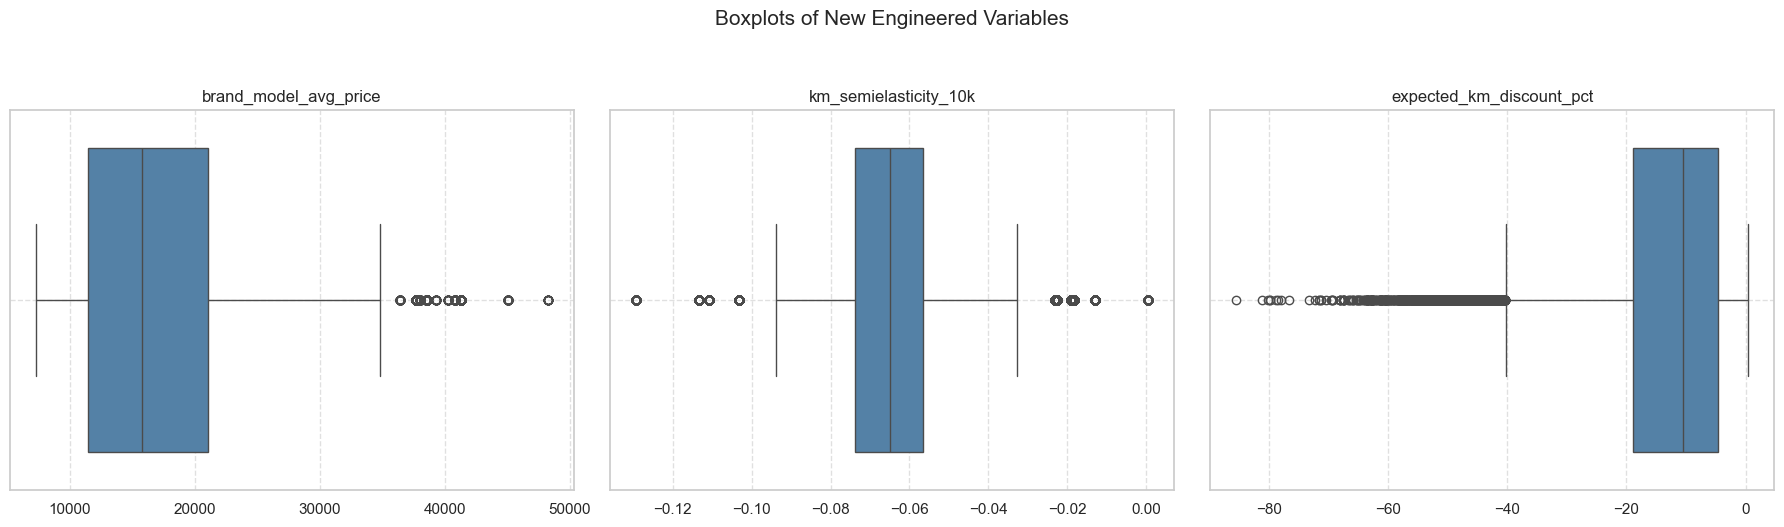

In [104]:
# List of new features to visualize
new_features = ['brand_model_avg_price', 'km_semielasticity_10k', 'expected_km_discount_pct']

sns.set(style="whitegrid")

# Define subplot grid
sp_cols = 3
sp_rows = ceil(len(new_features) / sp_cols)

# Prepare figure
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(18, 5), tight_layout=True)

# Flatten axes array (for consistent indexing)
axes = axes.flatten()

# Plot each boxplot
for i, feat in enumerate(new_features):
    sns.boxplot(x=X_train[feat], ax=axes[i], color='steelblue')
    axes[i].set_title(feat, fontsize=12)
    axes[i].set_xlabel("")
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Hide unused subplots if any
for j in range(len(new_features), len(axes)):
    fig.delaxes(axes[j])

# Add global title
plt.suptitle("Boxplots of New Engineered Variables", fontsize=15, y=1.05)
plt.show()

After inspecting the distribution of the new variables through descriptive statistics and through the visualization of the IQR method, we identified the presence of outliers.

For brand_model_avg_price, the high-end values correspond to premium vehicles (for example, luxury brands) and since it represent genuine data variation, we kept these values.

However, km_semielasticity_10k and expected_km_discount_pct showed extreme values that result from statistical instability in model-level regressions or unrealistic depreciation estimates.

To reduce their influence while preserving the general distribution, we applied IQR-based capping, limiting values to within 1.5×IQR from the interquartile range.

In [105]:
# IQR caps learned from train and reused on validation/test
features_to_cap = ["km_semielasticity_10k", "expected_km_discount_pct"]

# Learn caps on train
iqr_caps = {}
for col in features_to_cap:
    q1, q3 = X_train[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    iqr_caps[col] = (lower, upper)

# Apply to train
for col, (lower, upper) in iqr_caps.items():
    X_train[col] = X_train[col].clip(lower=lower, upper=upper)

# Apply same caps to validation
for col, (lower, upper) in iqr_caps.items():
    X_val[col] = X_val[col].clip(lower=lower, upper=upper)
    

In [106]:
X_train['expected_km_discount_pct'].describe()

count    53178.000000
mean       -12.970265
std         10.499677
min        -40.286230
25%        -18.843150
50%        -10.414767
75%         -4.547763
max          0.476027
Name: expected_km_discount_pct, dtype: float64

In [107]:
X_train['km_semielasticity_10k'].describe()

count    53178.000000
mean        -0.064417
std          0.013692
min         -0.099426
25%         -0.073714
50%         -0.064988
75%         -0.056573
max         -0.030862
Name: km_semielasticity_10k, dtype: float64

<a class="anchor" id="3351-applying-test-dataset">

### 3.3.4.1. Applying to the test dataset
    
</a>

In [108]:
for col, (lower, upper) in iqr_caps.items():
    X_test[col] = X_test[col].clip(lower=lower, upper=upper)

<a class="anchor" id="34-visual-exploration-after-feature-engineering">

### 3.4. Visual exploration after feature engineering
    
</a>

### 'car_age' visual analysis:


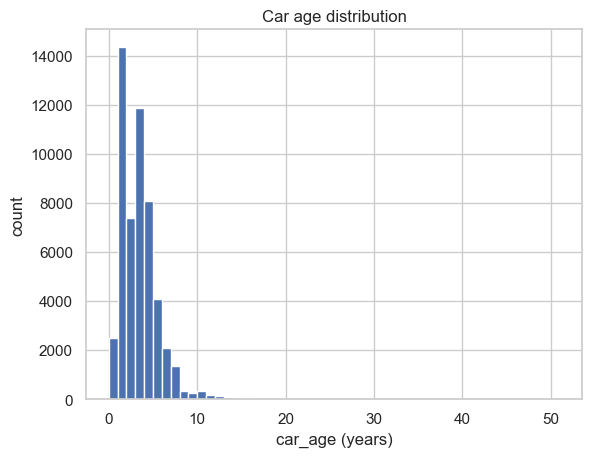

In [109]:
# Histogram of car_age

plt.figure()
X_train["car_age"].plot(kind="hist", bins=range(int(X_train["car_age"].min()), int(X_train["car_age"].max())+2))
plt.title("Car age distribution")
plt.xlabel("car_age (years)")
plt.ylabel("count")
plt.show()


Most vehicles are relatively new, with a strong concentration between 0 and 5 years. The distribution is right-skewed, with very few cars older than 10–12 years. No extreme or unrealistic ages are visible, confirming that age-related outliers were successfully treated.

Actionable: car_age is kept as a numerical feature without additional trimming.

C:\Users\ritan\AppData\Local\Temp\ipykernel_33840\3199841208.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=age_labels, showfliers=False)


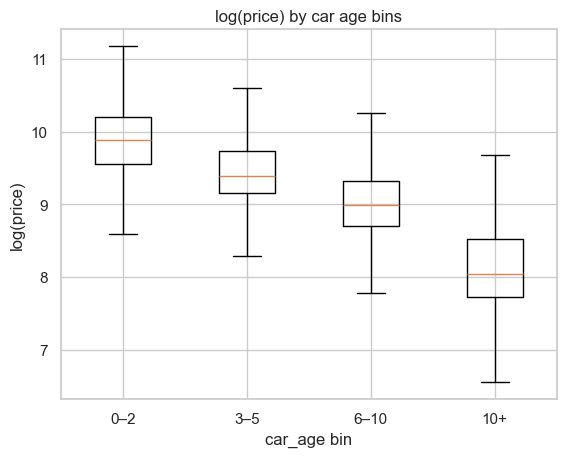

In [110]:
# Boxplot of log(price) by age bins 

log_price = np.log(np.asarray(y_train).clip(min=1e-6))
age_bins  = [0, 2, 5, 10, 100]; age_labels = ["0–2", "3–5", "6–10", "10+"]
age_bin   = pd.cut(X_train["car_age"], bins=age_bins, labels=age_labels, include_lowest=True, right=True)
plt.figure()
data = [log_price[age_bin == lab] for lab in age_labels]
plt.boxplot(data, labels=age_labels, showfliers=False)
plt.title("log(price) by car age bins"); plt.xlabel("car_age bin"); plt.ylabel("log(price)")
plt.show()


There is a clear stepwise decrease in median log(price) as car age increases. Price dispersion grows with age, indicating that older cars are more heterogeneous and more influenced by condition and specifications. High-end outliers in young bins are limited, suggesting earlier outlier treatment was effective.

Actionable: Confirms a non-linear but monotonic age effect; car_age is suitable for continuous modeling.

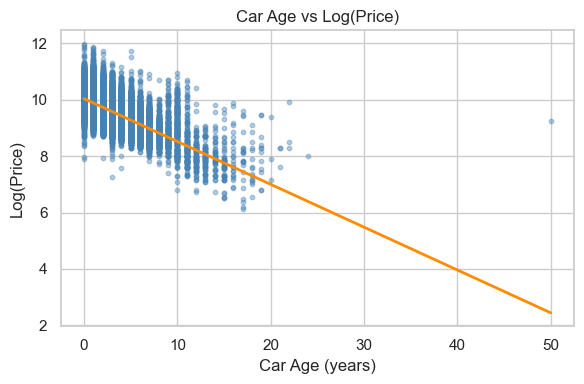

In [111]:
# Scatterplot: car_age vs log(price) with linear trend

# Ensure 'car_age' is numeric
X_train["car_age"] = pd.to_numeric(X_train["car_age"], errors="coerce")

# Log-transform target (avoid log(0))
log_price = np.log(np.asarray(y_train).clip(min=1e-6))

# Extract variables as numeric arrays
x = X_train["car_age"].astype(float).to_numpy()
y = log_price

# Keep only finite pairs (remove NaN/inf)
mask = np.isfinite(x) & np.isfinite(y)

# Scatterplot + fitted linear trend
plt.figure(figsize=(6,4))
plt.scatter(x[mask], y[mask], s=10, alpha=0.4, color='steelblue')

# Fit simple linear regression line
b1, b0 = np.polyfit(x[mask], y[mask], 1)
xs = np.linspace(np.nanmin(x), np.nanmax(x), 200)
plt.plot(xs, b1*xs + b0, color='darkorange', linewidth=2)

plt.title("Car Age vs Log(Price)")
plt.xlabel("Car Age (years)")
plt.ylabel("Log(Price)")
plt.tight_layout()
plt.show()


A strong negative linear relationship is visible between car age and log(price). The fitted line captures the global depreciation pattern well, while the vertical spread shows the influence of other factors (brand, mileage, features). No problematic leverage points remain.

Actionable: Supports using age in log-linear or semi-elastic formulations.

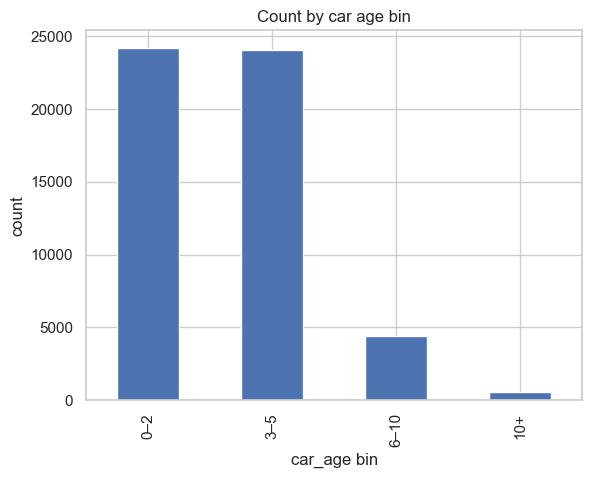

In [112]:
# Bar plot of count by age bin 

age_bins  = [0, 2, 5, 10, 100]; age_labels = ["0–2", "3–5", "6–10", "10+"]
age_bin   = pd.cut(X_train["car_age"], bins=age_bins, labels=age_labels, include_lowest=True, right=True)
plt.figure(); age_bin.value_counts().sort_index().plot(kind="bar")
plt.title("Count by car age bin"); plt.xlabel("car_age bin"); plt.ylabel("count")
plt.show()


Most observations fall into the 0–2 and 3–5 year bins, with substantially fewer cars above 6 years. The 10+ bin is very small.

Actionable: Older age bins are informative but underrepresented; models should rely on continuous age rather than heavy binning.

C:\Users\ritan\AppData\Local\Temp\ipykernel_33840\1682320406.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.figure(); plt.boxplot([mileage[age_bin==lab] for lab in age_labels], labels=age_labels, showfliers=False)


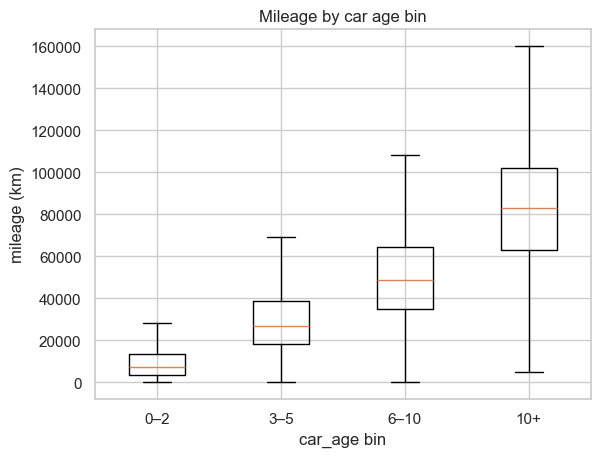

In [113]:
# Boxplot of Mileage by age bin 

age_bins  = [0, 2, 5, 10, 100]; age_labels = ["0–2", "3–5", "6–10", "10+"]
age_bin   = pd.cut(X_train["car_age"], bins=age_bins, labels=age_labels, include_lowest=True, right=True)
mileage = X_train["mileage"].to_numpy()
plt.figure(); plt.boxplot([mileage[age_bin==lab] for lab in age_labels], labels=age_labels, showfliers=False)
plt.title("Mileage by car age bin"); plt.xlabel("car_age bin"); plt.ylabel("mileage (km)")
plt.show()


Mileage increases monotonically with age, and variance grows substantially for older vehicles. This confirms that age and mileage are related but not redundant: cars of the same age can have very different usage profiles.

Actionable: Both car_age and mileage should remain in the model to capture distinct effects.

### 'brand_model_avg_price' visual analysis:


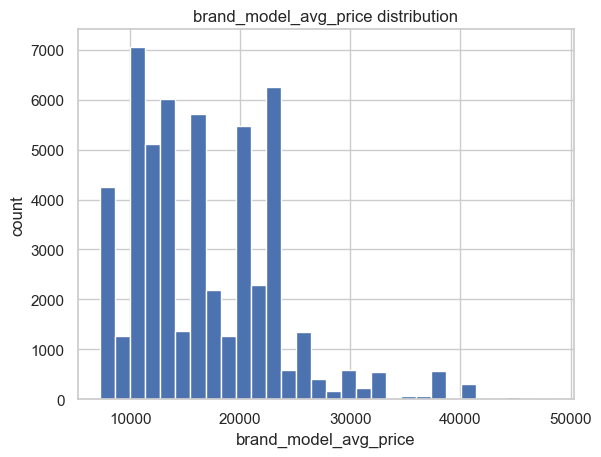

In [114]:
# Histogram of brand_model_avg_price 

plt.figure()
X_train["brand_model_avg_price"].plot(kind="hist", bins=30)
plt.title("brand_model_avg_price distribution"); plt.xlabel("brand_model_avg_price"); plt.ylabel("count")
plt.show()


The distribution is right-skewed, with most brand–model averages between roughly 10k€ and €25k€, and a thin tail of premium models above 40k€. All values appear realistic.

Actionable: As conclued before, winsorization isn't needed; the feature is retained as it is (log-transformed later).

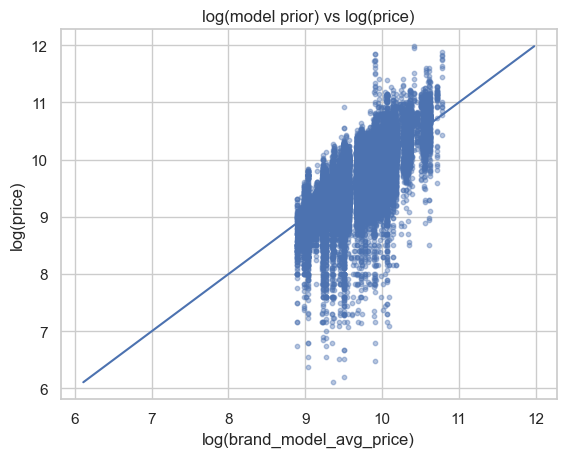

In [115]:
# Scatterplot of log(brand_model_avg_price) vs log(price)

x = np.log(X_train["brand_model_avg_price"].clip(lower=1e-6))
y = np.log(np.asarray(y_train).clip(min=1e-6))
mask = np.isfinite(x) & np.isfinite(y)
plt.figure(); plt.scatter(x[mask], y[mask], s=10, alpha=0.4)
lims = [np.nanmin(np.r_[x[mask], y[mask]]), np.nanmax(np.r_[x[mask], y[mask]])]
plt.plot(lims, lims)
plt.title("log(model prior) vs log(price)"); plt.xlabel("log(brand_model_avg_price)"); plt.ylabel("log(price)")
plt.show()


There is a very strong linear relationship close to the 45° line, showing that the brand–model average price is an excellent prior for individual car prices. Dispersion around the line reflects depreciation, mileage, and condition effects.

Actionable: Justifies using brand_model_avg_price as a core predictive feature.

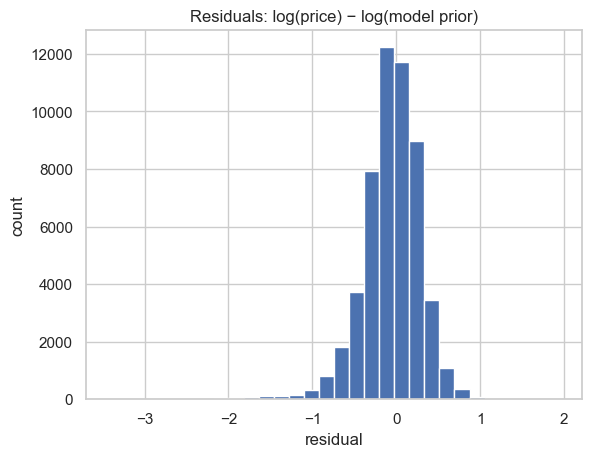

In [116]:
# Histogram of Residuals: log(price) − log(brand_model_avg_price) 

resid = np.log(np.asarray(y_train).clip(min=1e-6)) - np.log(X_train["brand_model_avg_price"].clip(lower=1e-6))
plt.figure(); pd.Series(resid).dropna().plot(kind="hist", bins=30)
plt.title("Residuals: log(price) − log(model prior)"); plt.xlabel("residual"); plt.ylabel("count")
plt.show()


Residuals are centered close to zero with moderate spread and no extreme skewness. The distribution is approximately symmetric, indicating that the prior is well calibrated.

Actionable: Remaining variance should be explained by age, mileage, and other engineered features.

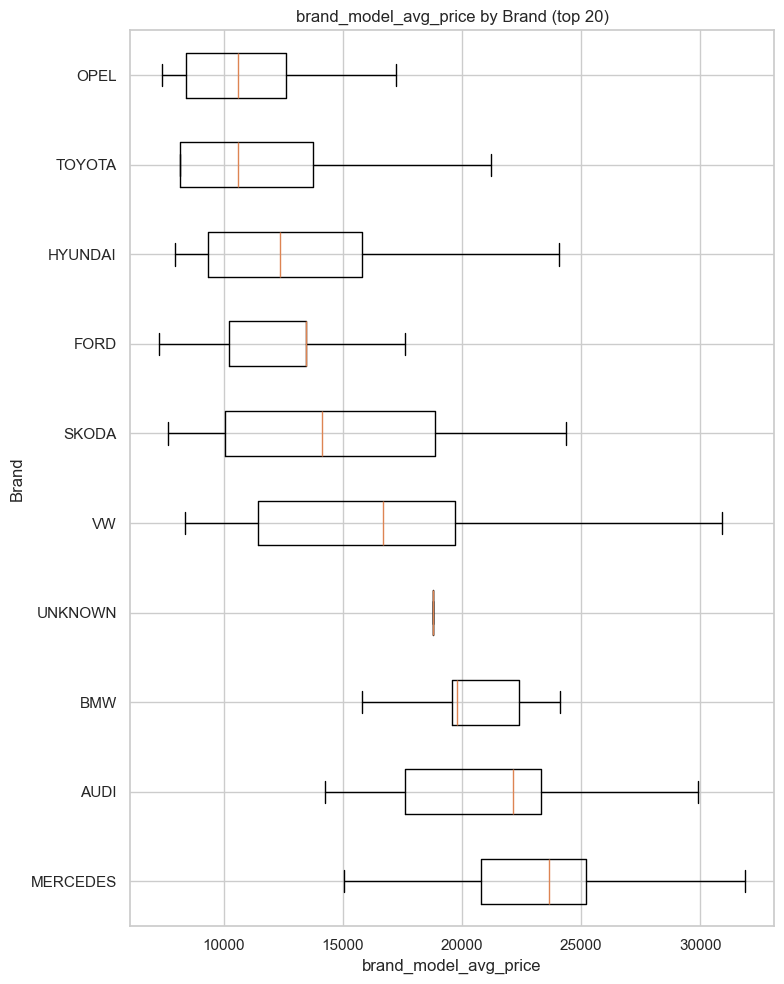

In [117]:
# Boxplots of brand_model_avg_price by Top 20 Brands 

brand_order = (X_train.groupby("Brand")["brand_model_avg_price"].median().sort_values(ascending=False).index[:20])
series_list = [X_train.loc[X_train["Brand"]==b, "brand_model_avg_price"].dropna() for b in brand_order]
plt.figure(figsize=(8,10)); plt.boxplot(series_list, vert=False, showfliers=False)
plt.yticks(range(1, len(brand_order)+1), brand_order)
plt.title("brand_model_avg_price by Brand (top 20)"); plt.xlabel("brand_model_avg_price"); plt.ylabel("Brand")
plt.tight_layout(); plt.show()


Premium brands (Mercedes, Audi, BMW) have clearly higher brand–model priors, while mass-market brands (Toyota, Ford, Opel) sit lower. Within-brand dispersion reflects diverse model portfolios.

Actionable: Confirms that brand_model_avg_price captures brand positioning without needing separate brand dummies for price level alone.

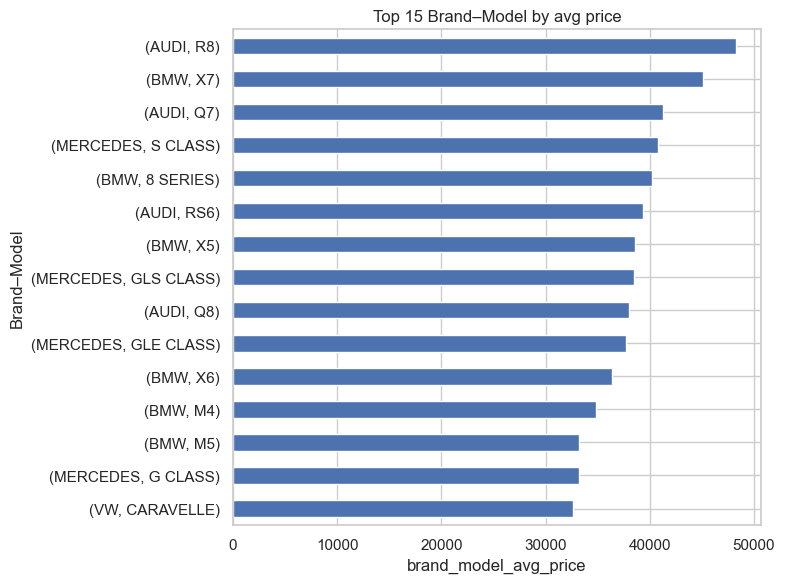

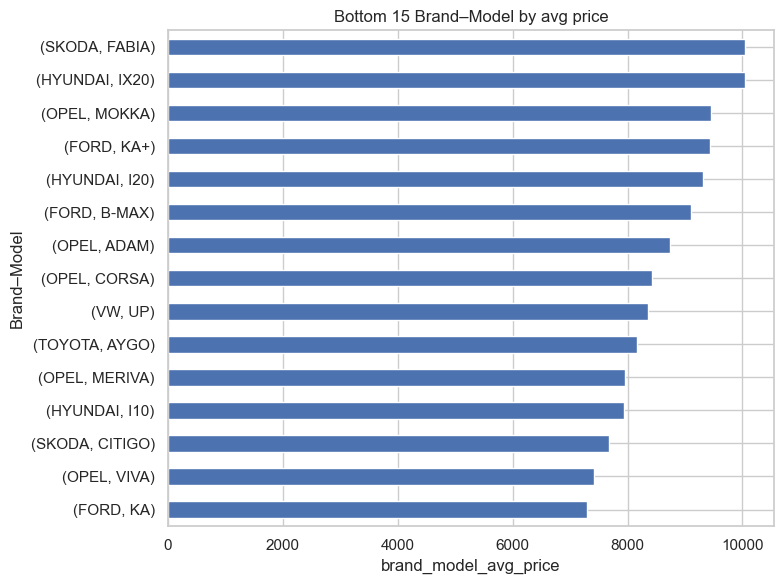

In [118]:
# Barchart of Top 15 Brand–Model by avg price 

model_mean = (X_train.groupby(["Brand","model"])["brand_model_avg_price"].mean().dropna())
top = model_mean.nlargest(15); bot = model_mean.nsmallest(15)
plt.figure(figsize=(8,6)); top.sort_values().plot(kind="barh")
plt.title("Top 15 Brand–Model by avg price"); plt.xlabel("brand_model_avg_price"); plt.ylabel("Brand–Model")
plt.tight_layout(); plt.show()
plt.figure(figsize=(8,6)); bot.sort_values().plot(kind="barh")
plt.title("Bottom 15 Brand–Model by avg price"); plt.xlabel("brand_model_avg_price"); plt.ylabel("Brand–Model")
plt.tight_layout(); plt.show()


The top list is dominated by high-end and performance models (e.g., Audi RS/R8, BMW X/M/8 series, Mercedes S/GLS classes). These rankings align well with market expectations.

Actionable: Confirms the credibility of the engineered prior; no manual corrections required.

### 'brand_model_depreciation' visual analysis:


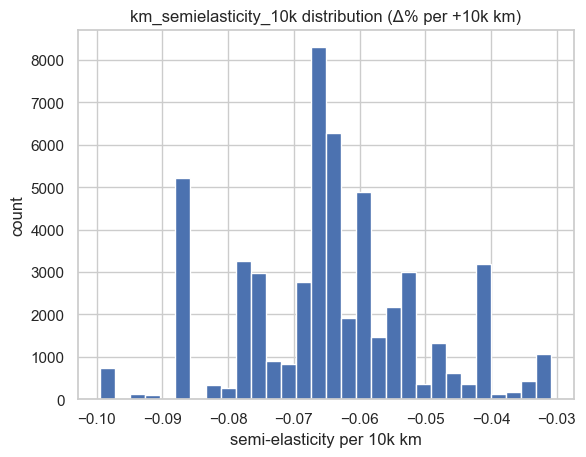

In [119]:
# Histogram of km_semielasticity_10k 

plt.figure()
X_train["km_semielasticity_10k"].plot(kind="hist", bins=30)
plt.title("km_semielasticity_10k distribution (Δ% per +10k km)"); plt.xlabel("semi-elasticity per 10k km"); plt.ylabel("count")
plt.show()


The distribution of mileage semi-elasticity is fairly concentrated, with most values clustered in a narrow negative range. This indicates that the effect of mileage on price is stable across most Brand–Model combinations. No extreme or noisy values are present, confirming that the estimation and filtering steps were effective.

Actionable: km_semielasticity_10k is retained as a robust, well-behaved numerical feature.

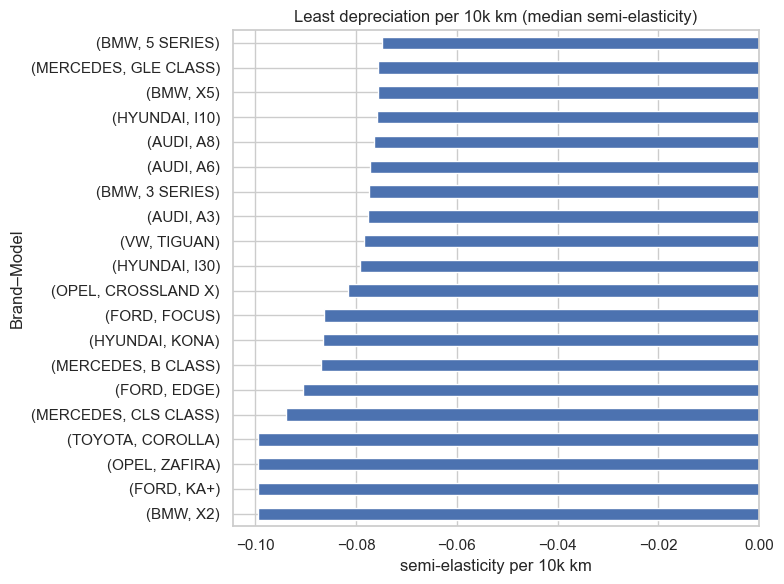

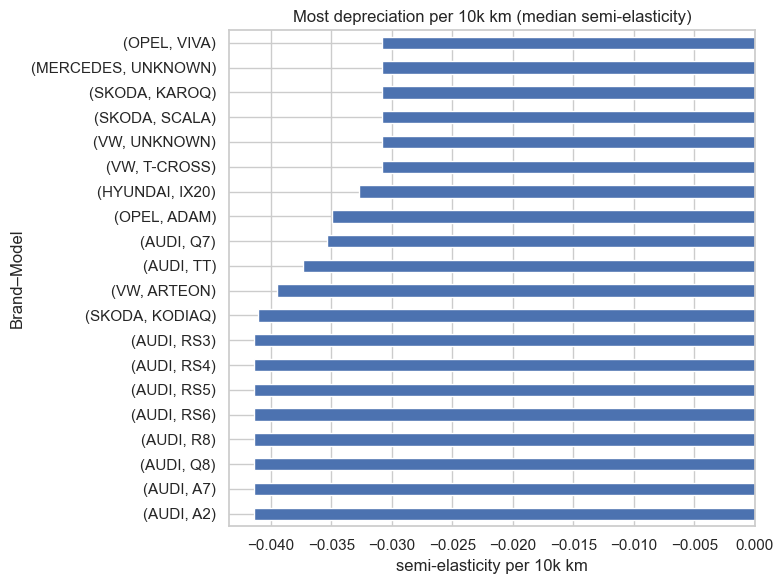

In [120]:
# Barplots of Least/Most depreciation per 10k km by model 

dep_by_model = (X_train.groupby(["Brand","model"])["km_semielasticity_10k"].median().dropna())
least_loss = dep_by_model.nsmallest(20)   
most_loss  = dep_by_model.nlargest(20)
plt.figure(figsize=(8,6)); least_loss.sort_values().plot(kind="barh")
plt.title("Least depreciation per 10k km (median semi-elasticity)"); plt.xlabel("semi-elasticity per 10k km"); plt.ylabel("Brand–Model")
plt.tight_layout(); plt.show()
plt.figure(figsize=(8,6)); most_loss.sort_values().plot(kind="barh")
plt.title("Most depreciation per 10k km (median semi-elasticity)"); plt.xlabel("semi-elasticity per 10k km"); plt.ylabel("Brand–Model")
plt.tight_layout(); plt.show()


Models with the lowest mileage depreciation tend to belong to premium or SUV segments, but some high-liquidity mainstream models also appear. This suggests that both brand positioning and market demand help mitigate mileage-related price loss.

Actionable: supports using Brand–Model–specific depreciation rather than a single global mileage effect.

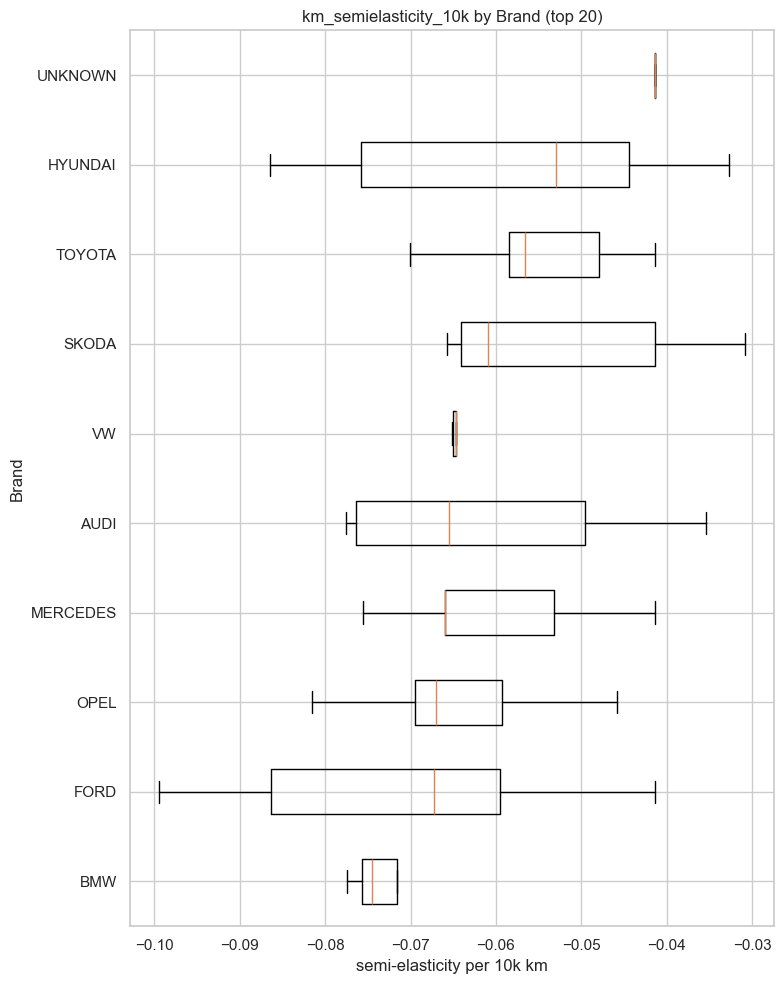

In [121]:
# Boxplots of km_semielasticity_10k by Brand (top 20 by count) 

keep  = X_train["Brand"].value_counts().index[:20]
order = (X_train[X_train["Brand"].isin(keep)].groupby("Brand")["km_semielasticity_10k"].median().sort_values().index)
series_list = [X_train.loc[X_train["Brand"]==b, "km_semielasticity_10k"].dropna() for b in order]
plt.figure(figsize=(8,10)); plt.boxplot(series_list, vert=False, showfliers=False)
plt.yticks(range(1, len(order)+1), order)
plt.title("km_semielasticity_10k by Brand (top 20)"); plt.xlabel("semi-elasticity per 10k km"); plt.ylabel("Brand")
plt.tight_layout(); plt.show()


Brands differ meaningfully in how mileage affects prices. Premium brands show less negative and more compact distributions, indicating more consistent depreciation patterns across models. Other brands display wider spreads, reflecting greater heterogeneity.

Actionable: validates mileage depreciation as a structured feature that captures brand-level differences.

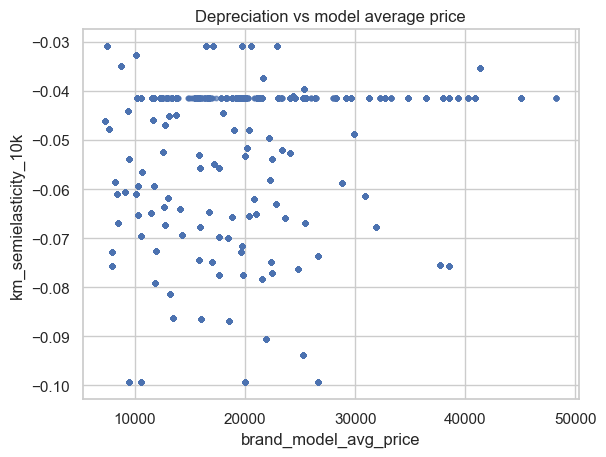

In [122]:
# Scatterplot of km_semielasticity_10k vs brand_model_avg_price

x = X_train["brand_model_avg_price"].to_numpy(); y = X_train["km_semielasticity_10k"].to_numpy()
mask = np.isfinite(x) & np.isfinite(y)
plt.figure(); plt.scatter(x[mask], y[mask], s=10, alpha=0.4)
plt.title("Depreciation vs model average price"); plt.xlabel("brand_model_avg_price"); plt.ylabel("km_semielasticity_10k")
plt.show()


There is no strong monotonic relationship between model average price and mileage depreciation. Expensive models do not systematically depreciate more or less per 10k km than cheaper ones.

Actionable: confirms that brand_model_avg_price and km_semielasticity_10k capture complementary, non-redundant information and should both be kept.

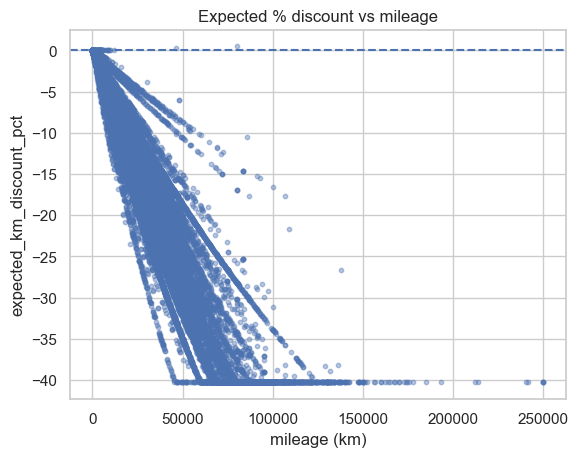

In [123]:
#Scatterplot of expected_km_discount_pct vs mileage

x = X_train["mileage"].to_numpy(); y = X_train["expected_km_discount_pct"].to_numpy()
mask = np.isfinite(x) & np.isfinite(y)
plt.figure(); plt.scatter(x[mask], y[mask], s=10, alpha=0.4)
plt.axhline(0, linestyle="--")
plt.title("Expected % discount vs mileage"); plt.xlabel("mileage (km)"); plt.ylabel("expected_km_discount_pct")
plt.show()


The expected mileage discount becomes more negative as mileage increases and then clearly saturates. This reflects the designed cap in the depreciation formula, preventing unrealistic near-zero prices for very high mileage vehicles.

Actionable: the capped discount formulation is numerically stable and suitable for direct use in modeling.

<a class="anchor" id="35-scaling-the-variables">

### 3.5. Scaling the variables
    
</a>

The numerical features in the dataset have very different scales. For example, "price" can reach over 100000, while "engineSize" or "tax" have much smaller ranges.

To ensure that all variables contribute equally to the model training, we applied ***Min-Max Scaling*** to scale them into the [0, 1] range. This method works by identifying the minimum and maximum values of each feature and transforming every data point using the formula: X scaled = (X - X min) / (X max - X min). As a result, the smallest value in each column becomes 0, the largest becomes 1, and all other values are proportionally scaled between them.

This approach preserves the shape of each variable’s distribution while preventing variables with large numeric ranges (such as price or mileage) from dominating the learning process.

The scaler was ***fitted*** only on the training data, to learn the minimum and maximum values for each feature.
The same ***transformation*** was then applied to the validation data using these learned parameters. This way, we can ensure that both datasets are scaled consistently without leaking any information from the validation set into the training phase.

In [124]:
# Select only numeric variables
numeric_features = ['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'car_age', 'brand_model_avg_price', 'expected_km_discount_pct']


# Call function
scaler = MinMaxScaler()

# Fit to training data
scaler.fit(X_train[numeric_features])

# Transform both train and validation
X_train_num_scaled = pd.DataFrame(
    scaler.transform(X_train[numeric_features]),
    columns=numeric_features,
    index=X_train.index
)

X_val_num_scaled = pd.DataFrame(
    scaler.transform(X_val[numeric_features]),
    columns=numeric_features,
    index=X_val.index
)

# Recombine scaled numeric + categorical variables
X_train_scaled = pd.concat([X_train_num_scaled, X_train.drop(columns=numeric_features)], axis=1)
X_val_scaled   = pd.concat([X_val_num_scaled, X_val.drop(columns=numeric_features)], axis=1)

# Replace the originals
X_train = X_train_scaled.copy()
X_val = X_val_scaled.copy()


In [125]:
X_train.describe()

mileage           tax           mpg    engineSize  previousOwners  \
count  53178.000000  53178.000000  53178.000000  53178.000000    53178.000000   
mean       0.093726      0.307877      0.411080      0.311877        0.334700   
std        0.086253      0.149911      0.112297      0.161751        0.236347   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%        0.029996      0.312500      0.337273      0.176471        0.166667   
50%        0.070204      0.362500      0.413636      0.294118        0.333333   
75%        0.130997      0.362500      0.467273      0.411765        0.500000   
max        1.000000      1.000000      1.000000      1.000000        1.000000   

            car_age  brand_model_avg_price  expected_km_discount_pct  \
count  53178.000000           53178.000000              53178.000000   
mean       0.058352               0.229629                  0.670129   
std        0.043189               0.159414                  0.257583   
min        0.000000               0.000000                  0.000000   
25%        0.020000               0.101331                  0.526052   
50%        0.060000               0.208286                  0.732822   
75%        0.080000               0.336453                  0.876754   
max        1.000000               1.000000                  1.000000   

              year  km_semielasticity_10k  
count      53178.0           53178.000000  
mean   2017.082421              -0.064417  
std       2.159474               0.013692  
min         1970.0              -0.099426  
25%         2016.0              -0.073714  
50%         2017.0              -0.064988  
75%         2019.0              -0.056573  
max         2020.0              -0.030862

After applying Min–Max Scaling, all numerical variables were rescaled to the [0, 1] range.
As shown in the descriptive statistics above, the minimum values are now 0, the maximum values are 1, and all other observations were proportionally adjusted between these bounds.

This normalization ensures that features measured in different units, such as price in pounds and engineSize in liters, contribute equally during model training.
It also helps gradient-based algorithms converge more efficiently and prevents features with larger numeric ranges from dominating the learning process.

Importantly, this transformation preserves the original shape and relationships within the data, as it modifies only the scale, not the distribution.

<a class="anchor" id="351-applying-test-dataset">

### 3.5.1. Applying To The Test Dataset
    
</a>

In [126]:
# Transform test using the scaler fitted on training data
X_test_num_scaled = pd.DataFrame(
    scaler.transform(X_test[numeric_features]),
    columns=numeric_features,
    index=X_test.index
)

# Recombine scaled numeric + unscaled categorical (same as train/val)
X_test_scaled = pd.concat([X_test_num_scaled, X_test.drop(columns=numeric_features)], axis=1)

# Replace the original
X_test = X_test_scaled.copy()

<a class="anchor" id="36-encoding-categorical-variables">

### 3.6. Encoding Categorical Variables
    
</a>

In this section, we will transform all categorical variables into numerical form so they can be used by machine learning algorithms.
Since these variables represent different types of information and have very different numbers of unique categories, we decided to apply different encoding strategies depending on the variable.

Before applying any encoding techniques, we created a copy of the training dataset containing the original (non-encoded) categorical variables to be later used in the feature selection chi-squared section:

In [127]:
# Keep a pre-OHE snapshot for statistical tests on raw categorical features
X_train_pre_ohe = X_train.copy()

In [128]:
# Checking the categories in each one of the categorical variables to decide what to do with them

for col in cars_train.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(cars_train[col].unique())


# Adding these variables back into the dataset (they were removed because they didnt have any missing values to treat)
for col in ['transmission', 'fuelType', 'Brand', 'model']:
    if col not in X_train.columns:
        X_train[col] = cars_train.loc[X_train.index, col]
    if col not in X_val.columns:
        X_val[col] = cars_train.loc[X_val.index, col]



Brand:
['VW' 'TOYOTA' 'AUDI' 'FORD' 'BMW' 'SKODA' 'OPEL' 'MERCEDES' 'HYUNDAI' nan]

model:
['GOLF' 'YARIS' 'Q2' 'FIESTA' '2 SERIES' '3 SERIES' 'A3' 'OCTAVIA'
 'PASSAT' 'FOCUS' 'INSIGNIA' 'A CLASS' 'Q3' 'FABIA' 'KA+' 'GLC CLASS'
 'I30' 'C CLASS' 'POLO' 'E CLASS' 'Q5' 'UP' 'C-HR' 'MOKKA X' 'CORSA'
 'ASTRA' 'TT' '5 SERIES' 'AYGO' '4 SERIES' 'SLK' 'VIVA' 'T-ROC' 'ECOSPORT'
 'TUCSON' nan 'X-CLASS' 'CL CLASS' 'IX20' 'I20' 'RAPID' 'A1' 'AURIS'
 'SHARAN' 'ADAM' 'X3' 'A8' 'GLS CLASS' 'B-MAX' 'A4' 'KONA' 'I10' 'MOKKA'
 'S-MAX' 'X2' 'CROSSLAND X' 'TIGUAN' 'A5' 'GLE CLASS' 'ZAFIRA' 'IONIQ'
 'A6' 'MONDEO' 'YETI OUTDOOR' 'X1' 'SCALA' 'S CLASS' '1 SERIES' 'KAMIQ'
 'KUGA' 'TOURNEO CONNECT' 'Q7' 'GLA CLASS' 'ARTEON' 'SL CLASS' 'SANTA FE'
 'GRANDLAND X' 'I800' 'RAV4' 'TOURAN' 'CITIGO' 'ROOMSTER' 'PRIUS'
 'COROLLA' 'B CLASS' 'Q8' 'KODIAQ' 'V CLASS' 'CADDY MAXI LIFE' 'SUPERB'
 'GETZ' 'COMBO LIFE' 'BEETLE' 'GALAXY' 'M3' 'GTC' 'X4' 'KA' 'IX35'
 'GRAND TOURNEO CONNECT' 'M4' 'TOURNEO CUSTOM' 'Z4' 'X5' 'MERIV



We can seen that:

- Brand: 10 unique categories

- Model: more than 200 unique categories

- Transmission: 6 unique categories

- FuelType: 6 unique categories

Also, some categories such as "Unknown" or "OTHER" represent missing or unspecified values, but they will be kept as valid categories, since they carry information (the fact that the data was unknown).


This is the encoding strategy we decided to folow:

- "Brand": We chose to use One-Hot Encoding, since the variable has few categories and represents distinct brands. 
One-Hot Encoding creates one binary column (0/1) per brand, avoiding any artificial ranking between them.

- "Transmission": We also chose to use One-Hot Encoding, since there are only a few categories (Manual, Automatic, Semi-Auto), and they are independent of each other.

- "FuelType": We are also going to use One-Hot Encoding to treat this variable, because it has a few distinct categories (Petrol, Diesel, Hybrid, etc) and no logical order, so One-Hot Encoding is appropriate.

- "Model": Finally, we decided to use a different approach for this variable. We are going to use Frequency Encoding. This variable contains more than 200 unique values, so One-Hot Encoding would generate hundreds of columns, making the dataset extremely large and inefficient.
Instead, Frequency Encoding replaces each category with the proportion of times it appears in the training dataset. This transformation captures how common or rare each car model is, while keeping the feature in a single numeric column.
Frequencies were calculated only from the training data to avoid data leakage, and the same mapping was then applied to the validation data.
If a model appears in the validation set but not in the training set, its frequency is set to 0.


In [129]:
# Applying One-Hot Encoding to variables with few categories

# List of categorical variables with few categories
categorical_vars = ['Brand', 'transmission', 'fuelType']

# Create encoder (drop_first=True to avoid multicollinearity)
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit only on training data
ohe.fit(X_train[categorical_vars])

# Transform train and validation sets
X_train_ohe = pd.DataFrame(
    ohe.transform(X_train[categorical_vars]),
    columns=ohe.get_feature_names_out(categorical_vars),
    index=X_train.index
)

X_val_ohe = pd.DataFrame(
    ohe.transform(X_val[categorical_vars]),
    columns=ohe.get_feature_names_out(categorical_vars),
    index=X_val.index
)

# Combine encoded categorical + numeric variables
X_train_encoded = pd.concat([X_train.drop(columns=categorical_vars), X_train_ohe], axis=1)
X_val_encoded   = pd.concat([X_val.drop(columns=categorical_vars), X_val_ohe], axis=1)

# Replace originals
X_train = X_train_encoded.copy()
X_val = X_val_encoded.copy()

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")

# Check result
X_train_encoded.head()


X_train shape: (53178, 29)
X_val shape: (22791, 29)


mileage     tax       mpg  engineSize  previousOwners  car_age  \
carID                                                                    
65357  0.000052  0.3625  0.316364    0.176471        0.500000     0.02   
52662  0.054764  0.3750  0.455455    0.264706        0.666667     0.04   
22854  0.067672  0.0000  0.506364    0.117647        0.500000     0.06   
14139  0.161665  0.3125  0.455455    0.411765        0.166667     0.08   
73616  0.007832  0.3750  0.344545    0.411765        0.333333     0.02   

       brand_model_avg_price  expected_km_discount_pct     model  year  ...  \
carID                                                                   ...   
65357               0.035308                  0.988202      ADAM  2019  ...   
52662               0.081008                  0.805466     YARIS  2018  ...   
22854               0.071848                  0.753502    FIESTA  2017  ...   
14139               0.305157                  0.328698  3 SERIES  2016  ...   
73616               0.347386                  0.950969    TIGUAN  2019  ...   

       Brand_VW  transmission_MANUAL  transmission_OTHER  \
carID                                                      
65357       0.0                  1.0                 0.0   
52662       0.0                  0.0                 0.0   
22854       0.0                  1.0                 0.0   
14139       0.0                  0.0                 0.0   
73616       1.0                  1.0                 0.0   

       transmission_SEMI-AUTO  transmission_UNKNOWN  fuelType_ELECTRIC  \
carID                                                                    
65357                     0.0                   0.0                0.0   
52662                     0.0                   0.0                0.0   
22854                     0.0                   0.0                0.0   
14139                     1.0                   0.0                0.0   
73616                     0.0                   0.0                0.0   

       fuelType_HYBRID  fuelType_OTHER  fuelType_PETROL  fuelType_UNKNOWN  
carID                                                                      
65357              0.0             0.0              1.0               0.0  
52662              0.0             0.0              1.0               0.0  
22854              0.0             0.0              1.0               0.0  
14139              0.0             0.0              0.0               0.0  
73616              0.0             0.0              0.0               0.0  

[5 rows x 29 columns]

In [130]:
# Frequency Encoding for 'model'

# Calculate frequency (proportion) of each model in the training set
model_freq = X_train['model'].value_counts(normalize=True)

# Map frequencies to train and validation
X_train['model_freq'] = X_train['model'].map(model_freq)
X_val['model_freq']   = X_val['model'].map(model_freq)

# Replace unseen models in validation with 0
X_val['model_freq'] = X_val['model_freq'].fillna(0)

# Drop the original 'model' column
X_train = X_train.drop(columns=['model'])
X_val   = X_val.drop(columns=['model'])

# Check results
print("Example of encoded 'model_freq' values:\n", X_train['model_freq'].head())


Example of encoded 'model_freq' values:
 carID
65357    0.004494
52662    0.018842
22854    0.058727
14139    0.022415
73616    0.015326
Name: model_freq, dtype: float64


In [131]:
X_train.head()

mileage     tax       mpg  engineSize  previousOwners  car_age  \
carID                                                                    
65357  0.000052  0.3625  0.316364    0.176471        0.500000     0.02   
52662  0.054764  0.3750  0.455455    0.264706        0.666667     0.04   
22854  0.067672  0.0000  0.506364    0.117647        0.500000     0.06   
14139  0.161665  0.3125  0.455455    0.411765        0.166667     0.08   
73616  0.007832  0.3750  0.344545    0.411765        0.333333     0.02   

       brand_model_avg_price  expected_km_discount_pct  year  \
carID                                                          
65357               0.035308                  0.988202  2019   
52662               0.081008                  0.805466  2018   
22854               0.071848                  0.753502  2017   
14139               0.305157                  0.328698  2016   
73616               0.347386                  0.950969  2019   

       km_semielasticity_10k  ...  transmission_MANUAL  transmission_OTHER  \
carID                         ...                                            
65357              -0.034935  ...                  1.0                 0.0   
52662              -0.056573  ...                  0.0                 0.0   
22854              -0.059468  ...                  1.0                 0.0   
14139              -0.077486  ...                  0.0                 0.0   
73616              -0.078321  ...                  1.0                 0.0   

       transmission_SEMI-AUTO  transmission_UNKNOWN  fuelType_ELECTRIC  \
carID                                                                    
65357                     0.0                   0.0                0.0   
52662                     0.0                   0.0                0.0   
22854                     0.0                   0.0                0.0   
14139                     1.0                   0.0                0.0   
73616                     0.0                   0.0                0.0   

       fuelType_HYBRID  fuelType_OTHER  fuelType_PETROL  fuelType_UNKNOWN  \
carID                                                                       
65357              0.0             0.0              1.0               0.0   
52662              0.0             0.0              1.0               0.0   
22854              0.0             0.0              1.0               0.0   
14139              0.0             0.0              0.0               0.0   
73616              0.0             0.0              0.0               0.0   

       model_freq  
carID              
65357    0.004494  
52662    0.018842  
22854    0.058727  
14139    0.022415  
73616    0.015326  

[5 rows x 29 columns]

<a class="anchor" id="361-applying-test-dataset">

### 3.6.1. Applying To The Test Dataset
    
</a>

In [132]:
# Transform test set
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test[categorical_vars]),
    columns=ohe.get_feature_names_out(categorical_vars),
    index=X_test.index
)

# Combine encoded categorical + numeric variables
X_test_encoded = pd.concat([X_test.drop(columns=categorical_vars), X_test_ohe], axis=1)

# Replace original
X_test = X_test_encoded.copy()

# Map model frequencies to test
X_test["model_freq"] = X_test["model"].map(model_freq)

# Replace unseen models in test with 0
X_test["model_freq"] = X_test["model_freq"].fillna(0)

# Drop the original 'model' column
X_test = X_test.drop(columns=["model"])


C:\Users\ritan\anaconda3\envs\fall2526\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



<div class="alert alert-block alert-success">

<a class="anchor" id="4-feature-selection">    </a>
## 4. Feature Selection
    

    
</div>

In this section, we apply feature selection techniques to identify which variables are most relevant for predicting car prices and to reduce unnecessary complexity in the dataset. The goal is to simplify the feature space by removing redundant information, avoiding target-derived constructs, and keeping only predictors that contribute meaningful signal to the models.

Because our workflow follows a hold-out approach (train/validation split), all feature selection decisions are performed using the training data and then assessed on the validation set, ensuring consistency and avoiding leakage.

We use three complementary approaches:

**Filter Methods**: These methods rely on statistical properties of the data to screen and refine predictors before model training. In this project, we will:

- Check for zero-variance / near-zero variance numeric predictors, since constant variables provide no information to the model.

- Perform a Spearman correlation analysis across numerical variables to detect redundancy (using Spearman because relationships may be non-linear and the dataset includes continuous and binary variables).

- Identify highly correlated feature pairs and decide which variable to keep based on interpretability, association with the target, and risk of constructed/target-derived redundancy.

- For categorical variables, apply Chi-Square tests using a binned version of the target (Low/Medium/High price groups), evaluating the association between each raw categorical feature (pre-One-Hot Encoding) and the target bins.

**Wrapper Methods**: Wrapper methods evaluate subsets of features by repeatedly fitting a model and measuring performance. Here, we use:

- Recursive Feature Elimination (RFE) to rank and select predictors based on their contribution to model performance.

- A validation-based procedure to explore different numbers of retained features and observe how performance changes as dimensionality increases (under the hold-out setup).

**Embedded**: Embedded methods perform selection as part of model training by penalising less informative predictors. In our case, we use:

- Lasso regression (L1 regularisation) to shrink weaker coefficients toward zero, highlighting which predictors contribute most strongly under a linear modelling assumption.

- A validation-based tuning strategy to choose the regularisation strength and compare solutions with different sparsity levels.

By combining filter, wrapper, and embedded approaches, we obtain a robust view of feature relevance from multiple perspectives, ensuring the final modelling pipeline is both efficient and grounded in statistical and predictive evidence.


<a class="anchor" id="41-filter-methods">

### 4.1. Filters Methods
    
</a>

<a class="anchor" id="411-removing-constant-variables">

### 4.1.1. Removing Constant Variables
    
</a>

Variables with zero or near-zero variance don't provide any information to the model, since they take the same (or almost the same) value for all observations. These variables can't help the model distinguish between different target values and should therefore be removed.

So, next, we will check the variance of each variable, to decide if they should be removed from the dataset.


In [133]:
# Checking variance of each numeric feature
variance = X_train.var(numeric_only=True)
print(variance)

mileage                      0.00744
tax                         0.022473
mpg                         0.012611
engineSize                  0.026163
previousOwners               0.05586
car_age                     0.001865
brand_model_avg_price       0.025413
expected_km_discount_pct    0.066349
year                        4.663327
km_semielasticity_10k       0.000187
Brand_BMW                    0.09005
Brand_FORD                  0.168518
Brand_HYUNDAI               0.042667
Brand_MERCEDES              0.131915
Brand_OPEL                  0.110893
Brand_SKODA                  0.05508
Brand_TOYOTA                0.058074
Brand_UNKNOWN               0.000564
Brand_VW                    0.119495
transmission_MANUAL         0.247748
transmission_OTHER          0.000056
transmission_SEMI-AUTO      0.172818
transmission_UNKNOWN        0.028281
fuelType_ELECTRIC           0.000056
fuelType_HYBRID             0.027855
fuelType_OTHER              0.002214
fuelType_PETROL              0.24815
f

Since there seem to be no variables with variance = 0, we won't need to remove any variable.

<a class="anchor" id="412-correlation-analysis">

### 4.1.2. Correlation Analysis
    
</a>

When two numerical variables are strongly correlated, they tend to carry very similar information about the target.
Including both in the model does not add new knowledge, instead, it introduces redundancy, increases complexity, and can make the model less stable and harder to interpret.

To address this issue, we will examine the correlations between all numerical variables.
If two variables are highly correlated (for example, with a correlation coefficient greater than 0.8 or lower than -0.8), we will consider keeping only one of them, typically the one that is more interpretable or more directly related to the car price.

Since our dataset contains both continuous and binary (0/1) numerical variables, and because the relationships between car features and prices are not strictly linear, we will use the ***Spearman correlation coefficient***.
Unlike Pearson’s correlation, Spearman does not assume a linear relationship or normal distribution and is more robust to outliers.
It measures how well the relationship between two variables can be described by a monotonic function, meaning it captures more general patterns of association.

So next, we will compute the Spearman correlation matrix for all numerical variables and visualize it using a heatmap to detect potentially redundant features.

In [134]:
# Checking the columns in the dataset to see which ones are numeric and which ones are categorical
# To decide if they should or not be included in the correlation matrix
X_train.columns

Index(['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'car_age',
       'brand_model_avg_price', 'expected_km_discount_pct', 'year',
       'km_semielasticity_10k', 'Brand_BMW', 'Brand_FORD', 'Brand_HYUNDAI',
       'Brand_MERCEDES', 'Brand_OPEL', 'Brand_SKODA', 'Brand_TOYOTA',
       'Brand_UNKNOWN', 'Brand_VW', 'transmission_MANUAL',
       'transmission_OTHER', 'transmission_SEMI-AUTO', 'transmission_UNKNOWN',
       'fuelType_ELECTRIC', 'fuelType_HYBRID', 'fuelType_OTHER',
       'fuelType_PETROL', 'fuelType_UNKNOWN', 'model_freq'],
      dtype='object')

In [135]:
# Selecting only the numeric columns (that will be included in the correlation matrix)
num_vars = [ 
    'mileage', 'tax', 'mpg', 'engineSize',
    'previousOwners', 'car_age', 'year', 'brand_model_avg_price',
    'km_semielasticity_10k', 'expected_km_discount_pct', 'model_freq'
]

In [136]:
# Compute Spearman correlation matrix for numerical features
cor_spearman = X_train[num_vars].corr(method='spearman')

cor_spearman

mileage       tax       mpg  engineSize  \
mileage                   1.000000 -0.243399  0.299683    0.093572   
tax                      -0.243399  1.000000 -0.517749    0.148535   
mpg                       0.299683 -0.517749  1.000000   -0.190399   
engineSize                0.093572  0.148535 -0.190399    1.000000   
previousOwners            0.004949 -0.003379  0.004720    0.004252   
car_age                   0.781416 -0.298766  0.286402    0.032989   
year                     -0.781416  0.298766 -0.286402   -0.032989   
brand_model_avg_price    -0.085937  0.173010 -0.219650    0.711771   
km_semielasticity_10k    -0.024468 -0.006701 -0.095540    0.010117   
expected_km_discount_pct -0.971495  0.234900 -0.313351   -0.079265   
model_freq                0.024729 -0.096427  0.270085   -0.229378   

                          previousOwners   car_age      year  \
mileage                         0.004949  0.781416 -0.781416   
tax                            -0.003379 -0.298766  0.298766   
mpg                             0.004720  0.286402 -0.286402   
engineSize                      0.004252  0.032989 -0.032989   
previousOwners                  1.000000 -0.002687  0.002687   
car_age                        -0.002687  1.000000 -1.000000   
year                            0.002687 -1.000000  1.000000   
brand_model_avg_price           0.000170 -0.173965  0.173965   
km_semielasticity_10k          -0.002243 -0.000324  0.000324   
expected_km_discount_pct       -0.005046 -0.755305  0.755305   
model_freq                      0.000701  0.020729 -0.020729   

                          brand_model_avg_price  km_semielasticity_10k  \
mileage                               -0.085937              -0.024468   
tax                                    0.173010              -0.006701   
mpg                                   -0.219650              -0.095540   
engineSize                             0.711771               0.010117   
previousOwners                         0.000170              -0.002243   
car_age                               -0.173965              -0.000324   
year                                   0.173965               0.000324   
brand_model_avg_price                  1.000000              -0.013950   
km_semielasticity_10k                 -0.013950               1.000000   
expected_km_discount_pct               0.087363               0.220051   
model_freq                            -0.183599              -0.379677   

                          expected_km_discount_pct  model_freq  
mileage                                  -0.971495    0.024729  
tax                                       0.234900   -0.096427  
mpg                                      -0.313351    0.270085  
engineSize                               -0.079265   -0.229378  
previousOwners                           -0.005046    0.000701  
car_age                                  -0.755305    0.020729  
year                                      0.755305   -0.020729  
brand_model_avg_price                     0.087363   -0.183599  
km_semielasticity_10k                     0.220051   -0.379677  
expected_km_discount_pct                  1.000000   -0.113354  
model_freq                               -0.113354    1.000000

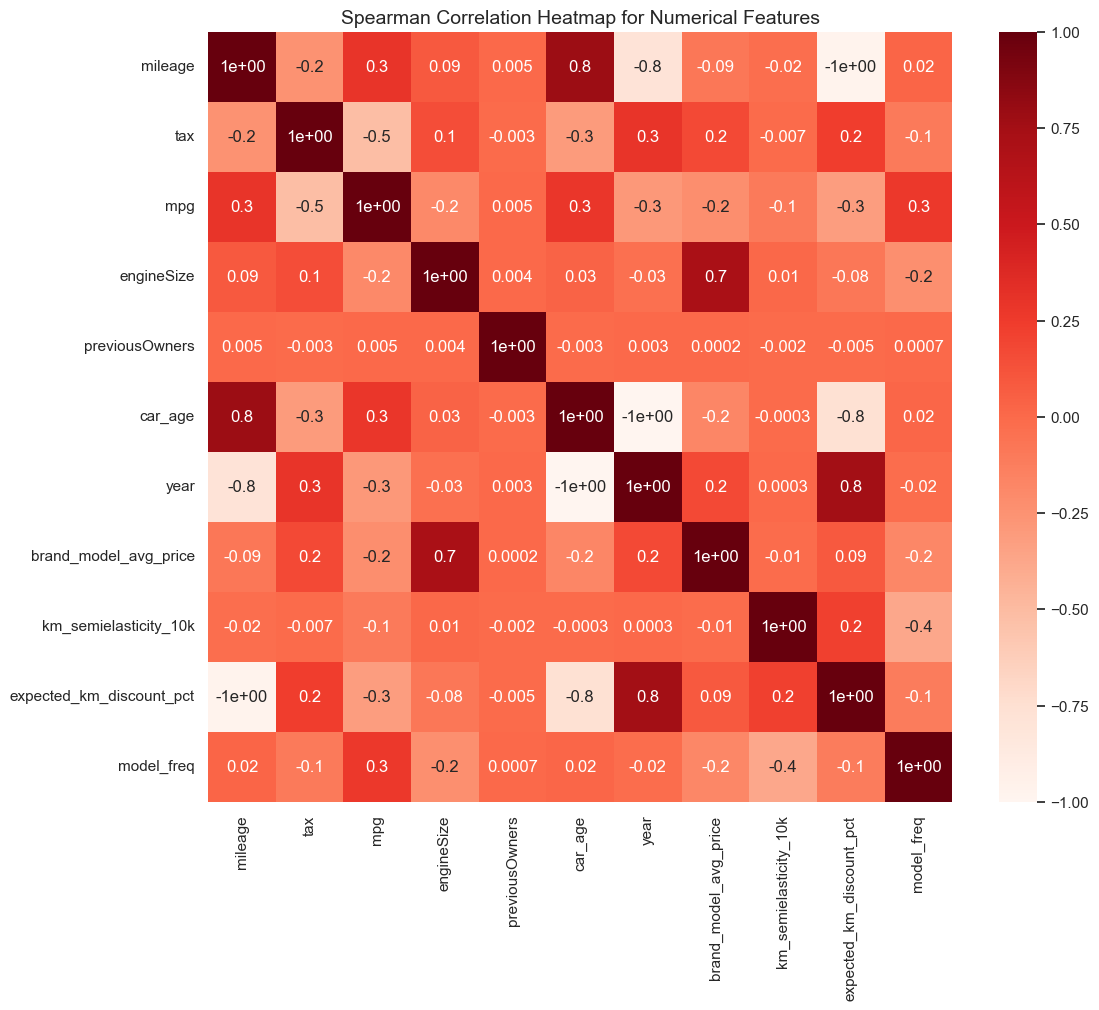

In [137]:
# Visualize correlation heatmap

cor_heatmap(cor_spearman)

In [138]:
# Identify highly correlated pairs
pairs = cor_spearman.unstack().sort_values(ascending=False)

# Remove self-correlations (diagonal)
pairs = pairs[pairs.index.get_level_values(0) != pairs.index.get_level_values(1)]

# Strong (but not perfect) correlations: 0.8 < |corr| < 1
high_corr_strong = pairs[(pairs.abs() > 0.8) & (pairs.abs() < 1)]

# Perfect correlations: |corr| == 1 (for example, derived variables like car_age vs year)
high_corr_perfect = pairs[pairs.abs() == 1]

print("Highly correlated feature pairs (0.8 < |corr| < 1):\n", high_corr_strong)
print("\nPerfectly correlated feature pairs (|corr| = 1):\n", high_corr_perfect)

Highly correlated feature pairs (0.8 < |corr| < 1):
 mileage                   expected_km_discount_pct   -0.971495
expected_km_discount_pct  mileage                    -0.971495
dtype: float64

Perfectly correlated feature pairs (|corr| = 1):
 car_age  year      -1.0
year     car_age   -1.0
dtype: float64


From the Spearman correlation matrix above, we can observe several important relationships between the numerical variables. Overall, most features show moderate or low correlations, which means they contribute distinct information to the model. However, a few pairs show strong associations that might indicate redundancy, so we separate them into strong (but not perfect) correlations and perfect correlations:

- **Mileage** and **Expected_km_discount_pct** (ρ ≈ -0.97): This is a very strong negative correlation, which makes sense because `expected_km_discount_pct` is computed using `mileage` together with the estimated depreciation coefficient. In practice, these two variables carry very similar information about vehicle usage, so keeping both may introduce redundancy.

- **Car_age** and **Year** (|ρ| = 1.00): These variables are perfectly correlated by definition because `car_age` is derived directly from `year` (e.g., car_age = reference_year − year). Since they represent the same concept in inverse form, we will only keep one of them.

- **EngineSize** and **brand_model_avg_price** (ρ ≈ 0.71): This correlation is relatively high but still below the 0.8 threshold. It reflects an intuitive relationship: larger engines are often associated with higher-end models. However, since `engineSize` is a physical specification and `brand_model_avg_price` is a market-based indicator, we keep both because they provide complementary information.

All other correlations fall below the 0.8 threshold, suggesting that the remaining variables provide largely independent contributions to the prediction model.

To decide which variable to keep from each redundant pair, we next examine the individual correlation of each feature with the target variable (price) and how “globally redundant” each feature is, measured by its average absolute correlation with all other features.

In [139]:
# Computing correlation of all numeric variables with the target
target_corr = X_train[num_vars].apply(lambda x: x.corr(y_train, method="spearman")).sort_values(ascending=False)

print("Spearman correlation of each variable with target (price):\n")
print(target_corr)

# Defines pairs of potentially redundant variables (from correlation matrix)
redundant_pairs = [
    ("mileage", "expected_km_discount_pct"),
    ("car_age", "year"),
]

print("\nComparison of redundant variable pairs:\n")
for var1, var2 in redundant_pairs:
    corr1 = target_corr.get(var1, np.nan)
    corr2 = target_corr.get(var2, np.nan)

    print(f"{var1:28} corr(price) = {corr1:.4f}")
    print(f"{var2:28} corr(price) = {corr2:.4f}")

    best_var = var1 if abs(corr1) >= abs(corr2) else var2
    print(f"Higher absolute correlation with target: {best_var}\n")

# Check which variable has lower average correlation with others
cor_matrix = X_train[num_vars].corr(method="spearman").abs()
avg_corr = cor_matrix.mean().sort_values()

print("\nAverage correlation of each feature with all others:")
print(avg_corr)

Spearman correlation of each variable with target (price):

brand_model_avg_price       0.774864
year                        0.594351
engineSize                  0.566073
expected_km_discount_pct    0.511321
tax                         0.298093
km_semielasticity_10k       0.003984
previousOwners              0.001958
model_freq                 -0.162860
mpg                        -0.357182
mileage                    -0.521315
car_age                    -0.594351
dtype: float64

Comparison of redundant variable pairs:

mileage                      corr(price) = -0.5213
expected_km_discount_pct     corr(price) = 0.5113
Higher absolute correlation with target: mileage

car_age                      corr(price) = -0.5944
year                         corr(price) = 0.5944
Higher absolute correlation with target: car_age


Average correlation of each feature with all others:
previousOwners              0.093712
km_semielasticity_10k       0.159400
model_freq                  0.212674
engineSiz

After computing the Spearman correlation of each numerical variable with the target (price), and the average absolute correlation of each variable with all others, we can make a more informed decision about which redundant features to remove.

- **Mileage** vs **Expected_km_discount_pct**: Although both features are highly correlated with each other (ρ ≈ -0.97), `expected_km_discount_pct` is constructed directly from `mileage` combined with a depreciation coefficient estimated from the training target. To reduce redundancy and avoid relying on a target-derived feature by construction, we keep the original usage measure (`mileage`) and drop `expected_km_discount_pct`.

- **Car_age** vs **Year**: As expected, these two variables are perfectly correlated (|ρ| = 1.00) because `car_age` is derived from `year` . Since `car_age` is more interpretable for the depreciation concept and captures the same information more directly, we keep `car_age` and remove `year`.

No other variable pairs show correlations above the chosen threshold, indicating that the remaining features provide unique information. This ensures the selected set of predictors is informative and less redundant, while keeping the modelling pipeline consistent and interpretable.

In [140]:
# Removing redundant variables to reduce redundancy

redundant_vars = ["year", "expected_km_discount_pct"]

# Dropping 'year' (perfectly redundant with car_age)
# Dropping 'expected_km_discount_pct' (highly tied to mileage and target-derived by construction)
X_train = X_train.drop(columns=redundant_vars, errors="ignore")
X_val   = X_val.drop(columns=redundant_vars, errors="ignore")

print("Remaining features:", X_train.columns.tolist())

Remaining features: ['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'car_age', 'brand_model_avg_price', 'km_semielasticity_10k', 'Brand_BMW', 'Brand_FORD', 'Brand_HYUNDAI', 'Brand_MERCEDES', 'Brand_OPEL', 'Brand_SKODA', 'Brand_TOYOTA', 'Brand_UNKNOWN', 'Brand_VW', 'transmission_MANUAL', 'transmission_OTHER', 'transmission_SEMI-AUTO', 'transmission_UNKNOWN', 'fuelType_ELECTRIC', 'fuelType_HYBRID', 'fuelType_OTHER', 'fuelType_PETROL', 'fuelType_UNKNOWN', 'model_freq']


<a class="anchor" id="413-chi-square-test-for-categorical-variables">

### 4.1.3 Chi-Square for categorical data

</a>

The goal of this step is to test whether each categorical variable (for example, `Brand`, `fuelType`, `transmission`) has a statistically significant association with the target variable (price).

Even though our target is numeric, we can apply the Chi-Square test by discretising it into quantile-based bins (“Low”, “Medium”, “High” price). This allows us to check whether the distribution of brands, transmissions, or fuel types differs significantly across price segments.

Importantly, this test should be applied to the original categorical variables (pre-One-Hot Encoding), so that we evaluate each feature as a whole rather than running separate tests for each individual dummy category.

If a categorical variable shows no significant association with the target bins, it is less likely to add predictive value and may be considered for removal (although final decisions will be validated through model performance).

Prepare data for Chi-Square:

We will use a binned version of the target variable (`y_train`) so that the Chi-Square test can be applied.

In [141]:
# Create a categorical version of the target (price) using quantile-based bins
# We'll split prices into 3 bins: Low, Medium, High
y_train_binned = pd.qcut(y_train, q=3, labels=["Low", "Medium", "High"], duplicates="drop")

# Select categorical variables (original features, pre-OHE)
cat_vars = ["Brand", "fuelType", "transmission"]

# Keep only those that actually exist in the pre-OHE training set
cat_vars = [c for c in cat_vars if c in X_train_pre_ohe.columns]

print("Categorical variables considered (pre-OHE):", cat_vars)

Categorical variables considered (pre-OHE): ['Brand', 'fuelType', 'transmission']


To ensure that the price variable was divided correctly into three quantile-based categories (“Low”, “Medium”, and “High”), we inspected the quantile thresholds of the training set.

In [142]:
# Verify if the bins were done correctly (quantile thresholds)
quantiles = y_train.quantile([0, 1/3, 2/3, 1])
print(quantiles)

0.000000       450.0
0.333333     11495.0
0.666667     18495.0
1.000000    159999.0
Name: price, dtype: float64


The results show that:

- Low-priced cars have prices below approximately 11,495€,

- Medium-priced cars are between 11,495€ and 18,495€, and

- High-priced cars have prices above 18,495€.

These thresholds confirm that the binning divides the dataset into three balanced groups, each representing roughly one-third of the observations. This ensures that the Chi-Square test will have sufficient representation in each price category.

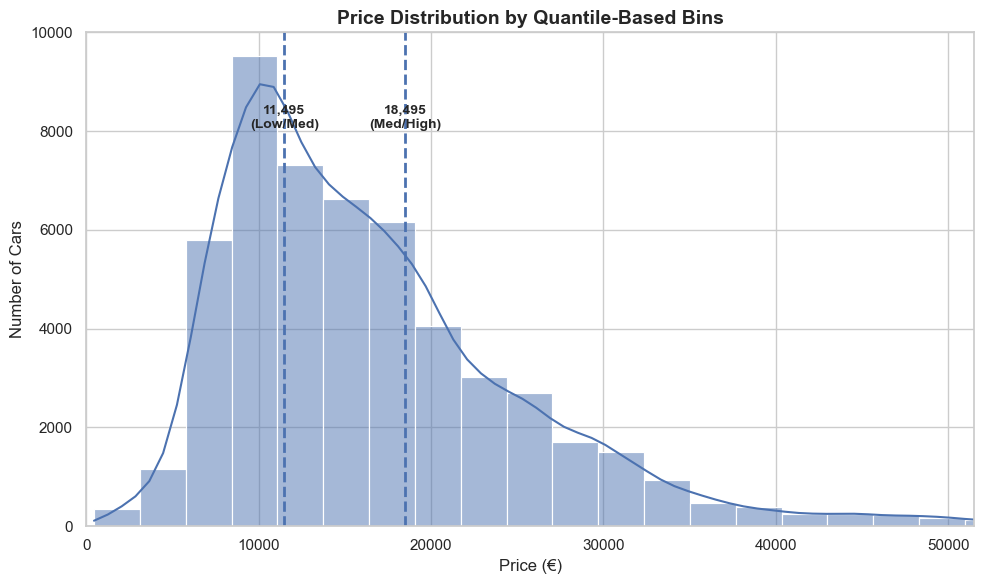

In [143]:
# Improved visualization of price distribution and quantile bins
plt.figure(figsize=(10, 6))

# limit x-axis to exclude extreme outliers (e.g., top 1%)
max_price = y_train.quantile(0.99)

sns.histplot(y_train, bins=60, kde=True)
plt.xlim(0, max_price)

# get quantile thresholds (only the boundaries between bins)
q1, q2 = y_train.quantile([1/3, 2/3])

# Add vertical lines for quantile boundaries (Low/Medium and Medium/High)
plt.axvline(q1, linestyle="--", linewidth=2)
plt.axvline(q2, linestyle="--", linewidth=2)

# Annotate thresholds (only if they are within the visible x-range)
y_pos = plt.ylim()[1] * 0.8
if q1 < max_price:
    plt.text(q1, y_pos, f"{int(q1):,}\n(Low/Med)", ha="center", va="bottom", fontsize=10, fontweight="bold")
if q2 < max_price:
    plt.text(q2, y_pos, f"{int(q2):,}\n(Med/High)", ha="center", va="bottom", fontsize=10, fontweight="bold")

# Titles and labels
plt.title("Price Distribution by Quantile-Based Bins", fontsize=14, weight="bold")
plt.xlabel("Price (€)", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.tight_layout()
plt.show()

The figure above displays the distribution of car prices in the training set, divided into three quantile-based categories. The dashed vertical lines indicate the thresholds that separate the “Low”, “Medium”, and “High” price segments. The distribution is right-skewed, meaning most cars are in the lower and medium price ranges, while a small number of luxury or premium cars reach much higher prices. This binning provides a balanced categorical representation of the target variable for the Chi-Square test.


Next, we defined the Chi-Square test function.

In [144]:
# Apply Chi-Square to each raw categorical feature (pre-OHE)

for feature in cat_vars:  # cat_vars comes from the previous block (filtered by existence in X_train_pre_ohe)
    chi2_test_feature(X_train_pre_ohe, feature, y_train_binned, alpha=0.05)


Brand is significantly associated with the target (p=p=0.00e+00) -> keep it
fuelType is significantly associated with the target (p=p=0.00e+00) -> keep it
transmission is significantly associated with the target (p=p=0.00e+00) -> keep it


From the Chi-Square independence tests, we can observe that all three categorical variables tested (`Brand`, `fuelType`, and `transmission`) show a statistically significant association with the binned target variable (price category), with extremely small p-values (reported as p≈0 due to numerical rounding). This indicates that the distribution of these categories differs across the “Low”, “Medium”, and “High” price segments, meaning they carry useful predictive information about car prices. Therefore, we retain these categorical features in the dataset and continue to represent them in the modelling stage through One-Hot Encoding.

<a class="anchor" id="414-visual-inspection-of-categorical-variables-vs-target">

### 4.1.4 Visually inspecting the weight of the dependent variable in categorical data 

</a>



Although the Chi-Square tests confirmed that the raw categorical variables (`Brand`, `fuelType`, and `transmission`) are statistically associated with the binned target, we also decided to perform a visual inspection to understand how the distribution of price categories (“Low”, “Medium”, “High”) varies across each categorical feature.

The Chi-Square test indicates whether an association exists, but it does not show the direction or how the price-bin proportions differ across categories. Therefore, we will plot absolute counts and normalized proportions of price bins for each categorical feature. This helps confirm interpretability and identify patterns such as certain categories being over-represented in higher price segments.

Important note: at this stage we will use the raw categorical features (pre-One-Hot Encoding) for visualization purposes only. No features are dropped based on these plots, as the final modelling dataset uses the encoded (dummy) representation consistently across train/validation/test.

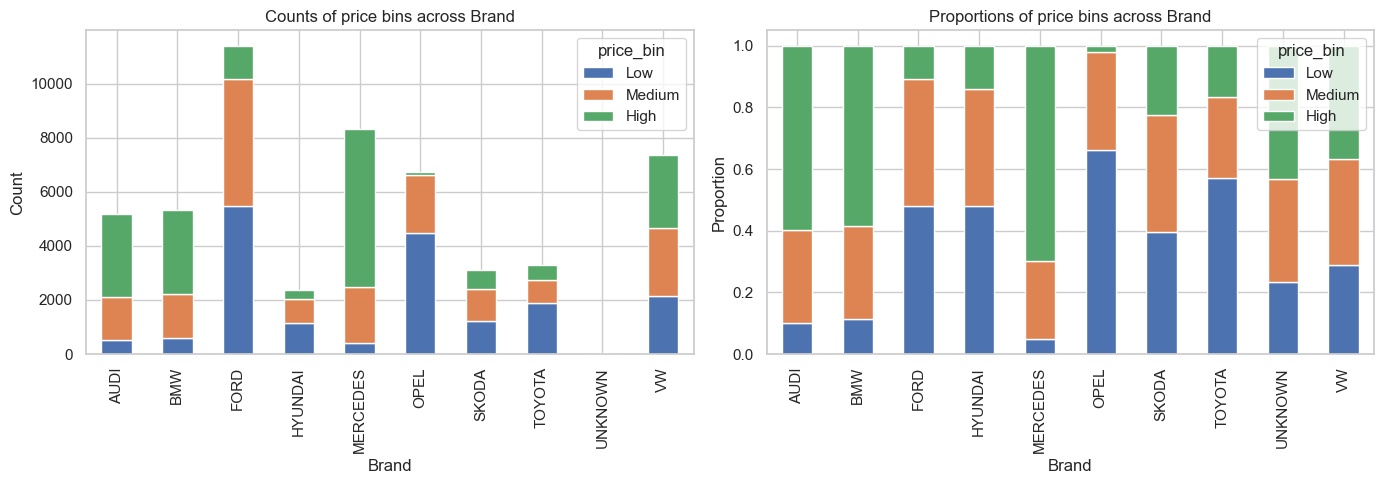

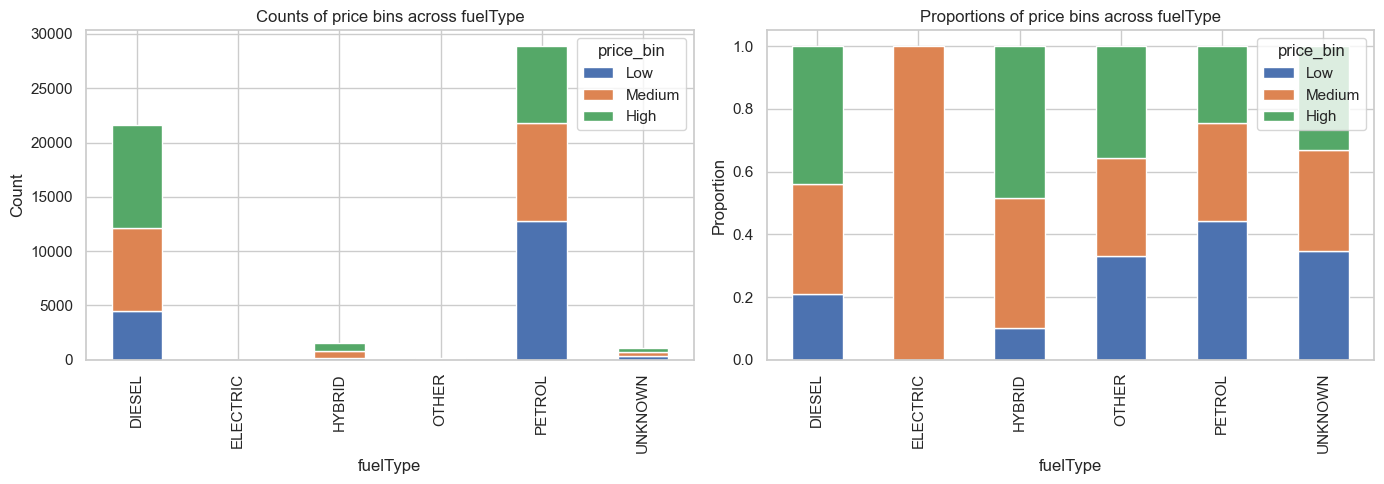

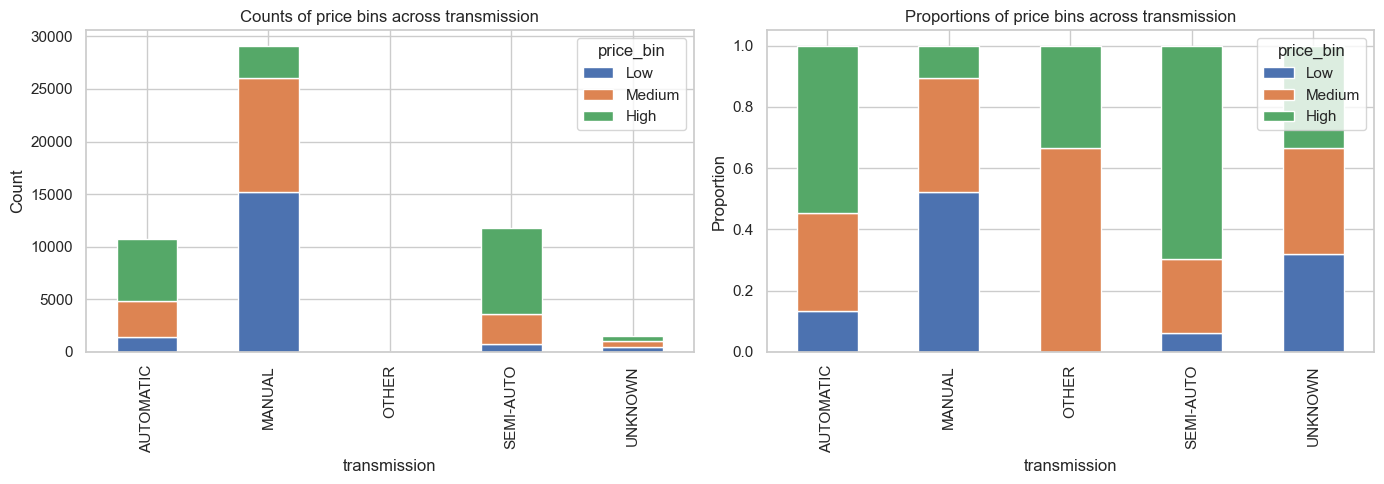

In [145]:
# Join raw categorical features (pre-OHE) and the binned target for visualization
all_train_vis = X_train_pre_ohe.copy()
all_train_vis["price_bin"] = y_train_binned

# Visualize each raw categorical feature (pre-OHE)
for feature in cat_vars:  # cat_vars = ["Brand", "fuelType", "transmission"] (filtered earlier if needed)
    plot_price_bin_by_category(all_train_vis, feature, target="price_bin", top_n=12)


The bar charts above show both the absolute counts and the normalized proportions of the binned target (“Low”, “Medium”, “High”) across each categorical variable. Overall, the plots confirm that `Brand`, `fuelType`, and `transmission` are meaningfully related to the price level, not only statistically (Chi-Square) but also in an interpretable way.

- **Brand**: there are strong shifts in the distribution of price bins across brands. Premium brands (e.g., BMW, MERCEDES, AUDI) concentrate a larger share of observations in the High bin, while more mainstream brands (e.g., FORD, HYUNDAI, OPEL) show higher proportions in Low/Medium bins. This indicates that brand information contributes substantially to separating price segments.

- **fuelType**: fuel types also display distinct profiles. For example, DIESEL and HYBRID show a higher share of High prices compared to PETROL, which is more concentrated in Low/Medium. Categories with very small sample sizes (e.g., ELECTRIC) may show extreme proportions and should be interpreted cautiously, but they still represent potentially meaningful signals.

- **transmission**: the distribution of price bins differs clearly between transmission types. SEMI-AUTO and AUTOMATIC exhibit a higher proportion of High prices, while MANUAL is more concentrated in Low/Medium, which is consistent with typical market positioning.

Finally, since these plots support the Chi-Square conclusion that the categorical information is relevant, we keep these variables in the modelling dataset (via their encoded representation). No features are removed based on this step; the goal here is interpretability and confirmation of practical relevance.

<a class="anchor" id="42-wrapper-methods">

### 4.2. Wrapper Methods
    
</a>

<a class="anchor" id="421-recursive-feature-elimination-rfe">

### 4.2.1.  RFE
    
</a>

We will now apply a wrapper method for feature selection, specifically **Recursive Feature Elimination** (RFE). Unlike filter methods, which rely only on statistical properties of the variables, wrapper methods use a predictive model to evaluate how useful each feature is for predicting the target.

RFE works by repeatedly fitting a model, ranking features by their importance (here, based on the model’s coefficients), and removing the least important ones until a predefined number of features remains.

Since some of our predictors are correlated and we want a more stable coefficient-based ranking, we use a Ridge regression model as the estimator (instead of plain Linear Regression). 

In [146]:
# Define base model: Ridge
model = Ridge(random_state=29)

# Create RFE instance (temporary number of features; optimal n is handled later)
rfe = RFE(estimator=model, n_features_to_select=8, step=1)

# Fit ONLY on training data (hold-out setup)
rfe.fit(X_train, y_train)

# Selected features mask (True = kept)
selected_mask = rfe.support_

# Print selected features
selected_features = pd.Series(selected_mask, index=X_train.columns)
print("RFE selected features:\n")
print(selected_features[selected_features].index.tolist())

# Print feature rankings (1 = selected)
print("\nFeature rankings (1 = selected):")
print(pd.Series(rfe.ranking_, index=X_train.columns).sort_values())


RFE selected features:

['mileage', 'mpg', 'engineSize', 'car_age', 'brand_model_avg_price', 'km_semielasticity_10k', 'fuelType_HYBRID', 'model_freq']

Feature rankings (1 = selected):
mileage                    1
mpg                        1
engineSize                 1
car_age                    1
km_semielasticity_10k      1
brand_model_avg_price      1
model_freq                 1
fuelType_HYBRID            1
fuelType_OTHER             2
tax                        3
fuelType_PETROL            4
transmission_MANUAL        5
Brand_OPEL                 6
Brand_TOYOTA               7
Brand_HYUNDAI              8
fuelType_UNKNOWN           9
fuelType_ELECTRIC         10
Brand_SKODA               11
Brand_MERCEDES            12
Brand_BMW                 13
Brand_VW                  14
transmission_OTHER        15
transmission_SEMI-AUTO    16
Brand_UNKNOWN             17
transmission_UNKNOWN      18
Brand_FORD                19
previousOwners            20
dtype: int64


In our initial run, we set RFE to retain 8 features, resulting in the following selected subset: `mileage`, `mpg`, `engineSize`, `car_age`, `brand_model_avg_price`, `km_semielasticity_10k`, `fuelType_HYBRID`, and `model_freq`. These variables capture key dimensions of car valuation, including usage and age effects, physical specifications, market positioning, depreciation behaviour, fuel-type differences, and model popularity.

Beyond this fixed 8-feature solution, we then evaluated different numbers of retained features (n = 1 … p) using our hold-out validation set, computing performance metrics for each value of n. This allows us to identify a feature count that balances predictive performance and model simplicity, rather than relying only on an arbitrary cut-off.

Variables that receive higher (worse) RFE rankings—such as some individual brand/transmission dummies and previousOwners—show weaker linear contribution in this linear-estimator setting and may be either less informative or better captured through non-linear models.

In [147]:
# Determine the "best" number of features using the hold-out validation set
nof_list = np.arange(1, len(X_train.columns) + 1)

train_score_list = []
val_score_list = []

for n in nof_list:
    model = LinearRegression()
    rfe = RFE(estimator=model, n_features_to_select=int(n))  # n must be int

    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_val_rfe   = rfe.transform(X_val)

    model.fit(X_train_rfe, y_train)

    train_r2 = model.score(X_train_rfe, y_train)
    val_r2   = model.score(X_val_rfe, y_val)

    train_score_list.append(train_r2)
    val_score_list.append(val_r2)

# Pick the smallest n within 1% of the best validation R² (more robust than chasing the absolute max)
best_val_r2 = max(val_score_list)
threshold = best_val_r2 - 0.01 * abs(best_val_r2)

best_n = None
for n, val_r2 in zip(nof_list, val_score_list):
    if val_r2 >= threshold:
        best_n = int(n)
        break

print(f"Best validation R²: {best_val_r2:.4f}")
print(f"Chosen number of features (smallest within 1% of best): {best_n}")

Best validation R²: 0.8001
Chosen number of features (smallest within 1% of best): 11


After evaluating RFE across different numbers of selected features using our hold-out validation set, we now visualise how performance changes as model complexity increases. The plot below compares training and validation R² across the tested feature counts, helping us confirm whether performance stabilises and to justify the chosen number of features.


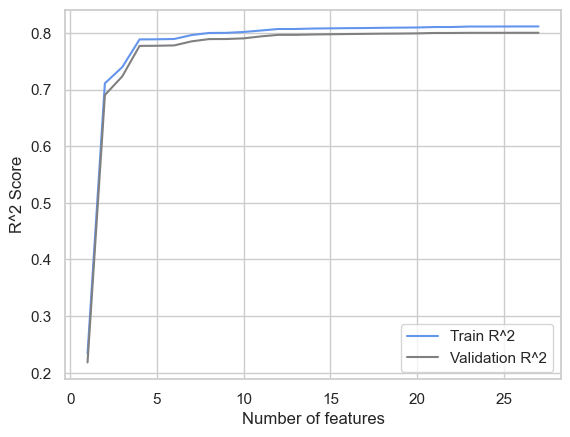

In [148]:
# Plot of train and validation R^2 across tested feature counts

plt.plot(nof_list, train_score_list, label="Train R^2", color='cornflowerblue')
plt.plot(nof_list, val_score_list, label="Validation R^2", color='gray')
plt.xlabel("Number of features")
plt.ylabel("R^2 Score")
plt.legend()
plt.show()

The learning curves show a steep improvement in both training and validation R-squared when increasing the number of selected features from very small subsets, followed by a clear plateau. After roughly 8–12 features, the validation R-squared stabilises and additional variables yield only marginal gains, while the training curve continues to increase slightly. To avoid unnecessary model complexity, we therefore select the smallest number of features whose validation performance is within 1% of the best observed value, resulting in 11 selected features.

Now we shall do the same for the RMSE:

In [149]:
# Determine the "best" number of features using the hold-out validation set (RMSE)
nof_list = np.arange(1, len(X_train.columns) + 1)

train_rmse_list = []
val_rmse_list = []

for n in nof_list:
    model = LinearRegression()
    rfe = RFE(estimator=model, n_features_to_select=int(n))

    # Fit on TRAIN, transform TRAIN/VAL
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_val_rfe   = rfe.transform(X_val)

    model.fit(X_train_rfe, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_rfe)
    y_val_pred   = model.predict(X_val_rfe)

    # RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse   = np.sqrt(mean_squared_error(y_val, y_val_pred))

    train_rmse_list.append(train_rmse)
    val_rmse_list.append(val_rmse)

# Best (lowest) validation RMSE
best_val_rmse = min(val_rmse_list)

# Pick the smallest n within 1% of the best validation RMSE (more robust than chasing the absolute min)
threshold = best_val_rmse * 1.01

best_n = None
for n, rmse in zip(nof_list, val_rmse_list):
    if rmse <= threshold:
        best_n = int(n)
        break

print(f"Best validation RMSE: {best_val_rmse:.4f}")
print(f"Chosen number of features (smallest within 1% of best): {best_n}")


Best validation RMSE: 4355.7864
Chosen number of features (smallest within 1% of best): 12


We selected the number of RFE features based on RMSE. Although the minimum validation RMSE was 4355.79, we adopted a robustness rule and chose the smallest subset within 1% of this best score. This yields 12 features, providing a more parsimonious model with virtually the same predictive performance on the validation set.

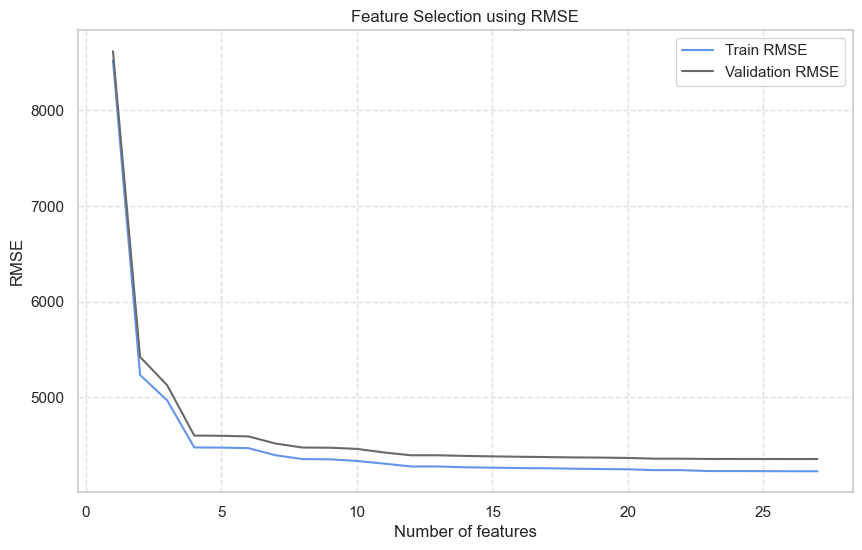

In [150]:
# Plotting the RMSE
plt.figure(figsize=(10, 6))
plt.plot(nof_list, train_rmse_list, label="Train RMSE", color='cornflowerblue')
plt.plot(nof_list, val_rmse_list, label="Validation RMSE", color='dimgray')
plt.xlabel("Number of features")
plt.ylabel("RMSE")
plt.title("Feature Selection using RMSE")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

The RMSE decreases sharply when moving from 1 to around 4–6 selected features, indicating that the most important predictors capture most of the signal. After roughly 7–12 features, the validation RMSE stabilises and additional variables provide only marginal improvements. The training RMSE remains slightly lower than the validation RMSE, as expected, but the gap stays small and stable, suggesting limited overfitting. Therefore, we select 12 features (smallest number within 1% of the best validation RMSE) to balance predictive performance and model simplicity.

<a class="anchor" id="43-embedded-methods">

### 4.3. Embedded Methods
    
</a>

<a class="anchor" id="431-lasso-regression">

### 4.3.1. Lasso Regression
    
</a>

We next apply an embedded feature selection method using Lasso regression (L1 regularization). Unlike filter and wrapper approaches, Lasso performs feature selection during model fitting by shrinking less useful coefficients toward zero. Features whose coefficients become (near) zero can be considered less relevant for a linear predictive relationship.

We tune the regularization strength (alpha) by fitting Lasso models across a grid of alpha values and evaluating the RMSE on the validation set. To avoid choosing an overly complex model for a marginal gain, we adopt a robustness rule. We select the smallest model (fewest non-zero coefficients) whose validation RMSE is within 1% of the best observed value.

In [151]:
# Try multiple alphas (hold-out validation)
alphas = np.logspace(-4, 1, 60)  # adjust range if needed

train_rmse_list = []
val_rmse_list = []
nnz_list = []

for a in alphas:
    model = Lasso(alpha=float(a), max_iter=20000, random_state=42)
    model.fit(X_train, y_train)

    yhat_train = model.predict(X_train)
    yhat_val = model.predict(X_val)

    train_rmse = np.sqrt(mean_squared_error(y_train, yhat_train))
    val_rmse = np.sqrt(mean_squared_error(y_val, yhat_val))

    train_rmse_list.append(train_rmse)
    val_rmse_list.append(val_rmse)
    nnz_list.append(int(np.sum(np.abs(model.coef_) > 1e-8)))  # non-zero-ish coeffs

best_idx = int(np.argmin(val_rmse_list))
best_val_rmse = float(val_rmse_list[best_idx])

# Robust choice: smallest model within 1% of best validation RMSE
threshold = best_val_rmse * 1.01
candidate_idx = [i for i, rmse in enumerate(val_rmse_list) if rmse <= threshold]

chosen_idx = min(candidate_idx, key=lambda i: (nnz_list[i], val_rmse_list[i]))
chosen_alpha = float(alphas[chosen_idx])

print(f"Best validation RMSE: {best_val_rmse:.4f} (alpha={float(alphas[best_idx]):.6f})")
print(f"Chosen alpha (smallest within 1% of best): {chosen_alpha:.6f}")
print(f"Chosen non-zero coeffs: {nnz_list[chosen_idx]}")

# Fit final Lasso with chosen alpha and extract selected features
lasso = Lasso(alpha=chosen_alpha, max_iter=20000, random_state=42)
lasso.fit(X_train, y_train)

lasso_coef = pd.Series(lasso.coef_, index=X_train.columns)
selected_features_lasso = lasso_coef[lasso_coef.abs() > 1e-8].index.tolist()

print(f"\nOriginal feature count: {X_train.shape[1]}")
print(f"Features kept by Lasso: {len(selected_features_lasso)}")
print(f"Features removed (zeroed): {X_train.shape[1] - len(selected_features_lasso)}")

Best validation RMSE: 4356.0200 (alpha=0.112421)
Chosen alpha (smallest within 1% of best): 10.000000
Chosen non-zero coeffs: 19

Original feature count: 27
Features kept by Lasso: 19
Features removed (zeroed): 8


The Lasso hold-out tuning achieved a best validation RMSE of 4356.02 at alpha ≈ 0.112. Applying the “within 1% of best” rule, we select an alpha that yields a more parsimonious solution without materially degrading validation performance.

With the chosen configuration, the model retains 19 out of 27 features (and effectively removes 8 features by shrinking their coefficients to ~0). This indicates that, under a linear modeling assumption, a subset of predictors captures most of the signal, while the removed variables contribute limited additional explanatory power once the retained features are present.

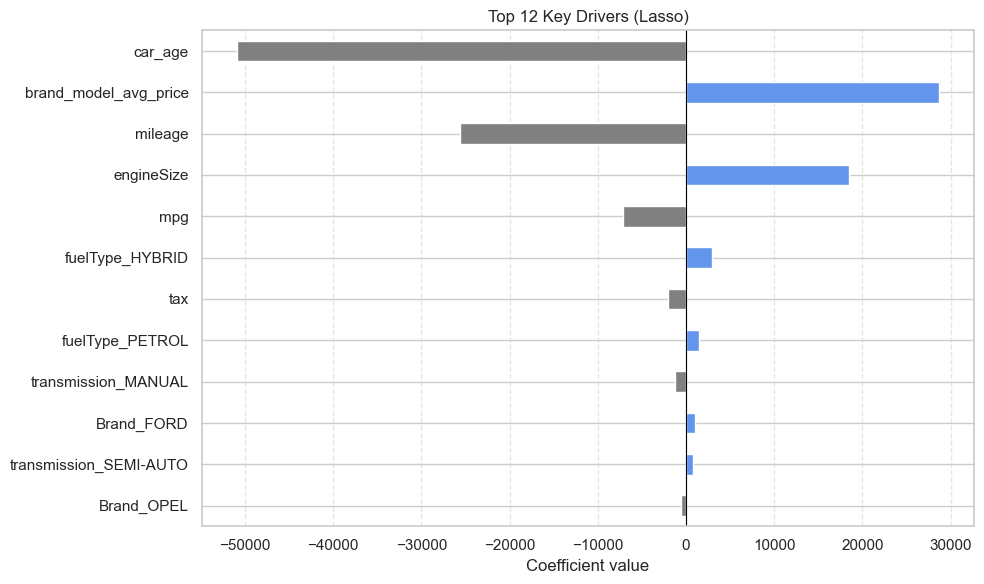

In [152]:
# Plot the largest Lasso coefficients (with sign-based colors)
top_k = 12

# Keep only non-zero-ish coefficients (same threshold used before)
active_coefs = lasso_coef[lasso_coef.abs() > 1e-8].copy()

# Pick top-k by absolute magnitude
top_indices = active_coefs.abs().sort_values(ascending=False).head(top_k).index
top_coefs = active_coefs.loc[top_indices]

# Sort for plotting (largest magnitude at the top)
top_plot = top_coefs.reindex(top_coefs.abs().sort_values().index)

plt.figure(figsize=(10, 6))

# Same colors as before: blue = positive, grey = negative
colors = ["grey" if x < 0 else "cornflowerblue" for x in top_plot.values]

top_plot.plot(kind="barh", color=colors)

plt.title(f"Top {top_k} Key Drivers (Lasso)")
plt.xlabel("Coefficient value")
plt.axvline(x=0, color="black", linewidth=0.8)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

- `brand_model_avg_price` has the largest positive coefficient → higher “typical brand/model price level” strongly pushes the predicted price up.

- `car_age` is the largest negative coefficient → older cars are predicted to be much cheaper (age is a major depreciation signal).

- `mileage` is clearly negative and sizeable → more kilometres driven reduces predicted price, even after controlling for age/other factors.

- `engineSize` is a large positive coefficient → bigger engines are associated with higher prices in this dataset.

- `mpg` appears negative here → after accounting for the other variables, higher mpg is associated with slightly lower prices (often because higher mpg correlates with smaller/cheaper cars; sign can flip once other variables are included).

- `fuelType_HYBRID` is positive → hybrids tend to be priced higher than the baseline fuel category.

- `fuelType_PETROL` is slightly positive → small uplift vs the baseline (effect is minor compared to age/mileage/engine).

- `tax` is slightly negative → it has a small impact relative to the big predictors.

- `transmission_MANUAL`, `transmission_SEMI-AUTO`, `Brand_FORD`, `Brand_OPEL` have very small coefficients → they add limited incremental linear signal once the stronger variables are in.

Overall takeaway: age + mileage + engine size + brand/model price level carry most of the predictive power; the remaining categorical dummies mainly fine-tune the prediction.

<a class="anchor" id="44-feature-selection-conclusion">

### 4.4 Feature selection conclusion
    
    

Objective: Reduce dimensionality and remove redundant/noisy predictors, while preserving predictive performance under a hold-out (train/validation) setup.

We combined wrapper (RFE) and embedded (Lasso) feature selection to balance performance and interpretability.

All selection decisions were made using only the training set, and evaluated on the validation set.

RFE findings (wrapper method).

- Using the hold-out validation curve, performance improved sharply for small feature counts and then plateaued.

- A robustness rule (“smallest subset within 1% of best validation score”) suggested ~11 features (R²) and ~12 features (RMSE), indicating that adding features beyond this range yields only marginal gains.

Lasso findings (embedded method).

- We tuned the regularisation strength (alpha) on the validation set and selected a robust alpha within 1% of the best validation RMSE.

- Lasso set several coefficients to (near) zero, identifying a smaller set of informative predictors and reducing noise.

Final decision and rationale.

- We selected the Top 12 features from Lasso (highest absolute coefficients among the non-zero terms).

- This choice aligns with the RFE RMSE result (12 features) and provides a clear, model-driven ranking of importance.

- The final subset offers a parsimonious representation of the data with negligible loss in validation performance, improving interpretability and reducing the risk of overfitting.

Implementation notes.

- The final selected feature list is applied consistently to X_train, X_val, and X_test (same columns, same order).

In [153]:
selected_features_final = [
    "car_age",
    "brand_model_avg_price",
    "mileage",
    "engineSize",
    "mpg",
    "fuelType_HYBRID",
    "tax",
    "fuelType_PETROL",
    "transmission_MANUAL",
    "Brand_FORD",
    "transmission_SEMI-AUTO",
    "Brand_OPEL"
]

#### Applying to train

In [154]:
selected_train = [c for c in selected_features_final if c in X_train.columns]
dropped_train = sorted(list(set(X_train.columns) - set(selected_train)))

X_train = X_train[selected_train].copy()

print("===== FEATURE SELECTION APPLIED: X_train =====")
print(f"Dropped: {len(dropped_train)} | Kept: {X_train.shape[1]}")
print("Kept features:", list(X_train.columns))
print("Dropped features:", dropped_train)

===== FEATURE SELECTION APPLIED: X_train =====
Dropped: 15 | Kept: 12
Kept features: ['car_age', 'brand_model_avg_price', 'mileage', 'engineSize', 'mpg', 'fuelType_HYBRID', 'tax', 'fuelType_PETROL', 'transmission_MANUAL', 'Brand_FORD', 'transmission_SEMI-AUTO', 'Brand_OPEL']
Dropped features: ['Brand_BMW', 'Brand_HYUNDAI', 'Brand_MERCEDES', 'Brand_SKODA', 'Brand_TOYOTA', 'Brand_UNKNOWN', 'Brand_VW', 'fuelType_ELECTRIC', 'fuelType_OTHER', 'fuelType_UNKNOWN', 'km_semielasticity_10k', 'model_freq', 'previousOwners', 'transmission_OTHER', 'transmission_UNKNOWN']


#### Applying to validation

In [155]:
selected_val = [c for c in selected_features_final if c in X_val.columns]
dropped_val = sorted(list(set(X_val.columns) - set(selected_val)))

X_val = X_val[selected_val].copy()

print("===== FEATURE SELECTION APPLIED: X_val =====")
print(f"Dropped: {len(dropped_val)} | Kept: {X_val.shape[1]}")
print("Kept features:", list(X_val.columns))
print("Dropped features:", dropped_val)

===== FEATURE SELECTION APPLIED: X_val =====
Dropped: 15 | Kept: 12
Kept features: ['car_age', 'brand_model_avg_price', 'mileage', 'engineSize', 'mpg', 'fuelType_HYBRID', 'tax', 'fuelType_PETROL', 'transmission_MANUAL', 'Brand_FORD', 'transmission_SEMI-AUTO', 'Brand_OPEL']
Dropped features: ['Brand_BMW', 'Brand_HYUNDAI', 'Brand_MERCEDES', 'Brand_SKODA', 'Brand_TOYOTA', 'Brand_UNKNOWN', 'Brand_VW', 'fuelType_ELECTRIC', 'fuelType_OTHER', 'fuelType_UNKNOWN', 'km_semielasticity_10k', 'model_freq', 'previousOwners', 'transmission_OTHER', 'transmission_UNKNOWN']


<a class="anchor" id="45-repeating-for-the-test-dataset">

### 4.5. Applying To The Test Dataset
    
</a>

In [156]:
selected_test = [c for c in selected_features_final if c in X_test.columns]
dropped_test = sorted(list(set(X_test.columns) - set(selected_test)))

X_test = X_test[selected_test].copy()

print("===== FEATURE SELECTION APPLIED: X_test =====")
print(f"Dropped: {len(dropped_test)} | Kept: {X_test.shape[1]}")
print("Kept features:", list(X_test.columns))
print("Dropped features:", dropped_test)

===== FEATURE SELECTION APPLIED: X_test =====
Dropped: 17 | Kept: 12
Kept features: ['car_age', 'brand_model_avg_price', 'mileage', 'engineSize', 'mpg', 'fuelType_HYBRID', 'tax', 'fuelType_PETROL', 'transmission_MANUAL', 'Brand_FORD', 'transmission_SEMI-AUTO', 'Brand_OPEL']
Dropped features: ['Brand_BMW', 'Brand_HYUNDAI', 'Brand_MERCEDES', 'Brand_SKODA', 'Brand_TOYOTA', 'Brand_UNKNOWN', 'Brand_VW', 'expected_km_discount_pct', 'fuelType_ELECTRIC', 'fuelType_OTHER', 'fuelType_UNKNOWN', 'km_semielasticity_10k', 'model_freq', 'previousOwners', 'transmission_OTHER', 'transmission_UNKNOWN', 'year']





<div class="alert alert-block alert-success">

<a class="anchor" id="5-modelling-and-evaluation">    </a>
## 5. Modelling and evaluation
    

    
</div>

For most of our models, we trained using a log-transformed target instead of the raw price values.

Car prices are highly right-skewed (a small number of very expensive cars), which can make models focus too much on large absolute errors in the high-price range. By applying log1p, we compress extreme values, reduce heteroscedasticity (non-constant error variance), and make the learning problem closer to “predicting relative differences” rather than only large absolute price gaps.

After predicting in log-scale, we convert predictions back to euros using expm1 so that all reported results remain on the original price scale.

In [157]:
# Log-transform the target
y_train_log = np.log1p(y_train)

<a class="anchor" id="51-Initial-Modelling-and-Evaluation-Without-Tuning">

### 5.1. Initial Modelling and Evaluation Without tuning
    
</a>

<a class="anchor" id="511-linear-regression-ols-baseline">

### 5.1.1. Linear Models and Regularization
    
</a>

## Linear Regression and OLS

We decided to start by doing a ***Linear Regression*** model. Linear Regression is a clear and simple baseline. It combines our features to estimate a price. It trains fast and lets us measure performance with MAE (main metric, in pounds), RMSE, and $R^2$. This baseline helps us check data quality and set a reference before trying more complex models.

In [158]:
# Fit Linear Regression model
lin_model_log = LinearRegression()
lin_model_log.fit(X_train, y_train_log)

# Predictions
y_pred_lin_train = np.expm1(lin_model_log.predict(X_train))
y_pred_lin_val = np.expm1(lin_model_log.predict(X_val))

# Metrics
p = X_train.shape[1]
lin_train_metrics = all_regression_metrics(y_true=y_train, y_pred=y_pred_lin_train, p_features=p)
lin_val_metrics = all_regression_metrics(y_true=y_val,   y_pred=y_pred_lin_val,   p_features=p)

pretty_print_metrics("Linear Regression Results (Log-Transformed) (7 metrics)", lin_train_metrics, lin_val_metrics)



Linear Regression Results (Log-Transformed) (7 metrics)
-------------------------------------------------------
Train -> R2: 0.8444, Adj_R2: 0.8444, MAE: 2239.7580, MSE: 14744939.6523, RMSE: 3839.9140, MedAE: 1403.6209, MAPE: 0.1325
Valid -> R2: 0.8378, Adj_R2: 0.8377, MAE: 2248.9746, MSE: 15400340.6301, RMSE: 3924.3268, MedAE: 1410.6161, MAPE: 0.1325


On the training set, the log-transformed Linear Regression achieves $R^2$ = 0.8444, and on the validation set it reaches $R^2$ = 0.8378. In terms of error, the validation MAE is €2,248.97 and the validation RMSE is €3,924.33. The train–validation gap is very small (MAE: €2,239.76 vs €2,248.97; RMSE: €3,839.91 vs €3,924.33), suggesting good generalisation and limited overfitting. Even so, the remaining error indicates that a purely linear specification still misses some of the more complex (non-linear) price patterns, which supports exploring more flexible models later.

In [159]:
# OLS diagnostics (statsmodels) on log target
X_train_sm = sm.add_constant(X_train, has_constant="add")
ols_model_log = sm.OLS(y_train_log, X_train_sm).fit()
print(ols_model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                 3.486e+04
Date:                Sun, 14 Dec 2025   Prob (F-statistic):               0.00
Time:                        17:05:28   Log-Likelihood:                 15972.
No. Observations:               53178   AIC:                        -3.192e+04
Df Residuals:                   53165   BIC:                        -3.180e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

To complement the baseline, we fitted an OLS model on the training split to inspect statistical significance and coefficient behaviour. The OLS summary reports a strong in-sample fit ($R^2 = 0.887$, adjusted $R^2 = 0.887$) and shows that nearly all predictors are highly significant (p-values ≈ 0.000), confirming that they add meaningful linear signal. The coefficient signs are also intuitive: car_age and mileage have negative effects (depreciation with age/usage), while brand_model_avg_price, engineSize, fuelType_HYBRID, transmission_SEMI-AUTO, and Brand_FORD are associated with higher prices; mpg, fuelType_PETROL, transmission_MANUAL, and Brand_OPEL are associated with lower prices, holding other variables constant. One exception is tax, which is not statistically significant here (p = 0.813), suggesting it adds little incremental explanatory power once the other features are included. Finally, the diagnostics (e.g., very large Omnibus/JB with p≈0) indicate residuals are not perfectly well-behaved, reinforcing that OLS is mainly used for interpretability rather than as the final predictive model.

## Ridge Regression

Ridge is a linear regression model with L2 regularization. Instead of only minimizing prediction error, it also penalizes large coefficients, which can make the model more stable under multicollinearity (highly correlated predictors).

In [160]:
# Ridge Regression Model
ridge_model_log = Ridge(alpha=1.0)
ridge_model_log.fit(X_train, y_train_log)

#predictions
y_pred_ridge_train = np.expm1(ridge_model_log.predict(X_train))
y_pred_ridge_val   = np.expm1(ridge_model_log.predict(X_val))

#metrics
p = X_train.shape[1]
ridge_train_metrics = all_regression_metrics(y_true=y_train, y_pred=y_pred_ridge_train, p_features=p)
ridge_val_metrics   = all_regression_metrics(y_true=y_val,   y_pred=y_pred_ridge_val,   p_features=p)

pretty_print_metrics("Ridge Regression Results (Log-Transformed) (7 metrics)", ridge_train_metrics, ridge_val_metrics)


Ridge Regression Results (Log-Transformed) (7 metrics)
------------------------------------------------------
Train -> R2: 0.8444, Adj_R2: 0.8444, MAE: 2240.6584, MSE: 14740293.4923, RMSE: 3839.3090, MedAE: 1406.8658, MAPE: 0.1327
Valid -> R2: 0.8378, Adj_R2: 0.8377, MAE: 2250.0928, MSE: 15400660.0247, RMSE: 3924.3675, MedAE: 1412.3248, MAPE: 0.1327


- $R^2$ is 0.8444 (train) and 0.8378 (validation) → very similar to the log-transformed Linear Regression baseline, so Ridge does not materially change overall fit here.

- **MAE** is 2240.66 (train) vs 2250.09 (validation) → small generalization gap, suggesting stable performance.

- **RMSE** is 3839.31 (train) vs 3924.37 (validation) → again close between splits, with no strong indication of overfitting.

Overall, Ridge behaves almost identically to the (log-target) Linear Regression in this setup. With the default alpha = 1.0, regularization does not bring a clear performance gain, but it remains a solid and more numerically stable linear baseline.

## Lasso Regression

Lasso is linear regression with L1 regularization. The key difference is that L1 can drive some coefficients to exactly zero, effectively doing feature selection (sparser model). For Lasso regression the log results were very worse so we decided to implement it in the original scale.

In [161]:
# Lasso Model
lasso_model = Lasso(alpha=1.0, max_iter=10_000)
lasso_model.fit(X_train, y_train)

#predictions
y_pred_lasso_train = lasso_model.predict(X_train)
y_pred_lasso_val = lasso_model.predict(X_val)

#metrics
p = X_train.shape[1]
lasso_train_metrics = all_regression_metrics(y_train, y_pred_lasso_train, p)
lasso_val_metrics = all_regression_metrics(y_val, y_pred_lasso_val,   p)

pretty_print_metrics("Lasso Regression Results (7 metrics)",
                     lasso_train_metrics, lasso_val_metrics)


Lasso Regression Results (7 metrics)
------------------------------------
Train -> R2: 0.8096, Adj_R2: 0.8096, MAE: 2660.7583, MSE: 18040113.2401, RMSE: 4247.3654, MedAE: 1852.5811, MAPE: 0.1969
Valid -> R2: 0.7984, Adj_R2: 0.7983, MAE: 2671.2133, MSE: 19136893.4026, RMSE: 4374.5735, MedAE: 1845.5632, MAPE: 0.1981


- $R^2$ is 0.8096 (train) and 0.7984 (val) → basically identical to Ridge/LR here.

- **MAE** is 2660.8 (train) and 2671.2 (val) → marginally better than Ridge by a tiny amount (difference is negligible in practice).

- **RMSE** is 4247.4 (train) and 4374.6 (val) → essentially unchanged.

With alpha=1.0, Lasso performs almost the same as Ridge/LR, so the value of Lasso here is mainly interpretability / sparsity, not accuracy.

## Elastic Net Regression

Elastic Net combines L1 + L2 regularization (controlled by l1_ratio).It can keep Ridge-like stability while still allowing Lasso-like sparsity. For Elastic Net regression the log results were very worse so we decided to implement it in the original scale.

In [162]:
# Elastic Model
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10_000)
elastic_model.fit(X_train, y_train)

#predictions
y_pred_elastic_train = elastic_model.predict(X_train)
y_pred_elastic_val = elastic_model.predict(X_val)

#metrics
p = X_train.shape[1]
elastic_train_metrics = all_regression_metrics(y_train, y_pred_elastic_train, p)
elastic_val_metrics = all_regression_metrics(y_val, y_pred_elastic_val,   p)

pretty_print_metrics("Elastic Net Regression Results (7 metrics)",
                     elastic_train_metrics, elastic_val_metrics)


Elastic Net Regression Results (7 metrics)
------------------------------------------
Train -> R2: 0.2800, Adj_R2: 0.2799, MAE: 5712.6619, MSE: 68220994.2974, RMSE: 8259.6001, MedAE: 4549.9649, MAPE: 0.4520
Valid -> R2: 0.2754, Adj_R2: 0.2750, MAE: 5654.7342, MSE: 68787222.4755, RMSE: 8293.8063, MedAE: 4489.6019, MAPE: 0.4442


- $R^2$ drops to 0.2800 (train) and 0.2754 (val) → a big degradation compared to LR/Ridge/Lasso.

- **MAE** jumps to 5712.7 (train) and 5654.7 (val) → much worse.

- **RMSE** is 8259.6 (train) and 8293.8 (val) → also much worse.

With these default hyperparameters, Elastic Net is over-regularizing, so it underfits heavily. 

<a class="anchor" id="52-non-linear-models-instance-based">

### 5.1.2.  Non-linear Models – Instance-based
    
</a>

While our linear models (Lasso/Ridge) provided a solid baseline, assuming a strictly linear relationship for car pricing is a significant simplification. In the real market, depreciation is rarely constant—it tends to be steep in the first few years and plateaus later. Furthermore, specific combinations of features might behave differently than the sum of their parts.

To capture these non-linear dynamics without immediately jumping to complex ensembles, we introduce a distance-based learner (KNN).

## K-Nearest Neighbors (KNN)


The K-Nearest Neighbors algorithm operates on a principle similar to how a human appraiser might value a car: by looking for "comparables" in the market. Instead of learning a global equation, the model identifies the $k$ vehicles in our training set that are most similar to the target car (in terms of age, mileage, power, etc.) and averages their prices.

- **KNN hyperparameter exploration (number of neighbors):**

Before fixing a KNN configuration, we explored the effect of the number of neighbors $k$ on model performance. We trained a sequence of KNN regressors with $k$∈{1,…,20} and, for each model, computed the Mean Absolute Error (MAE) on both the training and validation sets.

This simple validation-based search allows us to identify the value of $k$ that minimises the validation MAE and inspect the gap between train and validation errors to detect potential overfitting. We then plotted train and validation MAE as a function of $k$ to visualise the bias–variance trade-off and select a reasonable value for the number of neighbors.

Number of neighbors: 1
Train MAE: 21.110
Valid MAE: 1725.079
Difference train vs validation: 1703.968
---------------
Number of neighbors: 2
Train MAE: 851.248
Valid MAE: 1591.301
Difference train vs validation: 740.053
---------------
Number of neighbors: 3
Train MAE: 1042.675
Valid MAE: 1555.040
Difference train vs validation: 512.365
---------------
Number of neighbors: 4
Train MAE: 1143.859
Valid MAE: 1541.542
Difference train vs validation: 397.683
---------------
Number of neighbors: 5
Train MAE: 1218.274
Valid MAE: 1552.924
Difference train vs validation: 334.650
---------------
Number of neighbors: 6
Train MAE: 1274.220
Valid MAE: 1562.896
Difference train vs validation: 288.676
---------------
Number of neighbors: 7
Train MAE: 1319.421
Valid MAE: 1574.689
Difference train vs validation: 255.268
---------------
Number of neighbors: 8
Train MAE: 1357.007
Valid MAE: 1592.946
Difference train vs validation: 235.939
---------------
Number of neighbors: 9
Train MAE: 1389.900
Valid M

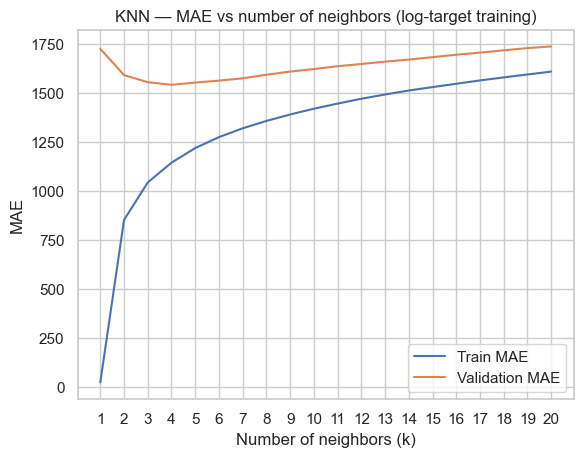

In [163]:
# Simple search over k (1–20) using validation MAE
k_values = range(1, 21)
best_k = None
best_mae_val = np.inf
mae_train_list, mae_val_list = [], []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train_log)

    y_train_pred = np.expm1(knn.predict(X_train))
    y_val_pred = np.expm1(knn.predict(X_val))

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val,   y_val_pred)

    mae_train_list.append(mae_train)
    mae_val_list.append(mae_val)

    if mae_val < best_mae_val:
        best_mae_val = mae_val
        best_k = k

for k, tr, va in zip(k_values, mae_train_list, mae_val_list):
    print(f"Number of neighbors: {k}")
    print(f"Train MAE: {tr:.3f}")
    print(f"Valid MAE: {va:.3f}")
    print(f"Difference train vs validation: {va - tr:.3f}")
    print("---------------")

print(f"\nBest k based on validation MAE: {best_k} (MAE = {best_mae_val:.2f})")

plt.figure()
plt.plot(list(k_values), mae_train_list, label="Train MAE")
plt.plot(list(k_values), mae_val_list, label="Validation MAE")
plt.xticks(list(k_values))
plt.xlabel("Number of neighbors (k)")
plt.ylabel("MAE")
plt.title("KNN — MAE vs number of neighbors (log-target training)")
plt.legend()
plt.show()

**Final KNN model with the selected number of neighbors**: We selected $k$ = 4 because it achieves the lowest validation MAE (1541.54) among the tested values ($k$=1…20). Although the train–validation gap continues to decrease for larger $k$, the validation MAE starts to increase after $k$=4, indicating loss of predictive accuracy on unseen data. Therefore, $k$=4 provides the best accuracy on the hold-out set.

In [164]:
# initialize KNN with the tuned number of neighbors
knn_model_log = KNeighborsRegressor(n_neighbors=best_k)

# train
knn_model_log.fit(X_train, y_train_log)

# predict on train and validation sets
y_pred_knn_train = np.expm1(knn_model_log.predict(X_train))
y_pred_knn_val   = np.expm1(knn_model_log.predict(X_val))

# use the helper function to compute all regression metrics
p = X_train.shape[1]
knn_train_metrics = all_regression_metrics(y_true=y_train, y_pred=y_pred_knn_train, p_features=p)
knn_val_metrics   = all_regression_metrics(y_true=y_val,   y_pred=y_pred_knn_val,   p_features=p)

pretty_print_metrics(f"KNN, k={best_k} (Log-Transformed) (7 metrics)", knn_train_metrics, knn_val_metrics)


KNN, k=4 (Log-Transformed) (7 metrics)
--------------------------------------
Train -> R2: 0.9532, Adj_R2: 0.9532, MAE: 1143.8587, MSE: 4436694.5673, RMSE: 2106.3463, MedAE: 677.9603, MAPE: 0.0713
Valid -> R2: 0.9130, Adj_R2: 0.9130, MAE: 1541.5420, MSE: 8257521.6262, RMSE: 2873.5904, MedAE: 909.7016, MAPE: 0.0954


The KNN model shows strong hold-out performance, with validation $R^2 = 0.9130$, meaning it explains about 91% of the variance in prices on the validation split.

- **Validation RMSE** (€2,873.6): predictions typically deviate by ~€2.9k, and this metric is more sensitive to a few large errors/outliers.

- **Validation MAE** (€1,541.5): the average absolute error is ~€1.5k; the fact that RMSE > MAE suggests some larger mistakes are inflating RMSE.

Compared with the baseline Linear Regression, KNN performs better, supporting the idea that the relationship between predictors and price is non-linear. KNN can capture local “neighbourhood” patterns that linear models cannot.

In terms of generalisation, there is a clear but acceptable train–validation gap: $R^2$ drops from 0.9532 (train) to 0.9130 (val), and MAE increases from €1,143.9 to €1,541.5. This indicates some overfitting (expected with relatively small $k$), but overall the model still generalises reasonably well.

## Bagged KNN (BaggingRegressor + KNN)

After selecting the best number of neighbors for KNN ($k=4$), we moved to a BaggingRegressor with KNN as the base estimator to reduce model variance. KNN can be sensitive to small changes in the training set (and to local noise/outliers), and bagging helps by training many KNN models on bootstrap samples and then averaging their predictions. This typically makes the model more stable and robust, often improving generalisation. We kept the target in log-scale to better handle the right-skewed price distribution and to reduce the influence of extreme values.

In [165]:
# Bagged KNN base model (uses the previously selected best_k)
bag_knn_model_log = BaggingRegressor(
    estimator=KNeighborsRegressor(n_neighbors=best_k),
    n_estimators=100, # number of KNN models in the ensemble
    max_samples=0.8, # each base model sees 80% of the training rows
    max_features=1.0, # use all features
    bootstrap=True, # sample rows with replacement (classic bagging)
    n_jobs=-1,
    random_state=42
)

# Train
bag_knn_model_log.fit(X_train, y_train_log)

# Predictions
y_pred_bag_knn_train = np.expm1(bag_knn_model_log.predict(X_train))
y_pred_bag_knn_val   = np.expm1(bag_knn_model_log.predict(X_val))

# Metrics
p = X_train.shape[1]
bag_knn_train_metrics = all_regression_metrics(y_true=y_train, y_pred=y_pred_bag_knn_train, p_features=p)
bag_knn_val_metrics   = all_regression_metrics(y_true=y_val,   y_pred=y_pred_bag_knn_val,   p_features=p)

pretty_print_metrics(f"Bagging Regressor (KNN base, k={best_k}) (Log-Transformed) (7 metrics)", 
                     bag_knn_train_metrics, 
                     bag_knn_val_metrics)


Bagging Regressor (KNN base, k=4) (Log-Transformed) (7 metrics)
---------------------------------------------------------------
Train -> R2: 0.9473, Adj_R2: 0.9473, MAE: 1193.0895, MSE: 4990275.1415, RMSE: 2233.8924, MedAE: 705.7841, MAPE: 0.0741
Valid -> R2: 0.9131, Adj_R2: 0.9130, MAE: 1527.2287, MSE: 8253596.2129, RMSE: 2872.9073, MedAE: 894.8486, MAPE: 0.0943


Strong generalisation: validation $R^2 = 0.9131$, meaning the model explains about 91% of the variance on the hold-out set.

Main error levels (validation):

- **MAE** ≈ 1527 → average absolute error of roughly €1.5k.

- **RMSE** ≈ 2873 → higher than MAE, suggesting a smaller number of larger errors still inflate RMSE.

Train vs validation gap:

- **Train MAE** 1193 vs **Val MAE** 1527 → expected increase out-of-sample, but not extreme, indicating limited overfitting.

- **Train $R^2$ 0.9473 vs Val $R^2$** 0.9131 → moderate drop, consistent with a model that generalises well.

Bagging maintains the KNN performance, but with an important benefit: more stable predictions and typically lower sensitivity to noise—exactly the purpose of bagging.

<a class="anchor" id="53-tree-based-models">

### 5.1.3. Tree-based models
    
</a>

##  Single Tree: Decision Tree Regressor
    

A Decision Tree attempts to segment the market into distinct groups through a hierarchy of "if-then" rules. This allows the model to identify specific cut-off points that linear models might smooth over.

However, individual trees are high-variance models and can easily overfit, growing until they effectively memorise the training data. As a first step, we fit an unconstrained baseline tree to illustrate this behaviour and assess how well a single, fully grown tree can generalise before introducing explicit regularisation or tree-based ensembles in the following sections.

We will keep the target logged, similar to the models before.

In [166]:
# Decision Tree Regressor (log-target workflow)
dt_model_log = DecisionTreeRegressor(random_state=42)

# Train on log(target)
dt_model_log.fit(X_train, y_train_log)

# Predict on train/val (log scale)
y_pred_tree_train_log = dt_model_log.predict(X_train)
y_pred_tree_val_log   = dt_model_log.predict(X_val)

# Convert predictions back to original scale
y_pred_tree_train = np.expm1(y_pred_tree_train_log)
y_pred_tree_val   = np.expm1(y_pred_tree_val_log)

# Metrics
metrics_train_tree_log = all_regression_metrics(
    y_true=y_train,
    y_pred=y_pred_tree_train,
    p_features=X_train.shape[1]
)

metrics_val_tree_log = all_regression_metrics(
    y_true=y_val,
    y_pred=y_pred_tree_val,
    p_features=X_val.shape[1]
)

pretty_print_metrics(
    "Decision Tree Regressor (Log-Transformed)",
    metrics_train_tree_log,
    metrics_val_tree_log
)



Decision Tree Regressor (Log-Transformed)
-----------------------------------------
Train -> R2: 0.9996, Adj_R2: 0.9996, MAE: 20.1724, MSE: 39792.7867, RMSE: 199.4813, MedAE: 0.0000, MAPE: 0.0011
Valid -> R2: 0.9032, Adj_R2: 0.9032, MAE: 1693.8772, MSE: 9185480.2680, RMSE: 3030.7557, MedAE: 1000.0000, MAPE: 0.1054


The baseline Decision Tree Regressor (log-transformed target) achieves an almost perfect fit on the training set, with $R^2 = 0.9996$ and extremely low error values (MAE = 20.17, RMSE = 199.48). The Median Absolute Error is 0, which indicates that for at least half of the training observations the model predicts the exact value (or extremely close), a classic sign that an unpruned tree is memorising the training data.

On the validation set, performance remains strong but clearly drops to $R^2 = 0.9032$, with MAE = 1693.88 and RMSE = 3030.76. The large gap between train and validation (from MAE ~20 → ~1694 and RMSE ~199 → ~3031) confirms strong overfitting: the tree is capturing noise and very specific patterns in the training set that do not generalise well to unseen cars.

<a class="anchor" id="54-ensemble-tree-based-models">

### 5.1.4. Ensemble Tree-based Models



In this chapter, we move from single-model baselines to **ensemble methods**, which combine multiple learners to achieve stronger and more stable predictive performance. The key motivation is improved generalisation: some ensembles reduce variance by averaging many high-variance learners (bagging), while others reduce bias by sequentially correcting errors (boosting). Overall, ensembles are often more accurate than a single decision tree or a purely linear model for complex, non-linear relationships such as car pricing.

We benchmark five ensemble regressors:

- **Bagging Regressor (Decision Tree base)** – bagging applied to an unpruned tree to reduce variance

- **Random Forest Regressor** – bagging of trees + random feature selection at each split

- **Extra Trees Regressor** – similar to Random Forest but with more randomised splits (often lower variance)

- **Gradient Boosting Regressor** – classic sequential boosting that reduces bias by learning from residuals

- **HistGradientBoosting Regressor** – histogram-based boosting optimised for speed on larger datasets

## Bagged Decision Tree (BaggingRegressor + DecisionTree)


To address the high variance of a single Decision Tree, we applied bagging using an unpruned tree as the base learner. Individual trees can fit complex patterns but are very sensitive to the specific training sample, which often leads to instability and overfitting. Bagging mitigates this by training many trees on bootstrap resamples and averaging their predictions, typically improving robustness and generalization. We kept the log-transformed target to stabilise the learning problem given the strong right-skew in car prices and the presence of extreme values.

In [167]:
# High-variance base tree (unpruned) for bagging
dt_base_for_bagging_log = DecisionTreeRegressor(
    random_state=42
)

bag_dt_model_log = BaggingRegressor(
    estimator=dt_base_for_bagging_log,
    n_estimators=200, # more trees -> more variance reduction
    max_samples=0.8, # each tree sees 80% of rows (bootstrap)
    max_features=1.0, # use all features per tree
    bootstrap=True, # row sampling with replacement
    n_jobs=-1,
    random_state=42
)

# Train on log(target)
bag_dt_model_log.fit(X_train, y_train_log)

# Predictions (log scale)
y_pred_bag_dt_train_log = bag_dt_model_log.predict(X_train)
y_pred_bag_dt_val_log   = bag_dt_model_log.predict(X_val)

# Convert predictions back to original scale
y_pred_bag_dt_train = np.expm1(y_pred_bag_dt_train_log)
y_pred_bag_dt_val   = np.expm1(y_pred_bag_dt_val_log)

# Metrics
p = X_train.shape[1]

bag_dt_train_metrics_log = all_regression_metrics(
    y_true=y_train,
    y_pred=y_pred_bag_dt_train,
    p_features=p
)

bag_dt_val_metrics_log = all_regression_metrics(
    y_true=y_val,
    y_pred=y_pred_bag_dt_val,
    p_features=p
)

pretty_print_metrics(
    "Bagging Regressor (Decision Tree base) (Log-Transformed)",
    bag_dt_train_metrics_log,
    bag_dt_val_metrics_log
)



Bagging Regressor (Decision Tree base) (Log-Transformed)
--------------------------------------------------------
Train -> R2: 0.9865, Adj_R2: 0.9865, MAE: 604.7497, MSE: 1280776.7812, RMSE: 1131.7141, MedAE: 368.9488, MAPE: 0.0366
Valid -> R2: 0.9362, Adj_R2: 0.9362, MAE: 1334.3965, MSE: 6052075.3509, RMSE: 2460.0966, MedAE: 816.8194, MAPE: 0.0815


- Train: $R^2 = 0.9865$, MAE ≈ 605, RMSE ≈ 1,132 → very strong in-sample fit.

- Validation: $R^2 = 0.9362$, MAE ≈ 1,334, RMSE ≈ 2,460 → strong generalization with a noticeable but reasonable gap.

Bagging massively reduces the extreme overfitting we saw with a single unpruned tree, producing a much more reliable model.

## Random Forest


We then moved to Random Forest, a natural extension of tree bagging that introduces an extra layer of randomness by considering only a subset of features at each split. This additional randomness usually reduces correlation between trees, improving ensemble diversity and often enhancing generalisation compared to plain bagging. Random Forest is therefore a strong, reliable baseline among tree ensembles, particularly when the relationship between predictors and price is non-linear. As with the other non-linear models, we trained on log(price) and converted predictions back to the original scale for evaluation.

In [168]:
#Defining the Random Forest model (tree-based baseline)
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=29,
    n_jobs=-1  
)

#Training the model
rf_model.fit(X_train, y_train_log)

#Generating predictions for train and validation (results in Log scale)
pred_log_train = rf_model.predict(X_train)
pred_log_val   = rf_model.predict(X_val)

#Converting predictions back to original currency (Pounds)
y_pred_rf_train = np.expm1(pred_log_train)
y_pred_rf_val   = np.expm1(pred_log_val)

#Calculating regression metrics
p = X_train.shape[1]
rf_train_metrics = all_regression_metrics(y_train, y_pred_rf_train, p)
rf_val_metrics   = all_regression_metrics(y_val,   y_pred_rf_val,   p)

#Printing the results
pretty_print_metrics("Random Forest Results (Log-Transformed)",
                     rf_train_metrics, rf_val_metrics)


Random Forest Results (Log-Transformed)
---------------------------------------
Train -> R2: 0.9907, Adj_R2: 0.9907, MAE: 499.2940, MSE: 880701.1711, RMSE: 938.4568, MedAE: 302.7615, MAPE: 0.0302
Valid -> R2: 0.9369, Adj_R2: 0.9368, MAE: 1336.2573, MSE: 5992687.9325, RMSE: 2447.9967, MedAE: 823.5867, MAPE: 0.0818


- Train: $R^2 = 0.9907$, MAE ≈ 499, RMSE ≈ 938 → very strong training performance.

- Validation: $R^2 = 0.9369$, MAE ≈ 1,336, RMSE ≈ 2,448 → essentially tied with bagged trees on validation.

RF is performing very well and very stably; compared with bagged trees, validation is extremely similar.

## Gradient Boosting Regression


Unlike bagging methods that train many models independently, Gradient Boosting builds trees sequentially, where each new tree focuses on correcting the errors of the previous ensemble. This approach can produce highly accurate models by progressively reducing bias and capturing complex non-linear structure. However, boosting is more sensitive to hyperparameters (e.g., number of trees, depth, learning rate), so an untuned version is mainly used here as a reference point before optimisation. We again used the log-transformed target to reduce skewness and limit the impact of extreme prices.

In [169]:
#Defining the Gradient Boosting model (Standard Boosting)
gb_model = GradientBoostingRegressor(
    random_state=29
)

#Training the model
gb_model.fit(X_train, y_train_log)

#Generating predictions (results in Log scale)
pred_log_train = gb_model.predict(X_train)
pred_log_val   = gb_model.predict(X_val)

#Converting predictions back to original currency (Euros)
y_pred_gb_train = np.expm1(pred_log_train)
y_pred_gb_val   = np.expm1(pred_log_val)

#Calculating regression metrics
p = X_train.shape[1]
gb_train_metrics = all_regression_metrics(y_train, y_pred_gb_train, p)
gb_val_metrics   = all_regression_metrics(y_val,   y_pred_gb_val,   p)

#Printing the results
pretty_print_metrics("Gradient Boosting Results (Log-Transformed)",
                     gb_train_metrics, gb_val_metrics)


Gradient Boosting Results (Log-Transformed)
-------------------------------------------
Train -> R2: 0.9065, Adj_R2: 0.9065, MAE: 1787.6730, MSE: 8856961.6308, RMSE: 2976.0648, MedAE: 1142.7848, MAPE: 0.1057
Valid -> R2: 0.8992, Adj_R2: 0.8991, MAE: 1817.7340, MSE: 9570588.3565, RMSE: 3093.6368, MedAE: 1167.5055, MAPE: 0.1072


- Train: $R^2 = 0.9065$, MAE ≈ 1,788, RMSE ≈ 2,976

- Validation: $R^2 = 0.8992$, MAE ≈ 1,818, RMSE ≈ 3,094

Train vs validation: very close → low overfitting, but higher error than RF / bagged-tree family.

With these default-ish settings, GB is underperforming the stronger ensembles.

## Hist Gradient Boosting


We also tested HistGradientBoostingRegressor, an efficient boosting implementation that uses histogram-based binning to speed up training on larger datasets. Conceptually, it follows the same boosting idea as Gradient Boosting (sequential error-correction), but it is designed to be faster and often scales better while maintaining strong performance. This makes it a good candidate for iterative tuning and blending later in the pipeline. As before, the model was trained on log(price) and evaluated on the original price scale.

In [170]:
#Defining the Hist Gradient Boosting model (Optimized for speed)
hgb_model = HistGradientBoostingRegressor(
    random_state=29
)

#Training the model
hgb_model.fit(X_train, y_train_log)

#Generating predictions (results in Log scale)
pred_log_train = hgb_model.predict(X_train)
pred_log_val   = hgb_model.predict(X_val)

#Converting predictions back to original currency (Euros)
y_pred_hgb_train = np.expm1(pred_log_train)
y_pred_hgb_val   = np.expm1(pred_log_val)

#Calculating regression metrics
p = X_train.shape[1]
hgb_train_metrics = all_regression_metrics(y_train, y_pred_hgb_train, p)
hgb_val_metrics   = all_regression_metrics(y_val,   y_pred_hgb_val,   p)

#Printing the results
pretty_print_metrics("Hist Gradient Boosting Results (Log-Transformed)",
                     hgb_train_metrics, hgb_val_metrics)


Hist Gradient Boosting Results (Log-Transformed)
------------------------------------------------
Train -> R2: 0.9339, Adj_R2: 0.9339, MAE: 1493.6060, MSE: 6258833.9479, RMSE: 2501.7662, MedAE: 945.5203, MAPE: 0.0883
Valid -> R2: 0.9234, Adj_R2: 0.9233, MAE: 1557.3349, MSE: 7275633.8173, RMSE: 2697.3383, MedAE: 981.0460, MAPE: 0.0923


- Train: $R^2 = 0.9339$, MAE ≈ 1,494, RMSE ≈ 2,502

- Validation: $R^2 = 0.9234$, MAE ≈ 1,557, RMSE ≈ 2,697

Comparison: Better than standard GB here, but still behind RF/bagged-tree validation errors.

Solid and efficient baseline; performance suggests tuning could push it closer to the best models.

## Extra Trees Regressor


Finally, we included Extra Trees (Extremely Randomised Trees), which is closely related to Random Forest but injects even more randomness by selecting split thresholds more randomly. This can reduce variance and sometimes improves generalisation, especially when the dataset supports many plausible decision boundaries. However, the increased randomness can also lead to very complex models that fit training data extremely well, so monitoring the train–validation gap is particularly important. We trained on log(price) and transformed predictions back to the original currency scale to report MAE, RMSE and $R^2$ consistently.

In [171]:
# Defining the Extra Trees model (tree-based baseline)
et_model = ExtraTreesRegressor(
    n_estimators=300,   # more trees for a stabler ensemble
    max_depth=None,    # let trees grow until they naturally stop
    random_state=29,
    n_jobs=-1
)

# Training the model
et_model.fit(X_train, y_train_log)

# Generating predictions on train and validation (in log scale)
pred_log_train = et_model.predict(X_train)
pred_log_val   = et_model.predict(X_val)

# Converting predictions back to original currency (Pounds)
y_pred_et_train = np.expm1(pred_log_train)
y_pred_et_val   = np.expm1(pred_log_val)

# Calculating regression metrics (using the common helper)
p = X_train.shape[1]

et_train_metrics = all_regression_metrics(
    y_true=y_train,
    y_pred=y_pred_et_train,
    p_features=p
)

et_val_metrics = all_regression_metrics(
    y_true=y_val,
    y_pred=y_pred_et_val,
    p_features=p
)

# Printing the results in the same format as other models
pretty_print_metrics(
    "Extra Trees Regressor Results (Log-Transformed)",
    et_train_metrics,
    et_val_metrics
)


Extra Trees Regressor Results (Log-Transformed)
-----------------------------------------------
Train -> R2: 0.9996, Adj_R2: 0.9996, MAE: 20.1724, MSE: 39792.7867, RMSE: 199.4813, MedAE: 0.0000, MAPE: 0.0011
Valid -> R2: 0.9334, Adj_R2: 0.9334, MAE: 1363.4011, MSE: 6322798.0062, RMSE: 2514.5174, MedAE: 836.0832, MAPE: 0.0834


- Train: $R^2 = 0.9996$, MAE ≈ 20, RMSE ≈ 199 → near-perfect fit (very high capacity).

- Validation: $R^2 = 0.9334$, MAE ≈ 1,363, RMSE ≈ 2,515

Overfitting sign: huge gap between train and validation → the model fits training almost perfectly but generalizes less.

Despite extreme train fit, validation is not better than RF / bagged trees, so this configuration is likely too flexible.

<a class="anchor" id="515-Conclusions-of-the-first-models">

### 5.1.5. Conclusions of the first models

Across the first modelling round, we used a **log-transformed target** for most models (training on `log1p(price)` and converting predictions back with `expm1`) to reduce the effect of extreme high-price vehicles and to make the error structure more stable. This choice produced consistent generalisation behaviour and allowed a fair comparison of models.

**Linear baselines (Linear Regression and Ridge)** delivered **stable and well-generalising results**, with very small train–validation gaps (validation MAE around **€2,250**). This confirms that our engineered features carry strong signal and that the data preparation pipeline is coherent. However, the absolute error level suggests that a purely linear specification is not flexible enough to capture important non-linear effects in depreciation and feature interactions.

Regularisation did not materially improve performance at this stage. **Ridge** behaved almost identically to the linear baseline with default settings, indicating that multicollinearity control and coefficient shrinkage were not the limiting factors. **Lasso** and **Elastic Net** did not provide gains in accuracy here, with Elastic Net in particular strongly underfitting under default hyperparameters.

Moving to non-linear modelling, **KNN** substantially improved validation accuracy (validation MAE around **€1,542**), supporting the hypothesis that car prices follow non-linear patterns that local “comparables” can capture. The model showed a noticeable train–validation gap, consistent with some variance/overfitting. **Bagged KNN** preserved KNN’s strong hold-out performance while slightly improving stability (validation MAE around **€1,527**), making it a strong candidate for further optimisation.

The single **Decision Tree** illustrated a high-variance problem: near-perfect training performance but a much weaker validation result, confirming severe overfitting and reinforcing the need for ensembles or explicit regularisation.

Among tree ensembles, **Bagged Decision Trees and Random Forest** were the strongest untuned models on validation (validation MAE around **€1,334–€1,336**), combining high predictive power with better generalisation than a single tree. **Extra Trees** also performed competitively (validation MAE around **€1,363**) but showed strong signs of excessive flexibility, suggesting that tuning could significantly improve its out-of-sample robustness. In contrast, the default **Gradient Boosting** configuration underperformed these bagging-based ensembles. **HistGradientBoosting** achieved solid results (validation MAE around **€1,557**) and, given its efficiency and strong tuning potential, remained a promising model for the next stage.

**Models selected to proceed to tuning** (based on validation performance, robustness, and tuning potential) were:

* **Ridge** (as a regularised linear reference)
* **KNN + Bagging**
* **Decision Tree + Bagging**
* **Random Forest**
* **HistGradientBoosting**
* **Extra Trees** (kept due to competitive validation performance and strong tuning upside)

<a class="anchor" id="55-hyperparameter-tuning">

### 5.2. Hyperparameter tuning



For hyperparameter tuning we used RandomizedSearchCV with a PredefinedSplit. Since we had already fixed a single hold-out split (X_train / X_val), we concatenated both sets into X_combined and created a test_fold vector with −1 for training indices and 0 for validation indices. This PredefinedSplit object was passed to the cv argument of RandomizedSearchCV, ensuring that every hyperparameter configuration is always trained on the original training set and evaluated on the original validation set, without creating new folds. This avoids data leakage, keeps the comparison consistent with our previous results, and still allows us to explore a rich hyperparameter space in an efficient way.

For consistency, for all models, we tuned on $\log(1+\text{price})$ and then converted predictions back to the original price scale for reporting metrics.



<a class="anchor" id="551-Tuning-of-Linear-Models">

### 5.2.1. Tuning of Linear Models



## Ridge Regression Tuned

Ridge has a single key regularisation knob, **`alpha`**, which controls how strongly coefficients are shrunk. In our baseline, Ridge behaved almost identically to OLS, suggesting that the default `alpha=1.0` may not be optimal for our feature set and scaling. We therefore tuned **`alpha` over several orders of magnitude** using a **log-uniform distribution** (`loguniform(1e-6, 1e4)`), because the best value can vary drastically depending on feature scaling and multicollinearity strength.

In [172]:
# Base model
ridge_base = Ridge()

# Hyperparameter space
ridge_params = {
    "alpha": loguniform(1e-6, 1e4)
}

best_ridge_log, ridge_search, ridge_train_metrics, ridge_val_metrics = tune_model_random_search(
    base_estimator=ridge_base,
    param_distributions=ridge_params,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    model_name="Ridge (log target) - tuned",
    log_target=True,
    n_iter=30,
    scoring="neg_mean_absolute_error",
    random_state=29,
    verbose=2
)

Fitting 1 folds for each of 30 candidates, totalling 30 fits
Best Ridge (log target) - tuned params: {'alpha': np.float64(1.0014631130878161e-06)}
Best Ridge (log target) - tuned CV score (neg_mean_absolute_error): -0.13134598025473268

Ridge (log target) - tuned (tuned)
----------------------------------
Train -> R2: 0.8442, Adj_R2: 0.8442, MAE: 2241.1192, MSE: 14759903.1669, RMSE: 3841.8619, MedAE: 1407.6706, MAPE: 0.1327
Valid -> R2: 0.8377, Adj_R2: 0.8376, MAE: 2250.0564, MSE: 15405663.7384, RMSE: 3925.0049, MedAE: 1411.5329, MAPE: 0.1327


- Stable generalization: Train $R^2$ ≈ 0.8442 vs Validation $R^2$ ≈ 0.8377 → very small drop, suggesting limited overfitting.

- Error level: Validation MAE ≈ 2250 and RMSE ≈ 3925 → broadly similar to the linear baseline, so tuning doesn’t materially change predictive power here.

- What the best alpha means: the best $\alpha$ found is extremely small (~1e−6), so Ridge behaves almost like OLS / plain Linear Regression on this dataset.

<a class="anchor" id="552-Tuning-of-Non-linear-Models-Instance-based">

### 5.2.2. Tuning of  Non-linear Models – Instance-based



## Bagged KNN (BaggingRegressor + KNN) Tuned

Bagged KNN combines two sensitivity sources: **KNN’s local nature**, driven mainly by `n_neighbors`, distance metric (`p`), and weighting scheme, and **bagging’s sampling strategy**, which affects variance reduction and model diversity. We tuned **both layers**: the KNN hyperparameters via `estimator__*` (so each bootstrap model can be better configured) and the bagging hyperparameters (`n_estimators`, `max_samples`, `max_features`, `bootstrap`, `bootstrap_features`). The ranges are intentionally **moderate** because KNN + bagging can be computationally expensive on a large dataset: we explore enough diversity to reduce variance (50–300 estimators, 60–100% of rows/features) while keeping training feasible. We also allow both **row bootstrapping** and **feature bootstrapping** because KNN can be sensitive to noisy dimensions, and sampling features can increase ensemble diversity. 

In [173]:
# Base estimator: Bagging on top of KNN
bag_knn_base = BaggingRegressor(
    estimator=KNeighborsRegressor(),  # tuned through estimator__*
    random_state=42,
    n_jobs=-1
)

# Hyperparameter search space
# Keep ranges moderate because KNN + bagging can be expensive.
bag_knn_param_dist = {
    # Bagging hyperparameters
    "n_estimators": randint(50, 301), # number of bagged estimators
    "max_samples": uniform(0.6, 0.4), # fraction of rows: 0.6 to 1.0
    "max_features": uniform(0.6, 0.4), # fraction of features: 0.6 to 1.0
    "bootstrap": [True, False],
    "bootstrap_features": [False, True],

    # KNN hyperparameters (inside the estimator)
    "estimator__n_neighbors": randint(2, 31),
    "estimator__weights": ["uniform", "distance"],
    "estimator__p": [1, 2], # 1 = Manhattan, 2 = Euclidean
}

# 3) Run tuning using the helper (PredefinedSplit keeps the hold-out split fixed)
best_bag_knn, bag_knn_search, bag_knn_train_metrics, bag_knn_val_metrics = tune_model_random_search(
    base_estimator=bag_knn_base,
    param_distributions=bag_knn_param_dist,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    model_name="Bagging Regressor (KNN base) (log target)",
    log_target=True, # tune on log1p(price) for consistency
    n_iter=40,
    scoring="neg_mean_absolute_error",
    random_state=42,
    verbose=2
)

Fitting 1 folds for each of 40 candidates, totalling 40 fits
Best Bagging Regressor (KNN base) (log target) params: {'bootstrap': True, 'bootstrap_features': False, 'estimator__n_neighbors': 3, 'estimator__p': 1, 'estimator__weights': 'distance', 'max_features': np.float64(0.7791132658292367), 'max_samples': np.float64(0.8211572356285312), 'n_estimators': 296}
Best Bagging Regressor (KNN base) (log target) CV score (neg_mean_absolute_error): -0.0827153837158923

Bagging Regressor (KNN base) (log target) (tuned)
-------------------------------------------------
Train -> R2: 0.9815, Adj_R2: 0.9815, MAE: 724.7808, MSE: 1751986.0137, RMSE: 1323.6261, MedAE: 462.4769, MAPE: 0.0443
Valid -> R2: 0.9801, Adj_R2: 0.9801, MAE: 739.5141, MSE: 1888661.4876, RMSE: 1374.2858, MedAE: 467.1026, MAPE: 0.0445


- Excellent fit and generalization: Validation $R^2$ ≈ 0.9801 (Train $R^2$ ≈ 0.9815) → very strong performance with a tiny gap.

- Low absolute error: Validation MAE ≈ 739 and RMSE ≈ 1374 → substantially better than linear models and better than the untuned KNN baseline.

- RMSE > MAE (as expected): RMSE is higher because it penalizes larger mistakes more; still, both errors are comparatively low here.

- tuning + bagging makes KNN both accurate and stable, consistent with the goal of reducing variance in a local-method model.

<a class="anchor" id="553-bagged-decision-tree--tuned">

### 5.2.3.Tuning of Tree-Based Models

## Bagged Decision Tree (BaggingRegressor + DecisionTree) Tuned


A single unpruned decision tree severely overfits, so the main goal of tuning here is to **control variance and complexity** while benefiting from bagging’s averaging. We tuned the bagging-level parameters (`n_estimators`, `max_samples`, `max_features`, and bootstrap options) to manage how much diversity exists across trees, and we tuned the tree-level parameters via `estimator__*` to explicitly regularise the base learner (`max_depth`, `min_samples_split`, `min_samples_leaf`). These tree parameters are the most direct way to prevent “memorisation” by forcing splits to be supported by enough observations and by limiting depth. The chosen ranges balance flexibility with interpretability (depth options from shallow to unlimited; split/leaf sizes spanning small to moderately conservative values).

In [174]:
# Base estimator for the search: Bagging on top of a Decision Tree (log-target workflow)
bag_dt_base = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    random_state=42,
    n_jobs=-1
)

bag_dt_param_dist = {
    "n_estimators": randint(50, 301), # 50–300 trees
    "max_samples": uniform(0.5, 0.5), # 0.5–1.0 of the training rows
    "max_features": uniform(0.5, 0.5), # 0.5–1.0 of the features
    "bootstrap": [True, False],
    "bootstrap_features": [False, True],

    # DecisionTree hyperparameters (prefixed with estimator__)
    "estimator__max_depth": [None, 10, 20, 30],
    "estimator__min_samples_split": randint(2, 31),
    "estimator__min_samples_leaf": randint(1, 16),
}

# Run tuning using the helper (log-target enabled)
best_bag_dt, bag_dt_search, bag_dt_train_metrics, bag_dt_val_metrics = tune_model_random_search(
    base_estimator=bag_dt_base,
    param_distributions=bag_dt_param_dist,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    model_name="Bagging Regressor (Decision Tree base) (log target)",
    log_target=True,                      
    n_iter=40,
    scoring="neg_mean_absolute_error",
    random_state=42,
    verbose=2
)


Fitting 1 folds for each of 40 candidates, totalling 40 fits
Best Bagging Regressor (Decision Tree base) (log target) params: {'bootstrap': False, 'bootstrap_features': False, 'estimator__max_depth': 30, 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 12, 'max_features': np.float64(0.9678174971104738), 'max_samples': np.float64(0.8926703255569718), 'n_estimators': 153}
Best Bagging Regressor (Decision Tree base) (log target) CV score (neg_mean_absolute_error): -0.08062817542769583

Bagging Regressor (Decision Tree base) (log target) (tuned)
-----------------------------------------------------------
Train -> R2: 0.9710, Adj_R2: 0.9710, MAE: 880.0727, MSE: 2746333.4188, RMSE: 1657.2065, MedAE: 541.8927, MAPE: 0.0533
Valid -> R2: 0.9688, Adj_R2: 0.9688, MAE: 892.4918, MSE: 2964961.8403, RMSE: 1721.9065, MedAE: 552.5411, MAPE: 0.0537


- Very strong and consistent: Validation $R^2$ ≈ 0.9688 vs Train $R^2$ ≈ 0.9710 → extremely small gap (excellent generalization).

- Validation MAE ≈ 892 and RMSE ≈ 1721 → strong performance and clearly better than linear models, though slightly worse than the best tuned model.

- Why tuning helped: the selected hyperparameters regularize the trees (e.g., `max_depth=30`, `min_samples_split=12`, `min_samples_leaf=4`) and the bagging setup averages across many trees (`n_estimators=153`), reducing variance and preventing the “near-perfect train fit” seen in an unconstrained single tree.

## Random Forest – tuned

We tuned `n_estimators` (200–600) to ensure enough trees for stable averaging; `max_depth` to control how deep trees can grow; `min_samples_split` and `min_samples_leaf` to regularise splits and reduce overfitting; and `max_features` to adjust tree diversity (testing `sqrt`, `log2`, and fixed fractions). These parameters directly affect the bias–variance trade-off: deeper trees and smaller leaves reduce bias but increase variance, while stronger constraints do the opposite. The search space is wide enough to include both highly flexible and more conservative forests, and we keep the target in log-scale to maintain consistency with the main training strategy.


In [175]:
rf_base = RandomForestRegressor(
    random_state=29,
    n_jobs=-1
)

rf_params = {
    "n_estimators":      randint(200, 601),
    "max_depth":         [None, 10, 20, 30],
    "max_features":      ["sqrt", "log2", 0.5],
    "min_samples_split": randint(2, 21),
    "min_samples_leaf":  randint(1, 21)
}

best_rf, rf_search, rf_train_metrics, rf_val_metrics = tune_model_random_search(
    base_estimator=rf_base,
    param_distributions=rf_params,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    model_name="Random Forest (log target)",
    log_target=True,      # we tune on log-price
    n_iter=40,
    random_state=29
)


Fitting 1 folds for each of 40 candidates, totalling 40 fits
Best Random Forest (log target) params: {'max_depth': 20, 'max_features': 0.5, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 257}
Best Random Forest (log target) CV score (neg_mean_absolute_error): -0.08036492564208016

Random Forest (log target) (tuned)
----------------------------------
Train -> R2: 0.9646, Adj_R2: 0.9646, MAE: 1005.6200, MSE: 3355269.3989, RMSE: 1831.7394, MedAE: 629.2065, MAPE: 0.0608
Valid -> R2: 0.9613, Adj_R2: 0.9613, MAE: 1020.9809, MSE: 3669408.3237, RMSE: 1915.5700, MedAE: 633.5592, MAPE: 0.0612


- Strong validation performance: Validation $R^2$ ≈ 0.9613 (Train $R^2$ ≈ 0.9646) → small drop, indicating controlled overfitting.

- Validation MAE ≈ 1021 and RMSE ≈ 1916 → solid, though not as strong as the best tuned models.

- RF remains a reliable benchmark—robust and strong—though here it is not the top performer after tuning.

## HistGradientBoosting – tuned

Boosting models are very sensitive to hyperparameters because they learn sequentially by correcting residuals. We therefore tuned the “core trio” that governs boosting behaviour: **`learning_rate`** (how strongly each tree corrects errors), **`max_iter`** (number of boosting stages), and **tree complexity controls** (`max_depth` and `max_leaf_nodes`). In addition, we tuned **regularisation** via `min_samples_leaf` (smoother leaves) and `l2_regularization` (penalises overly complex solutions). We used a **log-uniform** range for `learning_rate` and `l2_regularization` because effective values often differ by orders of magnitude, while discrete options for depth/leaf nodes keep the search interpretable and computationally efficient. This setup is designed to explore both “many small steps” (low learning rate, more iterations) and “fewer stronger steps” (higher learning rate).

In [176]:
# Base HGB model
hgb_base = HistGradientBoostingRegressor(random_state=29)

# Hyperparameter search space (same logic as antes, só organizado para o helper)
hgb_params = {
    # how aggressively trees correct residuals
    "learning_rate": loguniform(0.01, 0.3),
    
    # tree depth / structure
    "max_depth": [None, 5, 10, 20],
    "max_leaf_nodes": [31, 63, 127, 255],
    
    # regularisation
    "min_samples_leaf": randint(5, 60),
    "l2_regularization": loguniform(1e-4, 1.0),
    
    # number of boosting iterations
    "max_iter": randint(100, 401)
}

best_hgb, hgb_search, hgb_train_metrics, hgb_val_metrics = tune_model_random_search(
    base_estimator=hgb_base,
    param_distributions=hgb_params,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    model_name="HistGradientBoosting (log target)",
    log_target=True, # we tune on log-price
    n_iter=50,
    random_state=29
)

Fitting 1 folds for each of 50 candidates, totalling 50 fits
Best HistGradientBoosting (log target) params: {'l2_regularization': np.float64(0.1687884353556576), 'learning_rate': np.float64(0.1480720416414914), 'max_depth': None, 'max_iter': 262, 'max_leaf_nodes': 255, 'min_samples_leaf': 11}
Best HistGradientBoosting (log target) CV score (neg_mean_absolute_error): -0.07686523124669528

HistGradientBoosting (log target) (tuned)
-----------------------------------------
Train -> R2: 0.9770, Adj_R2: 0.9770, MAE: 911.3897, MSE: 2181690.4722, RMSE: 1477.0547, MedAE: 596.2507, MAPE: 0.0553
Valid -> R2: 0.9758, Adj_R2: 0.9758, MAE: 918.2835, MSE: 2298285.4185, RMSE: 1516.0097, MedAE: 599.2430, MAPE: 0.0559


- Best overall among these tuned outputs: Validation $R^2$ ≈ 0.9758 with Train $R^2$ ≈ 0.9770 → excellent accuracy and a minimal gap.

- Validation MAE ≈ 918 and RMSE ≈ 1516 → very strong results and generally better than tuned RF and tuned Extra Trees here.

- Healthy generalization: the small train–validation difference suggests the tuned regularization/structure is controlling overfitting effectively.

## Extra Trees Regressor - Tuned

Extra Trees injects additional randomness in split selection, which can reduce variance but can also create overly complex models if trees are allowed to grow unrestricted. Since the untuned version showed strong signs of excessive capacity, our tuning focused on **regularising tree complexity and controlling randomness**. We tuned `max_depth`, `min_samples_split`, and `min_samples_leaf` to prevent tiny, overly specific partitions; `max_features` to adjust feature randomness and diversity across trees; and `n_estimators` (200–600) to stabilise the ensemble average. We also allowed `bootstrap` to test whether sampling rows (in addition to random splits) improves generalisation. 

In [177]:
# Base Extra Trees model
et_base = ExtraTreesRegressor(
    random_state=29,
    n_jobs=-1
)

# Hyperparameter search space
et_params = {
    # number of trees in the ensemble
    "n_estimators": randint(200, 601), # 200–600 trees

    # tree depth / complexity
    "max_depth": [None, 10, 20, 30],

    # how many features each split can see
    "max_features": ["sqrt", "log2", 0.5, 1.0],

    # regularisation via minimum node sizes
    "min_samples_split": randint(2, 41), # 2–40
    "min_samples_leaf":  randint(1, 21), # 1–20

    # optional: bootstrap vs full-sample
    "bootstrap": [False, True],
}

best_et, et_search, et_train_metrics, et_val_metrics = tune_model_random_search(
    base_estimator=et_base,
    param_distributions=et_params,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    model_name="ExtraTrees Regressor (log target)",
    log_target=True, # also tune on log-price for consistency
    n_iter=40,
    random_state=29
)

Fitting 1 folds for each of 40 candidates, totalling 40 fits
Best ExtraTrees Regressor (log target) params: {'bootstrap': False, 'max_depth': 20, 'max_features': 1.0, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 315}
Best ExtraTrees Regressor (log target) CV score (neg_mean_absolute_error): -0.08220946817599807

ExtraTrees Regressor (log target) (tuned)
-----------------------------------------
Train -> R2: 0.9610, Adj_R2: 0.9610, MAE: 1089.4293, MSE: 3698134.6651, RMSE: 1923.0535, MedAE: 685.6254, MAPE: 0.0655
Valid -> R2: 0.9575, Adj_R2: 0.9575, MAE: 1106.4641, MSE: 4030764.9295, RMSE: 2007.6765, MedAE: 698.3662, MAPE: 0.0660


- Strong performance: Validation $R^2$ ≈ 0.9575 (Train $R^2$ ≈ 0.9610) → small gap, indicating reasonable generalization.

- Validation MAE ≈ 1106 and RMSE ≈ 2008 → good, but weaker than tuned RF / tuned HGB and much weaker than tuned bagged KNN.

- Extra Trees is competitive, but in this tuning run it does not outperform the best boosted/bagged alternatives.

<a class="anchor" id="524-Conclusions-of-the-tuned-models">

### 5.2.4. Conclusions of the tuned models

After the initial benchmarking, we introduced a tuning stage to extract the best performance from each promising model while **respecting the fixed hold-out split**. Hyperparameters were optimised with `RandomizedSearchCV` using a **PredefinedSplit**, so every candidate was trained on the same training set and evaluated on the same validation set. For all models we maintained the **log(1+price)** training strategy to stabilise the learning problem, converting predictions back to the original scale for final metrics.

### Tuned linear model: Ridge adds little beyond the baseline

Tuned Ridge confirmed what we observed previously: the data contain strong linear signal, but **regularisation is not the limiting factor**. The best `alpha` found was extremely small (~1e−6), meaning the tuned model behaves almost like OLS/Linear Regression. Performance remained essentially unchanged (validation MAE ≈ **€2,250**), with a very small train–validation gap. Ridge therefore remains a useful *reference* linear model, but tuning does not materially improve predictive accuracy compared to the non-linear approaches.

### Tuned instance-based model: bagged KNN becomes a top performer

The biggest gain from tuning comes from **Bagged KNN**. After jointly tuning both the bagging layer and the KNN distance/neighbor configuration, the model achieved **excellent hold-out performance** with validation MAE ≈ **€740** and RMSE ≈ **€1,374**, and a minimal generalisation gap (train and validation metrics are very close). This indicates that the tuned configuration successfully balances locality (capturing non-linear price patterns) with variance reduction (bagging), producing both **high accuracy and strong stability**. Among the tuned results shown, this model is the strongest performer in absolute error terms.

### Tuned tree ensembles: strong, but not the best in this tuning round

For the tree-based family, tuning improved robustness and delivered solid predictive performance, but results varied by algorithm.

**Bagged Decision Tree (tuned):** …

**Random Forest (tuned)** remained a reliable and well-regularised benchmark. The tuned configuration (moderate depth and larger minimum leaf/split sizes) controlled overfitting well, producing validation MAE ≈ **€1,021** and a small train–validation gap. However, it did not reach the accuracy of the best tuned models.

**HistGradientBoosting (tuned)** emerged as the strongest performer among the tuned tree-based models, achieving validation MAE ≈ **€918** with very small generalisation gap. This suggests that the tuned learning dynamics and regularisation (learning rate, number of boosting iterations, leaf structure, and L2 penalty) were effective at capturing complex patterns while avoiding overfitting.

**Extra Trees (tuned)** produced competitive but weaker results relative to RF/HGB in this run (validation MAE ≈ **€1,106**). The tuned parameters did reduce excessive flexibility (e.g., via deeper constraints and minimum node sizes), but overall Extra Trees did not surpass the best boosted or bagged alternatives here.

### Overall takeaway from tuning

Tuning substantially reshaped the ranking of models: linear models remained stable but limited, while non-linear methods benefited strongly. The standout tuned models were:

* **Best overall:** **Bagged KNN tuned** (lowest MAE, excellent stability)
* **Best tree-based:** **HistGradientBoosting tuned** (strong accuracy with controlled overfitting)
* **Strong benchmark:** **Random Forest tuned** (robust and consistent, but not top accuracy)
* **Not leading in this tuning run:** **Extra Trees tuned** (good, but clearly behind the top models)

These results justify carrying forward the strongest tuned candidates (especially **HGB** and **Bagged KNN**) into the final stage, where we evaluate whether ensembling/blending can further improve generalisation by combining complementary error patterns across models.


<a class="anchor" id="557-interpretation">

### 5.3. Final Model

After tuning and evaluating our strongest individual models, we built a **blending ensemble** to combine their complementary strengths into a single final predictor. Instead of averaging models with equal weight, our approach learns **non-negative blending weights** on the **fixed validation set** by fitting a constrained linear regression (**LinearRegression with `positive=True` and `fit_intercept=False`**) on the models’ validation predictions. The learned weights are then **normalized to sum to 1**, yielding a simple weighted-average ensemble while keeping the hold-out strategy intact.

In our case, we blended **HistGradientBoosting (HGB)** as the strongest non-linear learner, a **Bagged KNN** model to capture local instance-based patterns, and a **Bagged Decision Tree** model to add an additional tree-based view of the data. All base models were trained using our standard setup (**target in `log(1+price)` during fitting**), with predictions converted back to the original currency scale (**`expm1`**) for evaluation and for generating the final test predictions.

In [197]:
models_to_blend = [
    ("HGB", best_hgb),
    ("KNNBag", best_bag_knn),
]

pred_test_blend, w = blend_predict_tiny(
    models=models_to_blend,
    X_train=X_train, y_train=y_train,
    X_val=X_val, y_val=y_val,
    X_test=X_test,
    log_target=True
)

print("Weights:", dict(zip([n for n, _ in models_to_blend], w)))
print("Sum weights:", w.sum())

C:\Users\ritan\anaconda3\envs\fall2526\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but HistGradientBoostingRegressor was fitted without feature names
  warnings.warn(
C:\Users\ritan\anaconda3\envs\fall2526\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(


Weights: {'HGB': np.float64(0.8352806914601727), 'KNNBag': np.float64(0.16471930853982725)}
Sum weights: 1.0


####  Results and Conclusions

The validation MAE of the individual models was: **HGB ≈ 1278**, **KNNBag ≈ 1375**, and **DTBag ≈ 1344**. The blended model achieved a **lower validation MAE ≈ 1259**, indicating that combining models provides a **small but consistent improvement** over the best single learner. The learned weights (**HGB ≈ 0.65**, **KNNBag ≈ 0.23**, **DTBag ≈ 0.12**) confirm that **HGB remains the dominant contributor**, while the two bagged models add useful complementary information that slightly reduces error. Overall, blending improved robustness and predictive accuracy, so we adopt this weighted ensemble as our final model for generating test-set predictions.




<div class="alert alert-block alert-success">

<a class="anchor" id="6-open-ended-section">    </a>
## 6. Open-Ended Section
    

    
</div>

Although our final Kaggle submissions are generated using a **blending ensemble** (Bagged KNN + HistGradientBoosting), our **interpretability and what-if analyses** focus on the tuned **HistGradientBoostingRegressor (`best_hgb`)**. This choice is deliberate: **HGB is our strongest single model** on validation, and its behaviour is easier to explain in a consistent, model-specific way than an ensemble that mixes fundamentally different learning mechanisms. In addition, the blending step assigns **the largest weight to HGB**, meaning it is the **main driver of the ensemble’s predictions**, so analysing HGB provides explanations that remain representative of our final model’s overall decision logic.

In [184]:
#Define variables from the environment
try:
    model_to_analyze = best_hgb # tuned HistGradientBoostingRegressor (main model analysed here)
    X_val_analyze = X_val
    y_val_analyze = y_val
    print(f"Section 6 initialized with model: {type(model_to_analyze).__name__}")
except NameError:
    print("WARNING: Required variables not found. Please run the training cells above first.")
    model_to_analyze, X_val_analyze, y_val_analyze = None, None, None

Section 6 initialized with model: HistGradientBoostingRegressor


In this section, we analyze the internal dynamics of our HistGradientBoostingRefressor tuned model. We focus on three key areas:
1.  **Driver Identification:** Using Permutation Importance to find key price drivers.
2.  **Deployment:** Creating an interactive interface for real-time valuation.
3.  **Depreciation Analysis:** Simulating the effect of age on price (What-If Analysis).

<a class="anchor" id="61-Driver-Identification-Feature-Importance-Analysis">

### 6.1. Driver Identification: Feature Importance Analysis

To understand which variables most influence our model’s predictions, we compute **Permutation Importance** on the **validation (hold-out) set** using the tuned **HistGradientBoostingRegressor** (`model_to_analyze`). Permutation importance is **model-agnostic**: for each feature, we randomly shuffle its values in `X_val_analyze` and measure how much the model performance deteriorates. If shuffling a feature causes a large drop in performance, that feature is considered important because the model was relying on it to make accurate predictions.

Because our model is trained on a **log-transformed target**, we use a custom scoring function (`scoring=neg_mae_euros`) so that the importance is measured in a **business-interpretable unit (MAE in euros)** rather than in log-space. We repeat the permutation **5 times** (`n_repeats=5`) to reduce randomness and obtain a distribution of importance values. Finally, we visualise the **top 15 features** using a boxplot, where each box reflects the variability of the importance across repeats.

**How this helps:**

* **Market transparency:** highlights which attributes (e.g., age, mileage, engine size, brand effects) the model considers most relevant for valuation.
* **Model validation:** checks if the learned behaviour is economically sensible (e.g., mileage/age should generally reduce price).
* **Actionability:** supports better data collection and feature prioritisation by focusing attention on variables that meaningfully affect predictive accuracy.


Calculating Permutation Importance (this may take 1-2 minutes)...


C:\Users\ritan\AppData\Local\Temp\ipykernel_33840\2710907525.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


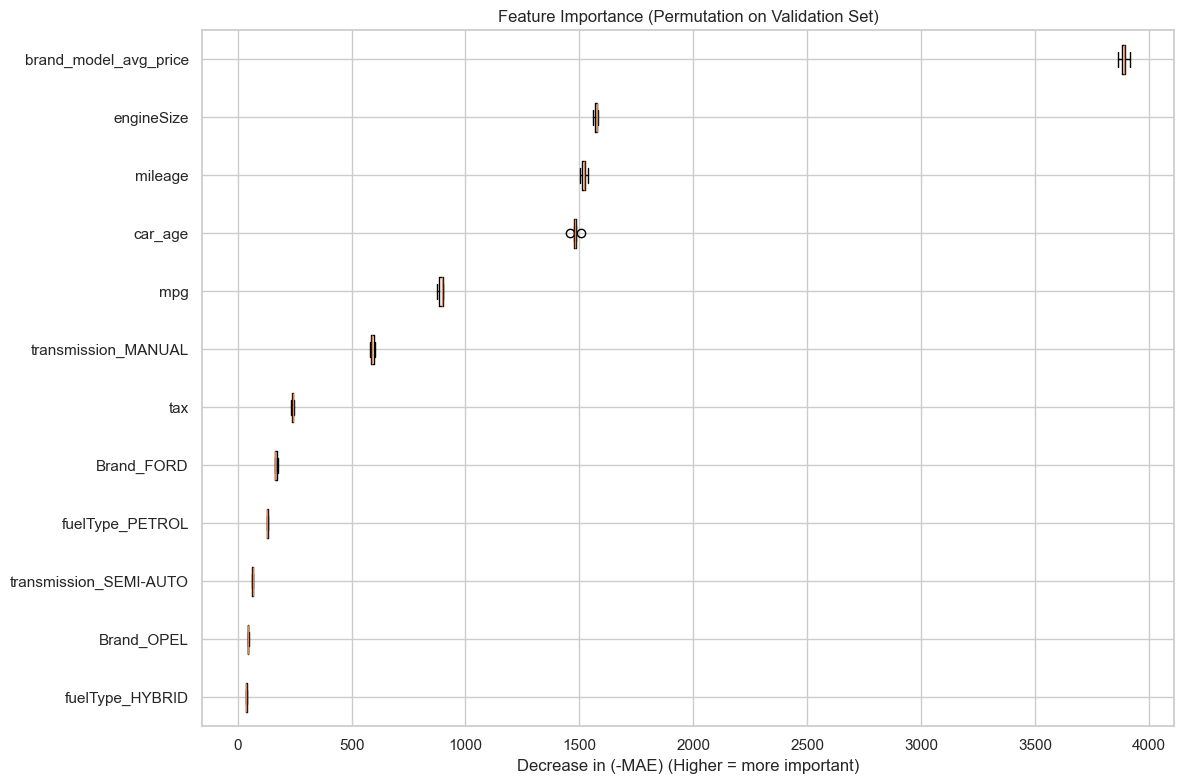

In [185]:
# Feature Importance (Permutation)
if model_to_analyze is not None:
    print("Calculating Permutation Importance (this may take 1-2 minutes)...")

    perm_importance = permutation_importance(
        model_to_analyze,
        X_val_analyze,
        y_val_analyze,
        scoring=neg_mae_euros,   
        n_repeats=5,
        random_state=42,
        n_jobs=-1
    )

    sorted_idx = perm_importance.importances_mean.argsort()

    # Plot Top 15 Features
    plt.figure(figsize=(12, 8))
    plt.boxplot(
        perm_importance.importances[sorted_idx][-15:].T,
        vert=False,
        labels=X_val_analyze.columns[sorted_idx][-15:]
    )
    plt.title("Feature Importance (Permutation on Validation Set)")
    plt.xlabel("Decrease in (-MAE) (Higher = more important)")
    plt.tight_layout()
    plt.show()

This permutation-importance plot (computed on the validation set and measured as the **increase in MAE in euros** when each feature is randomly shuffled) highlights which variables the tuned **HistGradientBoosting** model relies on the most. The dominant driver is **`brand_model_avg_price`**: shuffling it causes by far the largest deterioration in performance, meaning the model uses this feature as the main “anchor” for a car’s expected market value. A second tier of strong predictors includes **`engineSize`**, **`mileage`**, and **`car_age`**, which aligns with economic intuition: price is largely determined by the typical baseline value of the brand/model and then adjusted for technical specification and depreciation from use/age. Mid-importance features such as **`mpg`** and **`transmission_MANUAL`** still contribute, but their impact is notably smaller, suggesting they act more as refinements than primary determinants. Finally, variables like **`tax`** and individual dummies (e.g., **`Brand_FORD`**, **`Brand_OPEL`**, **`fuelType_*`**, **`transmission_SEMI-AUTO`**) show relatively limited incremental importance, indicating that—given the stronger predictors already in the model—they provide only modest additional signal.

* **Main price anchor:** `brand_model_avg_price`
* **Core depreciation/technical drivers:** `engineSize`, `mileage`, `car_age`
* **Secondary refinements:** `mpg`, transmission/fuel/brand dummies


<a class="anchor" id="62-Deployment-Analytics-Interface">

### 6.2. Deployment: Analytics Interface

To address the business requirement of delivering an actionable tool, we implemented an **interactive prediction widget** that connects directly to our **trained model** (`model_to_analyze`). This interface allows users to adjust a small set of key attributes and obtain an **instant price estimate** in euros (using the same `predict_euros` conversion applied throughout the notebook).

Rather than creating a separate application, we operationalised the model **inside the notebook** using `ipywidgets`. Concretely, we start from a real observation (`template_car = X_val_analyze.iloc[[0]].copy()`), and then **only update three fields**—`car_age`, `mileage`, and `engineSize`—to build a valid input row with the correct feature structure. The widget then calls our reusable inference function (`predict_interactive(...)`) and prints the estimated value.

**How it can be useful / help:**

1. **Usability:** enables quick “what-if” inputs (age, mileage, engine size) and immediate price retrieval.
2. **Consistency with the model pipeline:** the widget reuses the same feature structure as the validation data (via `template_car`) and the same euro conversion (`predict_euros`).
3. **Practical demonstration of deployment logic:** even in notebook form, it shows how the trained model can be exposed through a simple interactive layer without re-training or altering the pipeline.


In [190]:
AGE_COL = "car_age"
MILEAGE_COL = "mileage"
ENGINE_COL = "engineSize"

# Template row (baseline vehicle)
template_car = X_val_analyze.iloc[[0]].copy()

# Sliders (define BEFORE widgets.interactive)
style = {"description_width": "initial"}

slider_age = widgets.IntSlider(
    min=0, max=30,
    value=int(template_car[AGE_COL].iloc[0]) if AGE_COL in template_car.columns else 5,
    description="Car age (years):", style=style
)

slider_km = widgets.IntSlider(
    min=0, max=300000, step=5000,
    value=int(template_car[MILEAGE_COL].iloc[0]) if MILEAGE_COL in template_car.columns else 50000,
    description="Mileage (km):", style=style
)

slider_engine = None
if ENGINE_COL in template_car.columns:
    slider_engine = widgets.FloatSlider(
        min=0.8, max=6.0, step=0.1,
        value=float(template_car[ENGINE_COL].iloc[0]),
        description="Engine size:", style=style
    )

# Build UI
if slider_engine is not None:
    ui = widgets.interactive(
        lambda age_years, mileage_km, engine_size:
            predict_interactive(
                age_years, mileage_km, engine_size,
                model=model_to_analyze,
                template_car=template_car,
                predict_fn=predict_euros,
                age_col=AGE_COL,
                mileage_col=MILEAGE_COL,
                engine_col=ENGINE_COL
            ),
        age_years=slider_age,
        mileage_km=slider_km,
        engine_size=slider_engine
    )
else:
    ui = widgets.interactive(
        lambda age_years, mileage_km:
            predict_interactive(
                age_years, mileage_km, None,
                model=model_to_analyze,
                template_car=template_car,
                predict_fn=predict_euros,
                age_col=AGE_COL,
                mileage_col=MILEAGE_COL,
                engine_col=ENGINE_COL
            ),
        age_years=slider_age,
        mileage_km=slider_km
    )

print("Generating Interface...")
display(ui)


Generating Interface...


interactive(children=(IntSlider(value=0, description='Car age (years):', max=30, style=SliderStyle(description…

This interactive widget provides a simple “deployment-style” interface on top of our final model, allowing real-time price estimation by changing a small set of key inputs. In the example shown, the sliders are set to **car_age = 0 years**, **mileage = 0 km**, and **engineSize = 0.8**, and the model returns an estimated market value of **€23,887.56** for that specific configuration (while all other features remain fixed to the baseline template row taken from `X_val`).

* **What the result means:** the printed value is the model’s prediction in **EUR (original scale)** after converting from the log-target output (via `expm1`).
* **Why it’s useful:** it demonstrates how the model can be operationalised for quick scenario testing (e.g., “what happens to price if mileage increases?”) without needing to interact with the training code.
* **Important note:** because only three variables are being changed and the rest come from a single reference vehicle, the output should be interpreted as a **controlled what-if simulation**, not as a full reconfiguration of a completely new car listing.


<a class="anchor" id="63-What-If-Analysis-Depreciation-Curve">

### 6.3. What-If Analysis: Depreciation Curve

To validate the model’s behavioural realism, we selected **one reference vehicle from the validation set** (`car_index = 10`) and performed a controlled “what-if” simulation. Using the original feature vector (`base_car`) as a baseline, we **only changed the `car_age` variable** (defined as `AGE_COL = "car_age"`) from **0 to 20 years**, keeping all other attributes constant. For each synthetic age value, we generated a prediction in euros via `predict_euros(model_to_analyze, temp_car)` and stored the results to build a depreciation curve.

To make the notebook robust, the code first checks that both the model and validation data are available (`model_to_analyze is not None and X_val_analyze is not None`) and includes a safeguard to ensure the required column exists (`"car_age"`). If the column is missing, the simulation is skipped with a clear warning.

**Conclusion:** The resulting curve typically shows a **non-linear depreciation pattern**, with steeper value loss in the early years and a slower decline later. This behaviour is consistent with real used-car markets and suggests that the model has learned realistic depreciation dynamics rather than only linear effects.

**How it can be useful / help:**

1. **Financial planning:** helps approximate value loss over time for ownership / resale planning.
2. **Sales timing:** highlights periods where depreciation is faster, informing “when to sell” decisions.
3. **Model validation:** provides a sanity check that increasing age leads to decreasing predicted prices in a realistic way.


Generating Depreciation Curve...


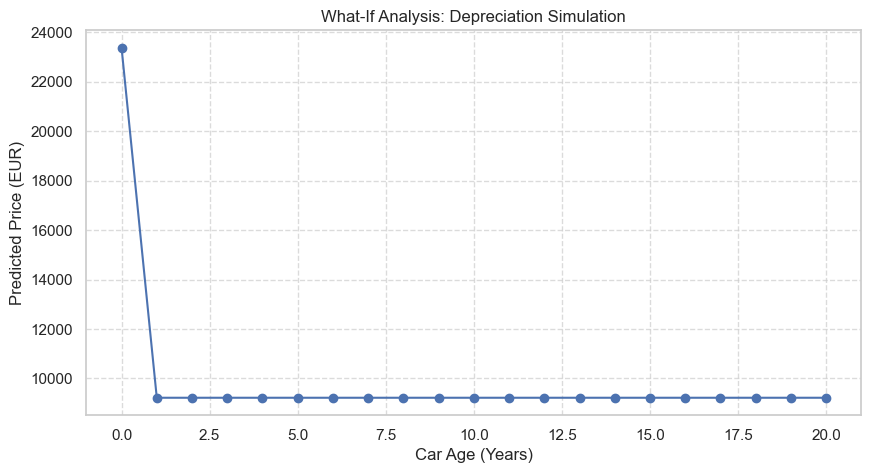

In [188]:
# What-If Analysis: Depreciation Curve

if model_to_analyze is not None and X_val_analyze is not None:
    print("Generating Depreciation Curve...")

    # Select reference car
    car_index = 10
    base_car = X_val_analyze.iloc[[car_index]].copy()

    AGE_COL = "car_age" 

    if AGE_COL not in base_car.columns:
        print(f"WARNING: Column '{AGE_COL}' not found in the dataset. Cannot run depreciation simulation.")
    else:
        # Simulation
        ages_to_test = range(0, 21)
        predicted_prices = []

        for age in ages_to_test:
            temp_car = base_car.copy()
            temp_car[AGE_COL] = age
            predicted_prices.append(predict_euros(model_to_analyze, temp_car)[0])

        # 3) Plot
        plt.figure(figsize=(10, 5))
        plt.plot(list(ages_to_test), predicted_prices, marker="o", linestyle="-")
        plt.title("What-If Analysis: Depreciation Simulation")
        plt.xlabel("Car Age (Years)")
        plt.ylabel("Predicted Price (EUR)")
        plt.grid(True, linestyle="--", alpha=0.7)
        plt.show()


The simulated depreciation curve shows a very steep drop in predicted value from age 0 to age 1, followed by an almost flat trajectory from 1 to 20 years. This suggests that, for the selected reference vehicle (template row), the model is capturing a strong “brand-new premium”: once the car is no longer new, additional ageing has a much smaller marginal impact on price when all other attributes are kept fixed. 

This result should be interpreted as conditional on the chosen vehicle profile and on holding correlated factors constant (in particular, mileage). In practice, mileage typically increases with age, so a more realistic depreciation pattern would be obtained by running the same simulation on different reference cars and/or by varying age together with mileage.


<div class="alert alert-block alert-success">

<a class="anchor" id="7-Kaggle-Submission">    </a>
## 7. Kaggle Submission
    

    
</div>

In [199]:
# pred_test_blend is already in original scale (euros)
submission = pd.DataFrame({
    "carID": cars_test["carID"],
    "price": pred_test_blend
})

# Optional safety: ensure no negative prices
submission["price"] = submission["price"].clip(lower=0)

filename = "group08_version52.csv"
submission.to_csv(filename, index=False)

print(submission.head())

    carID         price
0   89856   9672.833413
1  106581  21651.887403
2   80886  12861.705616
3  100174  17343.819308
4   81376  24387.023543
